In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Hussain' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [14]:
df_train = pd.read_csv('train.csv')
df_center_info = pd.read_csv('fulfilment_center_info.csv')
df_meal_info = pd.read_csv('meal_info.csv')
df_test = pd.read_csv('test_QoiMO9B.csv')

In [16]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [20]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [21]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [22]:
df_meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [23]:
df_meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
meal_id     51 non-null int64
category    51 non-null object
cuisine     51 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [24]:
df_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [25]:
df_center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
center_id      77 non-null int64
city_code      77 non-null int64
region_code    77 non-null int64
center_type    77 non-null object
op_area        77 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [26]:
# Merge the training data with the branch and meal information.
df_train = pd.merge(df_train, df_center_info,
                    how="left",
                    left_on='center_id',
                    right_on='center_id')

df_train = pd.merge(df_train, df_meal_info,
                    how='left',
                    left_on='meal_id',
                    right_on='meal_id')
# Merge the test data with the branch and meal information.
df_test = pd.merge(df_test, df_center_info,
                   how="left",
                   left_on='center_id',
                   right_on='center_id')

df_test = pd.merge(df_test, df_meal_info,
                   how='left',
                   left_on='meal_id',
                   right_on='meal_id')


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 29 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
city_region              456548 non-null object
center_id_encoded        456548 non-null int64
meal_id_encoded          456548 non-null int64
city_code_encoded        456548 n

In [27]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [29]:
pp.ProfileReport(df_train)

C:\Users\Hussain Kurawadwala\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,15
Number of observations,456548
Total Missing (%),0.0%
Total size in memory,55.7 MiB
Average record size in memory,128.0 B
Numeric,9
Categorical,3
Boolean,2
Date,0
Text (Unique),0
Rejected,1


## Exploratory Data Analysis


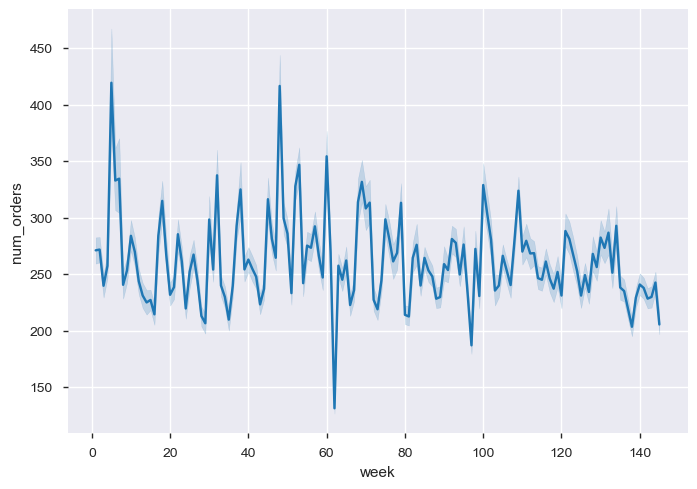

In [30]:
sns.lineplot(df_train['week'],df_train['num_orders'])
plt.show()

In [31]:
sns.lineplot(df_train['checkout_price'],df_train['num_orders'])

NameError: name 'train' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

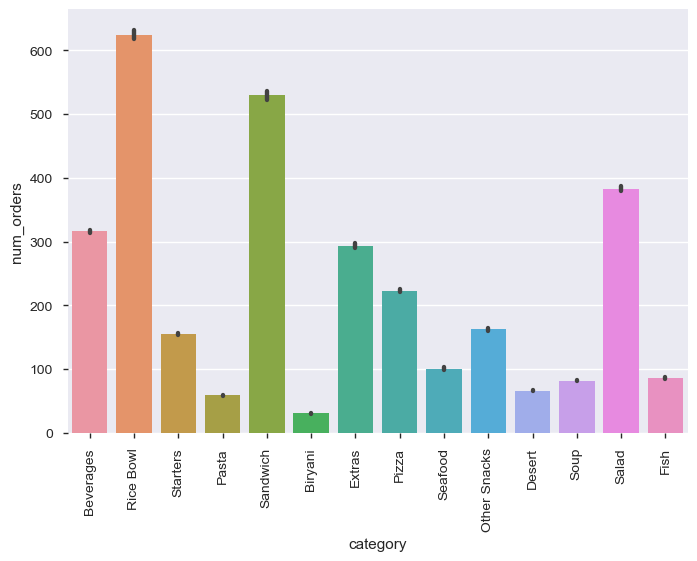

In [33]:
sns.barplot(df_train['category'],df_train['num_orders'])
plt.xticks(rotation = '90')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

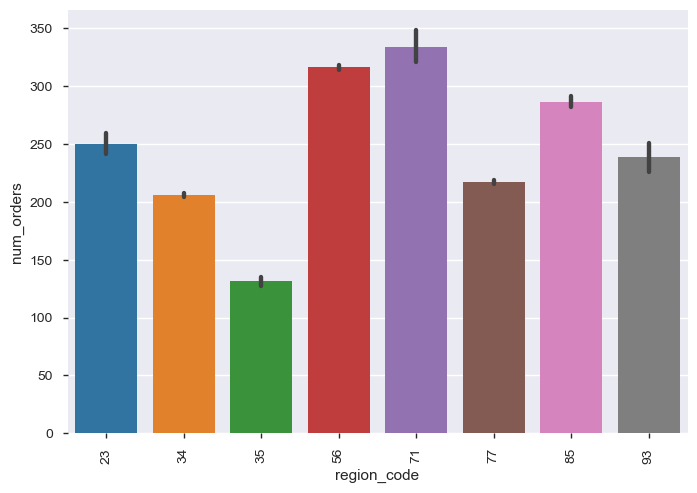

In [35]:
sns.barplot(df_train['region_code'],df_train['num_orders'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

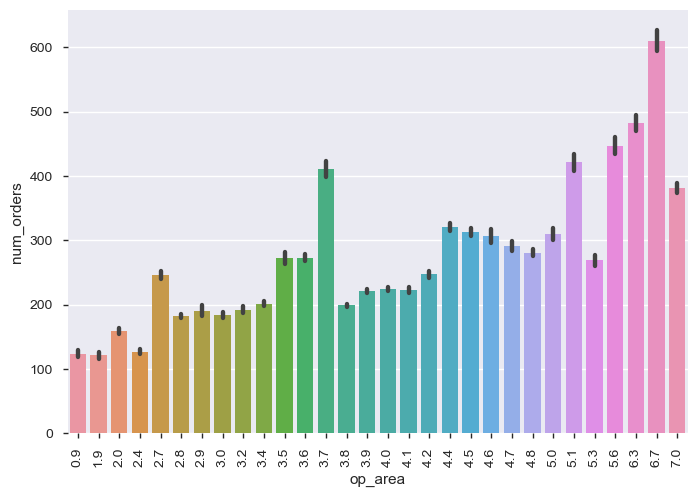

In [36]:
sns.barplot(df_train['op_area'],df_train['num_orders'])
plt.xticks(rotation = '90')

(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 <a list of 8 Text xticklabel objects>)

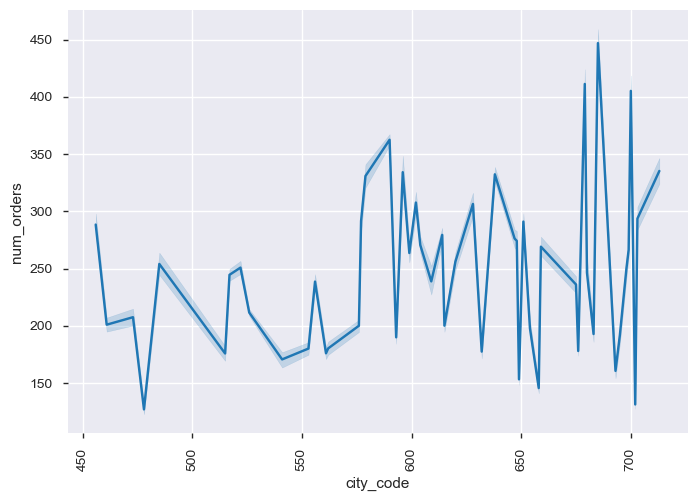

In [38]:
sns.lineplot(df_train['city_code'],df_train['num_orders'])
plt.xticks(rotation = '90')

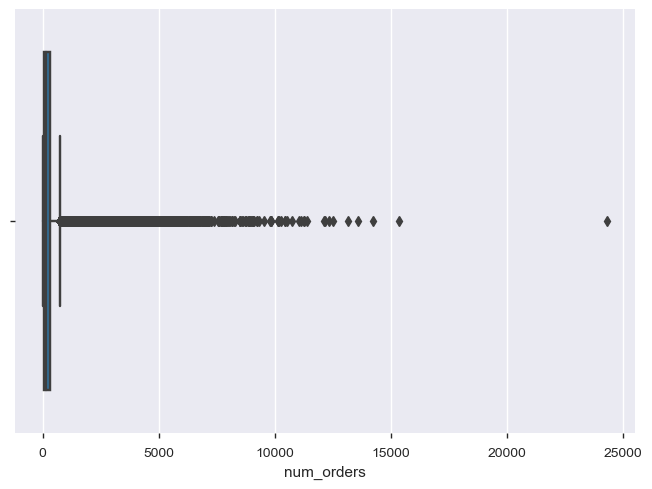

In [39]:
sns.boxplot(x='num_orders',data=df_train)

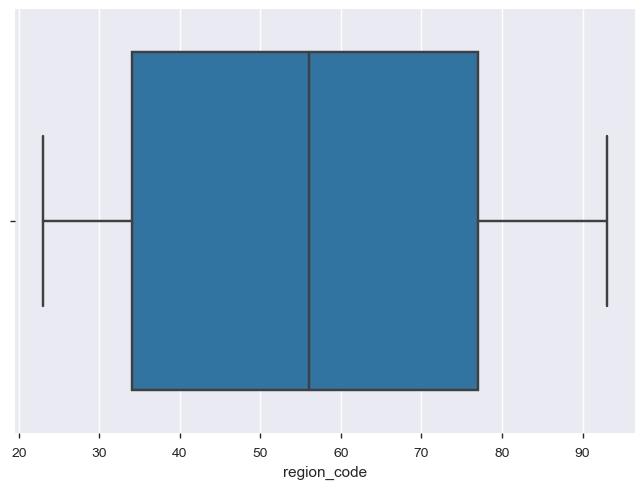

In [40]:
sns.boxplot(x='region_code',data=df_train)

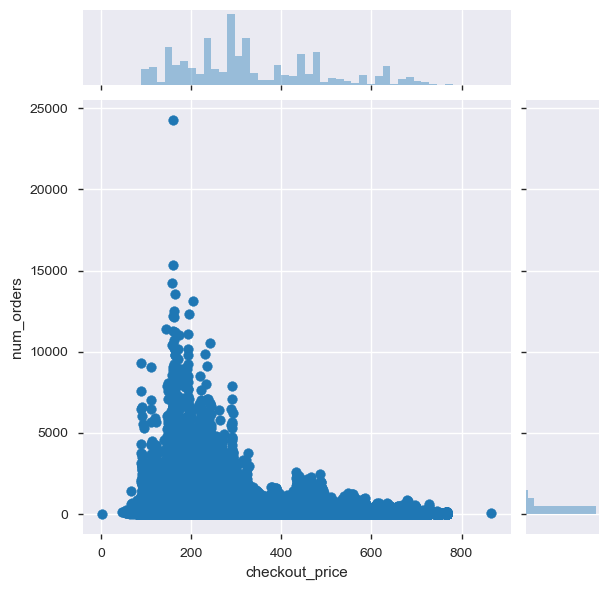

In [41]:
sns.jointplot(x='checkout_price',y='num_orders',data=df_train)

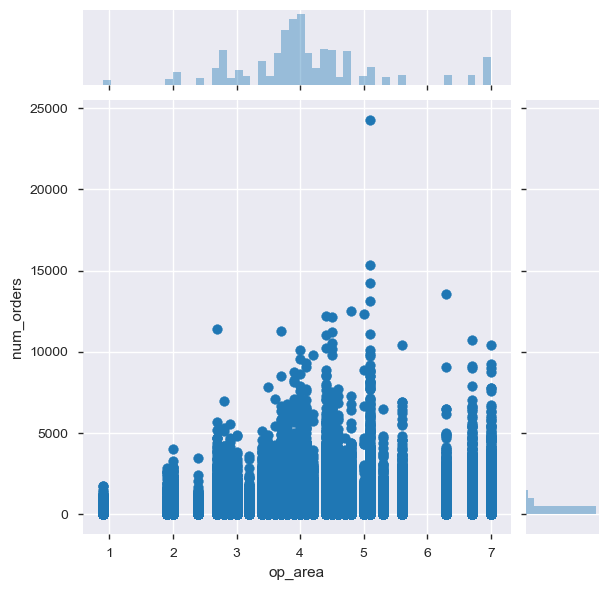

In [42]:
sns.jointplot(x='op_area',y='num_orders',data=df_train)

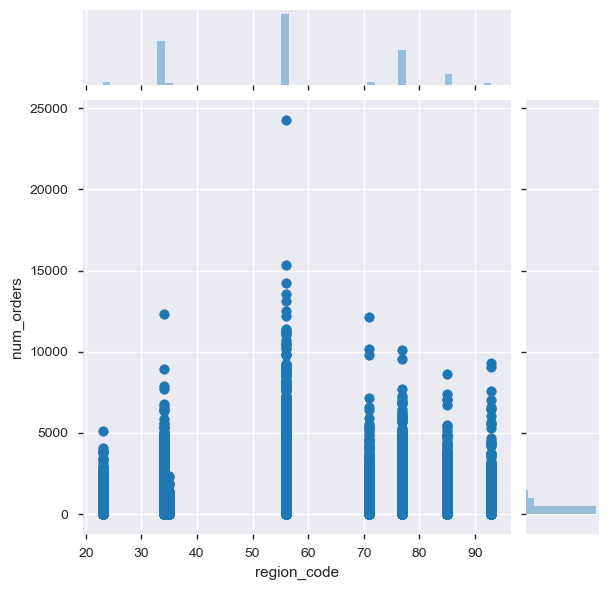

In [43]:
sns.jointplot(x='region_code',y='num_orders',data=df_train)

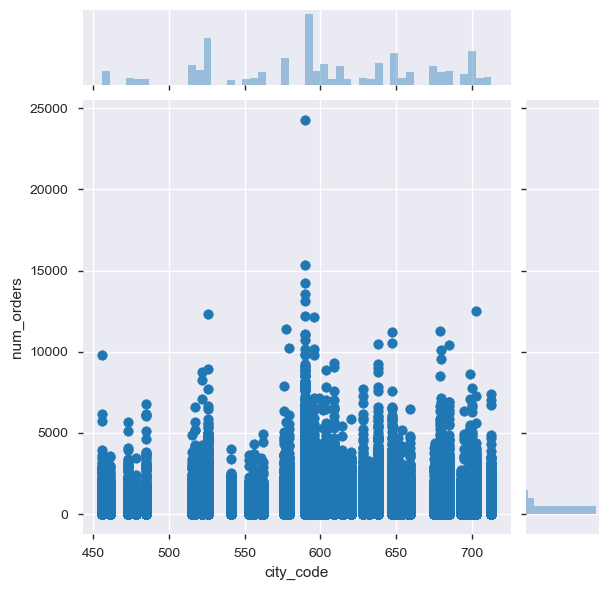

In [44]:
sns.jointplot(x='city_code',y='num_orders',data=df_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

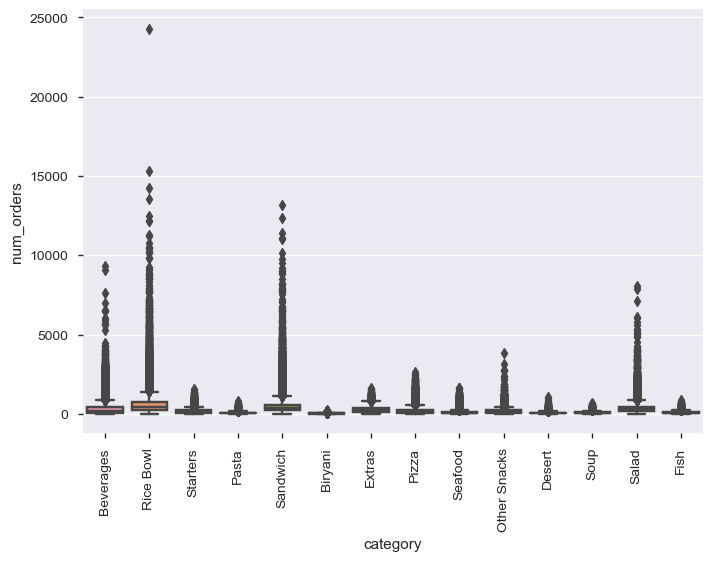

In [45]:
sns.boxplot(x='category',y='num_orders',data=df_train)
plt.xticks(rotation=90)

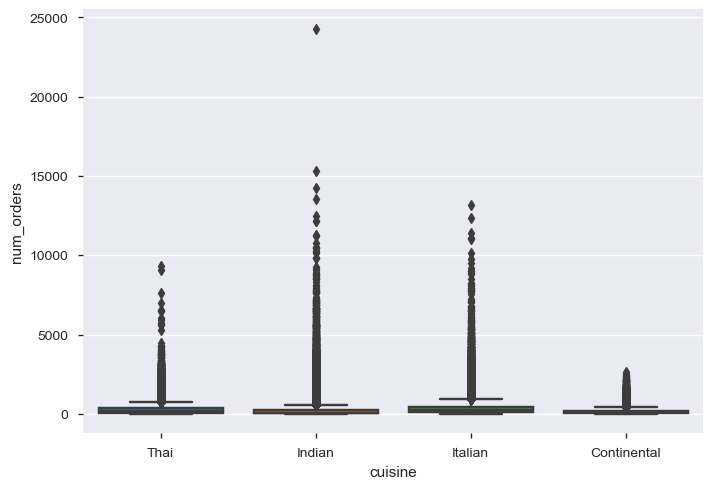

In [46]:
sns.boxplot(x='cuisine',y='num_orders',data=df_train)


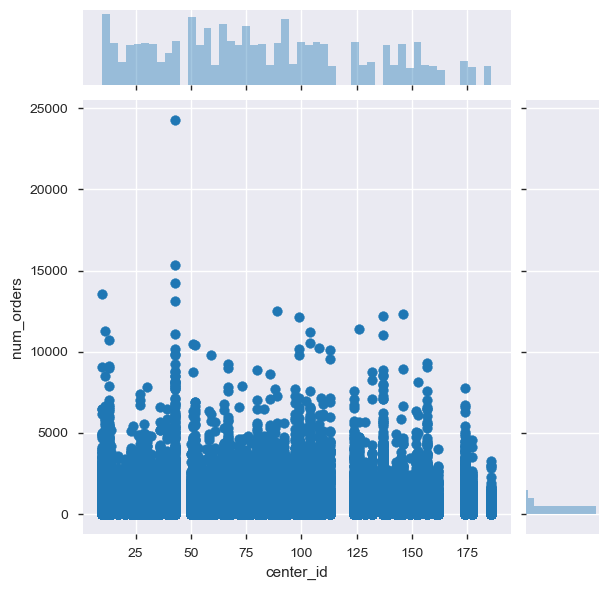

In [47]:
sns.jointplot(x='center_id',y='num_orders',data=df_train)

In [48]:
print("Total number of centers : ",df_train['center_id'].nunique())
print("Total Number of cities: ",df_train['city_code'].nunique())


Total number of centers :  77
Total Number of cities:  51


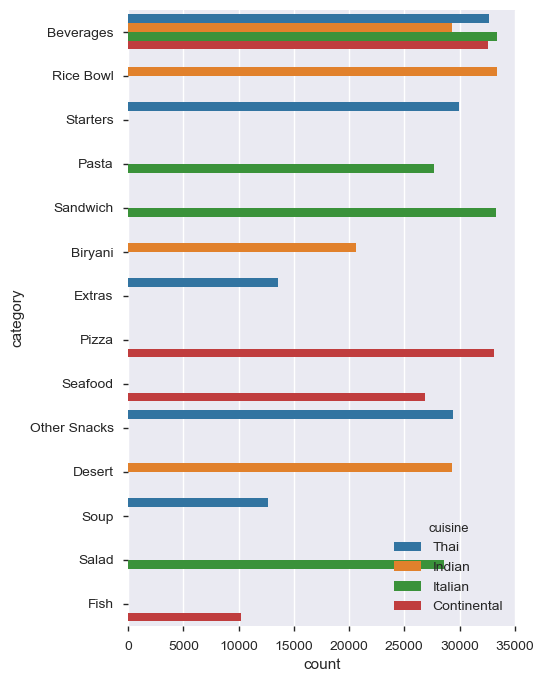

In [50]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = df_train['category'], hue = df_train['cuisine'], ax=ax)
plt.show()

In [51]:
center_meal_train = (df_train['center_id'].astype(str) + "_" + df_train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")

There are 3597 center-meal pairs in train data


In [52]:
center_meal_test = (df_test['center_id'].astype(str) + "_" + df_test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in test data")

There are 3548 center-meal pairs in test data


## Feature Engineering


In [53]:
# Convert 'city_code' and 'region_code' into a single feature - 'city_region'.
df_train['city_region'] = \
        df_train['city_code'].astype('str') + '_' + \
        df_train['region_code'].astype('str')

df_test['city_region'] = \
        df_test['city_code'].astype('str') + '_' + \
        df_test['region_code'].astype('str')


# Label encode categorical columns for use in LightGBM.
label_encode_columns = ['center_id', 
                        'meal_id', 
                        'city_code', 
                        'region_code', 
                        'city_region', 
                        'center_type', 
                        'category', 
                        'cuisine']

le = preprocessing.LabelEncoder()

for col in label_encode_columns:
    le.fit(df_train[col])
    df_train[col + '_encoded'] = le.transform(df_train[col])
    df_test[col + '_encoded'] = le.transform(df_test[col])



In [54]:
# Feature engineering - treat 'week' as a cyclic feature.
# Encode it using sine and cosine transform.
df_train['week_sin'] = \
        np.sin(2 * np.pi * df_train['week'] / 52.143)
df_train['week_cos'] = \
        np.cos(2 * np.pi * df_train['week'] / 52.143)

df_test['week_sin'] = \
        np.sin(2 * np.pi * df_test['week'] / 52.143)
df_test['week_cos'] = \
        np.cos(2 * np.pi * df_test['week'] / 52.143)


# Feature engineering - percent difference between base price and checkout price.
df_train['price_diff_percent'] = \
        (df_train['base_price'] - df_train['checkout_price']) / \
        df_train['base_price']

df_test['price_diff_percent'] = \
        (df_test['base_price'] - df_test['checkout_price']) / \
        df_test['base_price']


# Convert email and homepage features into a single feature - 'email_plus_homepage'.
df_train['email_plus_homepage'] = \
        df_train['emailer_for_promotion'] + \
        df_train['homepage_featured']

df_test['email_plus_homepage'] = \
        df_test['emailer_for_promotion'] + \
        df_test['homepage_featured']


In [55]:
# Prepare a list of columns to train on.
# Also decide which features to treat as numeric and which features to treat
# as categorical.
columns_to_train = ['week',
                    'week_sin',
                    'week_cos',
                    'checkout_price',
                    'base_price',
                    'price_diff_percent',
                    'email_plus_homepage',
                    'city_region_encoded',
                    'center_type_encoded',
                    'op_area',
                    'category_encoded',
                    'cuisine_encoded',
                    'center_id_encoded',
                    'meal_id_encoded']

categorical_columns = ['email_plus_homepage',
                       'city_region_encoded',
                       'center_type_encoded',
                       'category_encoded',
                       'cuisine_encoded',
                       'center_id_encoded',
                       'meal_id_encoded']

numerical_columns = [col for col in columns_to_train if col not in categorical_columns]

In [56]:
# Log transform the target variable - num_orders.
df_train['num_orders_log1p'] = np.log1p(df_train['num_orders'])


# Train-Test split.
X = df_train[categorical_columns + numerical_columns]
y = df_train['num_orders_log1p']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.02, 
                                                    shuffle=False)

In [57]:
# Train the LightGBM model on the best parameters obtained by grid search.
g = {'colsample_bytree': 0.4,
     'min_child_samples': 5,
     'num_leaves': 255}

estimator = LGBMRegressor(learning_rate=0.003,
                          n_estimators=40000,
                          silent=False,
                          **g)

fit_params = {'early_stopping_rounds': 1000,
              'feature_name': categorical_columns + numerical_columns,
              'categorical_feature': categorical_columns,
              'eval_set': [(X_train, y_train), (X_test, y_test)]}

estimator.fit(X_train, y_train, **fit_params)


# Get predictions on the test set and prepare submission file.
X = df_test[categorical_columns + numerical_columns]

pred = estimator.predict(X)
pred = np.expm1(pred)

C:\Users\Hussain Kurawadwala\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['category_encoded', 'center_id_encoded', 'center_type_encoded', 'city_region_encoded', 'cuisine_encoded', 'email_plus_homepage', 'meal_id_encoded']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's l2: 1.44516	valid_1's l2: 1.28239
Training until validation scores don't improve for 1000 rounds
[2]	training's l2: 1.43957	valid_1's l2: 1.27743
[3]	training's l2: 1.43484	valid_1's l2: 1.27313
[4]	training's l2: 1.43062	valid_1's l2: 1.27043
[5]	training's l2: 1.42741	valid_1's l2: 1.26797
[6]	training's l2: 1.42422	valid_1's l2: 1.26554
[7]	training's l2: 1.42278	valid_1's l2: 1.26461
[8]	training's l2: 1.41652	valid_1's l2: 1.25909
[9]	training's l2: 1.41234	valid_1's l2: 1.25636
[10]	training's l2: 1.40643	valid_1's l2: 1.25087
[11]	training's l2: 1.40011	valid_1's l2: 1.24516
[12]	training's l2: 1.39602	valid_1's l2: 1.24232
[13]	training's l2: 1.38962	valid_1's l2: 1.23675
[14]	training's l2: 1.3834	valid_1's l2: 1.23112
[15]	training's l2: 1.37842	valid_1's l2: 1.22687
[16]	training's l2: 1.37225	valid_1's l2: 1.22136
[17]	training's l2: 1.3683	valid_1's l2: 1.21852
[18]	training's l2: 1.3623	valid_1's l2: 1.21318
[19]	training's l2: 1.35719	valid_1's l2: 1.2089


[164]	training's l2: 0.828703	valid_1's l2: 0.762594
[165]	training's l2: 0.827608	valid_1's l2: 0.761881
[166]	training's l2: 0.824774	valid_1's l2: 0.759303
[167]	training's l2: 0.821821	valid_1's l2: 0.756614
[168]	training's l2: 0.819985	valid_1's l2: 0.755481
[169]	training's l2: 0.817175	valid_1's l2: 0.752983
[170]	training's l2: 0.815165	valid_1's l2: 0.75147
[171]	training's l2: 0.812204	valid_1's l2: 0.748873
[172]	training's l2: 0.809749	valid_1's l2: 0.74697
[173]	training's l2: 0.809022	valid_1's l2: 0.746256
[174]	training's l2: 0.806675	valid_1's l2: 0.74403
[175]	training's l2: 0.804706	valid_1's l2: 0.742634
[176]	training's l2: 0.801731	valid_1's l2: 0.739948
[177]	training's l2: 0.799196	valid_1's l2: 0.737797
[178]	training's l2: 0.797711	valid_1's l2: 0.736719
[179]	training's l2: 0.794742	valid_1's l2: 0.734088
[180]	training's l2: 0.793053	valid_1's l2: 0.732901
[181]	training's l2: 0.790673	valid_1's l2: 0.730837
[182]	training's l2: 0.789545	valid_1's l2: 0.729

[320]	training's l2: 0.552985	valid_1's l2: 0.527258
[321]	training's l2: 0.551407	valid_1's l2: 0.525831
[322]	training's l2: 0.549805	valid_1's l2: 0.524406
[323]	training's l2: 0.548288	valid_1's l2: 0.523018
[324]	training's l2: 0.546827	valid_1's l2: 0.52162
[325]	training's l2: 0.545375	valid_1's l2: 0.52022
[326]	training's l2: 0.543978	valid_1's l2: 0.518995
[327]	training's l2: 0.542844	valid_1's l2: 0.51806
[328]	training's l2: 0.541287	valid_1's l2: 0.516685
[329]	training's l2: 0.539807	valid_1's l2: 0.515372
[330]	training's l2: 0.538253	valid_1's l2: 0.513999
[331]	training's l2: 0.536942	valid_1's l2: 0.512867
[332]	training's l2: 0.535769	valid_1's l2: 0.511789
[333]	training's l2: 0.534571	valid_1's l2: 0.510644
[334]	training's l2: 0.533236	valid_1's l2: 0.50947
[335]	training's l2: 0.532138	valid_1's l2: 0.50855
[336]	training's l2: 0.530851	valid_1's l2: 0.507325
[337]	training's l2: 0.529597	valid_1's l2: 0.506148
[338]	training's l2: 0.528797	valid_1's l2: 0.50567

[481]	training's l2: 0.405133	valid_1's l2: 0.39869
[482]	training's l2: 0.404834	valid_1's l2: 0.398499
[483]	training's l2: 0.404251	valid_1's l2: 0.398038
[484]	training's l2: 0.403443	valid_1's l2: 0.397313
[485]	training's l2: 0.403127	valid_1's l2: 0.397093
[486]	training's l2: 0.402449	valid_1's l2: 0.396471
[487]	training's l2: 0.40178	valid_1's l2: 0.395892
[488]	training's l2: 0.400989	valid_1's l2: 0.395183
[489]	training's l2: 0.400459	valid_1's l2: 0.394766
[490]	training's l2: 0.399705	valid_1's l2: 0.394097
[491]	training's l2: 0.399413	valid_1's l2: 0.393888
[492]	training's l2: 0.398624	valid_1's l2: 0.393194
[493]	training's l2: 0.398255	valid_1's l2: 0.392917
[494]	training's l2: 0.39791	valid_1's l2: 0.392679
[495]	training's l2: 0.397486	valid_1's l2: 0.392403
[496]	training's l2: 0.396803	valid_1's l2: 0.391742
[497]	training's l2: 0.39603	valid_1's l2: 0.391005
[498]	training's l2: 0.395311	valid_1's l2: 0.390319
[499]	training's l2: 0.394844	valid_1's l2: 0.3898

[640]	training's l2: 0.330694	valid_1's l2: 0.334387
[641]	training's l2: 0.330305	valid_1's l2: 0.334065
[642]	training's l2: 0.329942	valid_1's l2: 0.333722
[643]	training's l2: 0.329558	valid_1's l2: 0.333392
[644]	training's l2: 0.329162	valid_1's l2: 0.333012
[645]	training's l2: 0.328944	valid_1's l2: 0.332867
[646]	training's l2: 0.328508	valid_1's l2: 0.332438
[647]	training's l2: 0.328084	valid_1's l2: 0.332047
[648]	training's l2: 0.327721	valid_1's l2: 0.331726
[649]	training's l2: 0.327445	valid_1's l2: 0.331489
[650]	training's l2: 0.327047	valid_1's l2: 0.331123
[651]	training's l2: 0.326626	valid_1's l2: 0.330743
[652]	training's l2: 0.326409	valid_1's l2: 0.330635
[653]	training's l2: 0.325993	valid_1's l2: 0.330253
[654]	training's l2: 0.325831	valid_1's l2: 0.330151
[655]	training's l2: 0.325418	valid_1's l2: 0.329773
[656]	training's l2: 0.325048	valid_1's l2: 0.329458
[657]	training's l2: 0.32472	valid_1's l2: 0.32919
[658]	training's l2: 0.324343	valid_1's l2: 0.32

[797]	training's l2: 0.28989	valid_1's l2: 0.299523
[798]	training's l2: 0.289644	valid_1's l2: 0.299294
[799]	training's l2: 0.289448	valid_1's l2: 0.299156
[800]	training's l2: 0.289322	valid_1's l2: 0.299109
[801]	training's l2: 0.289087	valid_1's l2: 0.298886
[802]	training's l2: 0.288837	valid_1's l2: 0.298644
[803]	training's l2: 0.288595	valid_1's l2: 0.29843
[804]	training's l2: 0.288393	valid_1's l2: 0.29828
[805]	training's l2: 0.288145	valid_1's l2: 0.298053
[806]	training's l2: 0.287913	valid_1's l2: 0.297834
[807]	training's l2: 0.28776	valid_1's l2: 0.297747
[808]	training's l2: 0.287563	valid_1's l2: 0.297598
[809]	training's l2: 0.287481	valid_1's l2: 0.297568
[810]	training's l2: 0.287278	valid_1's l2: 0.297361
[811]	training's l2: 0.287064	valid_1's l2: 0.297177
[812]	training's l2: 0.286915	valid_1's l2: 0.297055
[813]	training's l2: 0.286801	valid_1's l2: 0.296989
[814]	training's l2: 0.28657	valid_1's l2: 0.296782
[815]	training's l2: 0.286417	valid_1's l2: 0.29663

[956]	training's l2: 0.26523	valid_1's l2: 0.278498
[957]	training's l2: 0.26516	valid_1's l2: 0.278473
[958]	training's l2: 0.265094	valid_1's l2: 0.278436
[959]	training's l2: 0.264935	valid_1's l2: 0.278279
[960]	training's l2: 0.264807	valid_1's l2: 0.278155
[961]	training's l2: 0.26467	valid_1's l2: 0.278017
[962]	training's l2: 0.264604	valid_1's l2: 0.277982
[963]	training's l2: 0.264451	valid_1's l2: 0.277839
[964]	training's l2: 0.264318	valid_1's l2: 0.277715
[965]	training's l2: 0.264194	valid_1's l2: 0.277603
[966]	training's l2: 0.264077	valid_1's l2: 0.277517
[967]	training's l2: 0.263926	valid_1's l2: 0.277368
[968]	training's l2: 0.263799	valid_1's l2: 0.277238
[969]	training's l2: 0.26365	valid_1's l2: 0.27709
[970]	training's l2: 0.263581	valid_1's l2: 0.277057
[971]	training's l2: 0.263438	valid_1's l2: 0.276908
[972]	training's l2: 0.263349	valid_1's l2: 0.276836
[973]	training's l2: 0.263209	valid_1's l2: 0.276702
[974]	training's l2: 0.263084	valid_1's l2: 0.27661

[1109]	training's l2: 0.249967	valid_1's l2: 0.265347
[1110]	training's l2: 0.249868	valid_1's l2: 0.265278
[1111]	training's l2: 0.249764	valid_1's l2: 0.265166
[1112]	training's l2: 0.249666	valid_1's l2: 0.265075
[1113]	training's l2: 0.249578	valid_1's l2: 0.264983
[1114]	training's l2: 0.249487	valid_1's l2: 0.2649
[1115]	training's l2: 0.249404	valid_1's l2: 0.264812
[1116]	training's l2: 0.249364	valid_1's l2: 0.264791
[1117]	training's l2: 0.249277	valid_1's l2: 0.264748
[1118]	training's l2: 0.249181	valid_1's l2: 0.264663
[1119]	training's l2: 0.24909	valid_1's l2: 0.26458
[1120]	training's l2: 0.249049	valid_1's l2: 0.264546
[1121]	training's l2: 0.248969	valid_1's l2: 0.264493
[1122]	training's l2: 0.248872	valid_1's l2: 0.264404
[1123]	training's l2: 0.248772	valid_1's l2: 0.264306
[1124]	training's l2: 0.248691	valid_1's l2: 0.264234
[1125]	training's l2: 0.248599	valid_1's l2: 0.264189
[1126]	training's l2: 0.248514	valid_1's l2: 0.264117
[1127]	training's l2: 0.248438	v

[1264]	training's l2: 0.239103	valid_1's l2: 0.256146
[1265]	training's l2: 0.239029	valid_1's l2: 0.256076
[1266]	training's l2: 0.238954	valid_1's l2: 0.256005
[1267]	training's l2: 0.23892	valid_1's l2: 0.255978
[1268]	training's l2: 0.238875	valid_1's l2: 0.255922
[1269]	training's l2: 0.238804	valid_1's l2: 0.255852
[1270]	training's l2: 0.238736	valid_1's l2: 0.255797
[1271]	training's l2: 0.238699	valid_1's l2: 0.255764
[1272]	training's l2: 0.238619	valid_1's l2: 0.255685
[1273]	training's l2: 0.238566	valid_1's l2: 0.255639
[1274]	training's l2: 0.238501	valid_1's l2: 0.255584
[1275]	training's l2: 0.238443	valid_1's l2: 0.255539
[1276]	training's l2: 0.238392	valid_1's l2: 0.255496
[1277]	training's l2: 0.238334	valid_1's l2: 0.255468
[1278]	training's l2: 0.238281	valid_1's l2: 0.255428
[1279]	training's l2: 0.238238	valid_1's l2: 0.25539
[1280]	training's l2: 0.238194	valid_1's l2: 0.25534
[1281]	training's l2: 0.238126	valid_1's l2: 0.255302
[1282]	training's l2: 0.238067	

[1416]	training's l2: 0.231178	valid_1's l2: 0.249796
[1417]	training's l2: 0.231128	valid_1's l2: 0.249745
[1418]	training's l2: 0.231098	valid_1's l2: 0.249735
[1419]	training's l2: 0.231045	valid_1's l2: 0.249679
[1420]	training's l2: 0.230987	valid_1's l2: 0.249617
[1421]	training's l2: 0.230936	valid_1's l2: 0.249605
[1422]	training's l2: 0.23091	valid_1's l2: 0.249597
[1423]	training's l2: 0.230859	valid_1's l2: 0.24955
[1424]	training's l2: 0.230808	valid_1's l2: 0.249502
[1425]	training's l2: 0.230752	valid_1's l2: 0.249439
[1426]	training's l2: 0.230707	valid_1's l2: 0.249419
[1427]	training's l2: 0.230674	valid_1's l2: 0.24939
[1428]	training's l2: 0.230641	valid_1's l2: 0.249385
[1429]	training's l2: 0.230595	valid_1's l2: 0.249341
[1430]	training's l2: 0.230566	valid_1's l2: 0.249333
[1431]	training's l2: 0.230516	valid_1's l2: 0.249287
[1432]	training's l2: 0.230459	valid_1's l2: 0.249226
[1433]	training's l2: 0.230428	valid_1's l2: 0.249213
[1434]	training's l2: 0.230387	

[1568]	training's l2: 0.224835	valid_1's l2: 0.244913
[1569]	training's l2: 0.224801	valid_1's l2: 0.244887
[1570]	training's l2: 0.224766	valid_1's l2: 0.244856
[1571]	training's l2: 0.224743	valid_1's l2: 0.244838
[1572]	training's l2: 0.224712	valid_1's l2: 0.244811
[1573]	training's l2: 0.224661	valid_1's l2: 0.244758
[1574]	training's l2: 0.224613	valid_1's l2: 0.244692
[1575]	training's l2: 0.224569	valid_1's l2: 0.244666
[1576]	training's l2: 0.224519	valid_1's l2: 0.24465
[1577]	training's l2: 0.224496	valid_1's l2: 0.244648
[1578]	training's l2: 0.224462	valid_1's l2: 0.244618
[1579]	training's l2: 0.224423	valid_1's l2: 0.244577
[1580]	training's l2: 0.224373	valid_1's l2: 0.24454
[1581]	training's l2: 0.224336	valid_1's l2: 0.244528
[1582]	training's l2: 0.224293	valid_1's l2: 0.244485
[1583]	training's l2: 0.224241	valid_1's l2: 0.244452
[1584]	training's l2: 0.224204	valid_1's l2: 0.244429
[1585]	training's l2: 0.224164	valid_1's l2: 0.24439
[1586]	training's l2: 0.224137	

[1724]	training's l2: 0.219547	valid_1's l2: 0.241112
[1725]	training's l2: 0.219528	valid_1's l2: 0.241101
[1726]	training's l2: 0.219501	valid_1's l2: 0.241079
[1727]	training's l2: 0.219469	valid_1's l2: 0.241076
[1728]	training's l2: 0.219449	valid_1's l2: 0.241064
[1729]	training's l2: 0.219424	valid_1's l2: 0.241064
[1730]	training's l2: 0.219407	valid_1's l2: 0.241061
[1731]	training's l2: 0.219373	valid_1's l2: 0.241033
[1732]	training's l2: 0.219343	valid_1's l2: 0.241016
[1733]	training's l2: 0.219307	valid_1's l2: 0.240999
[1734]	training's l2: 0.219275	valid_1's l2: 0.24097
[1735]	training's l2: 0.219235	valid_1's l2: 0.240957
[1736]	training's l2: 0.219196	valid_1's l2: 0.240936
[1737]	training's l2: 0.219156	valid_1's l2: 0.240891
[1738]	training's l2: 0.219137	valid_1's l2: 0.240888
[1739]	training's l2: 0.219093	valid_1's l2: 0.240836
[1740]	training's l2: 0.219045	valid_1's l2: 0.240787
[1741]	training's l2: 0.219011	valid_1's l2: 0.240753
[1742]	training's l2: 0.21898

[1879]	training's l2: 0.214928	valid_1's l2: 0.237924
[1880]	training's l2: 0.214913	valid_1's l2: 0.237921
[1881]	training's l2: 0.214882	valid_1's l2: 0.237887
[1882]	training's l2: 0.214853	valid_1's l2: 0.237868
[1883]	training's l2: 0.214815	valid_1's l2: 0.237826
[1884]	training's l2: 0.214794	valid_1's l2: 0.237816
[1885]	training's l2: 0.214757	valid_1's l2: 0.237779
[1886]	training's l2: 0.214745	valid_1's l2: 0.237774
[1887]	training's l2: 0.214727	valid_1's l2: 0.237772
[1888]	training's l2: 0.214698	valid_1's l2: 0.237743
[1889]	training's l2: 0.214668	valid_1's l2: 0.237714
[1890]	training's l2: 0.21464	valid_1's l2: 0.237689
[1891]	training's l2: 0.214617	valid_1's l2: 0.23768
[1892]	training's l2: 0.214581	valid_1's l2: 0.23764
[1893]	training's l2: 0.214557	valid_1's l2: 0.237638
[1894]	training's l2: 0.21453	valid_1's l2: 0.237626
[1895]	training's l2: 0.214506	valid_1's l2: 0.237624
[1896]	training's l2: 0.214487	valid_1's l2: 0.237612
[1897]	training's l2: 0.21446	va

[2035]	training's l2: 0.211027	valid_1's l2: 0.235172
[2036]	training's l2: 0.211002	valid_1's l2: 0.235163
[2037]	training's l2: 0.210978	valid_1's l2: 0.235162
[2038]	training's l2: 0.210956	valid_1's l2: 0.235142
[2039]	training's l2: 0.210926	valid_1's l2: 0.235094
[2040]	training's l2: 0.2109	valid_1's l2: 0.235081
[2041]	training's l2: 0.210882	valid_1's l2: 0.235066
[2042]	training's l2: 0.21085	valid_1's l2: 0.235025
[2043]	training's l2: 0.210816	valid_1's l2: 0.234997
[2044]	training's l2: 0.210784	valid_1's l2: 0.234957
[2045]	training's l2: 0.210756	valid_1's l2: 0.234948
[2046]	training's l2: 0.210737	valid_1's l2: 0.234924
[2047]	training's l2: 0.210713	valid_1's l2: 0.234923
[2048]	training's l2: 0.210696	valid_1's l2: 0.234916
[2049]	training's l2: 0.210676	valid_1's l2: 0.234915
[2050]	training's l2: 0.210656	valid_1's l2: 0.234906
[2051]	training's l2: 0.210624	valid_1's l2: 0.234867
[2052]	training's l2: 0.210604	valid_1's l2: 0.234859
[2053]	training's l2: 0.21058	v

[2190]	training's l2: 0.207496	valid_1's l2: 0.232555
[2191]	training's l2: 0.207466	valid_1's l2: 0.232537
[2192]	training's l2: 0.207451	valid_1's l2: 0.232537
[2193]	training's l2: 0.207435	valid_1's l2: 0.232536
[2194]	training's l2: 0.207411	valid_1's l2: 0.232524
[2195]	training's l2: 0.207398	valid_1's l2: 0.232521
[2196]	training's l2: 0.207369	valid_1's l2: 0.232482
[2197]	training's l2: 0.20734	valid_1's l2: 0.232445
[2198]	training's l2: 0.207321	valid_1's l2: 0.232446
[2199]	training's l2: 0.2073	valid_1's l2: 0.232428
[2200]	training's l2: 0.207273	valid_1's l2: 0.2324
[2201]	training's l2: 0.207253	valid_1's l2: 0.232387
[2202]	training's l2: 0.207236	valid_1's l2: 0.232375
[2203]	training's l2: 0.207225	valid_1's l2: 0.23237
[2204]	training's l2: 0.207206	valid_1's l2: 0.23237
[2205]	training's l2: 0.207182	valid_1's l2: 0.232346
[2206]	training's l2: 0.207162	valid_1's l2: 0.232334
[2207]	training's l2: 0.207148	valid_1's l2: 0.23232
[2208]	training's l2: 0.207129	valid

[2342]	training's l2: 0.204435	valid_1's l2: 0.230458
[2343]	training's l2: 0.204414	valid_1's l2: 0.23044
[2344]	training's l2: 0.204396	valid_1's l2: 0.230435
[2345]	training's l2: 0.204379	valid_1's l2: 0.230428
[2346]	training's l2: 0.204359	valid_1's l2: 0.230412
[2347]	training's l2: 0.204338	valid_1's l2: 0.2304
[2348]	training's l2: 0.204319	valid_1's l2: 0.230388
[2349]	training's l2: 0.204301	valid_1's l2: 0.230377
[2350]	training's l2: 0.204288	valid_1's l2: 0.230375
[2351]	training's l2: 0.204263	valid_1's l2: 0.230365
[2352]	training's l2: 0.204246	valid_1's l2: 0.230362
[2353]	training's l2: 0.204228	valid_1's l2: 0.230353
[2354]	training's l2: 0.204209	valid_1's l2: 0.230336
[2355]	training's l2: 0.204192	valid_1's l2: 0.230321
[2356]	training's l2: 0.204164	valid_1's l2: 0.230313
[2357]	training's l2: 0.204145	valid_1's l2: 0.230312
[2358]	training's l2: 0.204118	valid_1's l2: 0.230281
[2359]	training's l2: 0.204098	valid_1's l2: 0.230262
[2360]	training's l2: 0.204073	

[2495]	training's l2: 0.201737	valid_1's l2: 0.228821
[2496]	training's l2: 0.201721	valid_1's l2: 0.228804
[2497]	training's l2: 0.2017	valid_1's l2: 0.228781
[2498]	training's l2: 0.20168	valid_1's l2: 0.228777
[2499]	training's l2: 0.201653	valid_1's l2: 0.228751
[2500]	training's l2: 0.201636	valid_1's l2: 0.228744
[2501]	training's l2: 0.201615	valid_1's l2: 0.228715
[2502]	training's l2: 0.201596	valid_1's l2: 0.228697
[2503]	training's l2: 0.201584	valid_1's l2: 0.228691
[2504]	training's l2: 0.201571	valid_1's l2: 0.22868
[2505]	training's l2: 0.201552	valid_1's l2: 0.22867
[2506]	training's l2: 0.201541	valid_1's l2: 0.228668
[2507]	training's l2: 0.201517	valid_1's l2: 0.228632
[2508]	training's l2: 0.201495	valid_1's l2: 0.228611
[2509]	training's l2: 0.201479	valid_1's l2: 0.22859
[2510]	training's l2: 0.201455	valid_1's l2: 0.228586
[2511]	training's l2: 0.201445	valid_1's l2: 0.228581
[2512]	training's l2: 0.201428	valid_1's l2: 0.228574
[2513]	training's l2: 0.201414	val

[2648]	training's l2: 0.199208	valid_1's l2: 0.226923
[2649]	training's l2: 0.199196	valid_1's l2: 0.226917
[2650]	training's l2: 0.199184	valid_1's l2: 0.226913
[2651]	training's l2: 0.199168	valid_1's l2: 0.226912
[2652]	training's l2: 0.199152	valid_1's l2: 0.2269
[2653]	training's l2: 0.199136	valid_1's l2: 0.226885
[2654]	training's l2: 0.199125	valid_1's l2: 0.226878
[2655]	training's l2: 0.199109	valid_1's l2: 0.226864
[2656]	training's l2: 0.199095	valid_1's l2: 0.226861
[2657]	training's l2: 0.199076	valid_1's l2: 0.226831
[2658]	training's l2: 0.199059	valid_1's l2: 0.226819
[2659]	training's l2: 0.199046	valid_1's l2: 0.226804
[2660]	training's l2: 0.199037	valid_1's l2: 0.226802
[2661]	training's l2: 0.199024	valid_1's l2: 0.226787
[2662]	training's l2: 0.199003	valid_1's l2: 0.226767
[2663]	training's l2: 0.198988	valid_1's l2: 0.226761
[2664]	training's l2: 0.198967	valid_1's l2: 0.226741
[2665]	training's l2: 0.198952	valid_1's l2: 0.226728
[2666]	training's l2: 0.198934

[2800]	training's l2: 0.196972	valid_1's l2: 0.225509
[2801]	training's l2: 0.196956	valid_1's l2: 0.225499
[2802]	training's l2: 0.196943	valid_1's l2: 0.225494
[2803]	training's l2: 0.196933	valid_1's l2: 0.225491
[2804]	training's l2: 0.19692	valid_1's l2: 0.225486
[2805]	training's l2: 0.196906	valid_1's l2: 0.225477
[2806]	training's l2: 0.196889	valid_1's l2: 0.225479
[2807]	training's l2: 0.196876	valid_1's l2: 0.225472
[2808]	training's l2: 0.196856	valid_1's l2: 0.225447
[2809]	training's l2: 0.196844	valid_1's l2: 0.225438
[2810]	training's l2: 0.196823	valid_1's l2: 0.225416
[2811]	training's l2: 0.196814	valid_1's l2: 0.225405
[2812]	training's l2: 0.196801	valid_1's l2: 0.225395
[2813]	training's l2: 0.196792	valid_1's l2: 0.225394
[2814]	training's l2: 0.196775	valid_1's l2: 0.225388
[2815]	training's l2: 0.196765	valid_1's l2: 0.225379
[2816]	training's l2: 0.196754	valid_1's l2: 0.225379
[2817]	training's l2: 0.19674	valid_1's l2: 0.225369
[2818]	training's l2: 0.196732

[2957]	training's l2: 0.194937	valid_1's l2: 0.224307
[2958]	training's l2: 0.194925	valid_1's l2: 0.224285
[2959]	training's l2: 0.194913	valid_1's l2: 0.224273
[2960]	training's l2: 0.194905	valid_1's l2: 0.224273
[2961]	training's l2: 0.194898	valid_1's l2: 0.22427
[2962]	training's l2: 0.194886	valid_1's l2: 0.224263
[2963]	training's l2: 0.194878	valid_1's l2: 0.224249
[2964]	training's l2: 0.19487	valid_1's l2: 0.224245
[2965]	training's l2: 0.194858	valid_1's l2: 0.224236
[2966]	training's l2: 0.194853	valid_1's l2: 0.224235
[2967]	training's l2: 0.194841	valid_1's l2: 0.224223
[2968]	training's l2: 0.194829	valid_1's l2: 0.224217
[2969]	training's l2: 0.194821	valid_1's l2: 0.22421
[2970]	training's l2: 0.194809	valid_1's l2: 0.224202
[2971]	training's l2: 0.194799	valid_1's l2: 0.224198
[2972]	training's l2: 0.19478	valid_1's l2: 0.224181
[2973]	training's l2: 0.19477	valid_1's l2: 0.224179
[2974]	training's l2: 0.194762	valid_1's l2: 0.224176
[2975]	training's l2: 0.194752	va

[3112]	training's l2: 0.193077	valid_1's l2: 0.2231
[3113]	training's l2: 0.193066	valid_1's l2: 0.223096
[3114]	training's l2: 0.193053	valid_1's l2: 0.223092
[3115]	training's l2: 0.193044	valid_1's l2: 0.223093
[3116]	training's l2: 0.193029	valid_1's l2: 0.22308
[3117]	training's l2: 0.193021	valid_1's l2: 0.223073
[3118]	training's l2: 0.193014	valid_1's l2: 0.22306
[3119]	training's l2: 0.193004	valid_1's l2: 0.223054
[3120]	training's l2: 0.192998	valid_1's l2: 0.223053
[3121]	training's l2: 0.19298	valid_1's l2: 0.223039
[3122]	training's l2: 0.192965	valid_1's l2: 0.22304
[3123]	training's l2: 0.192954	valid_1's l2: 0.223031
[3124]	training's l2: 0.192946	valid_1's l2: 0.22303
[3125]	training's l2: 0.192935	valid_1's l2: 0.223027
[3126]	training's l2: 0.192926	valid_1's l2: 0.223029
[3127]	training's l2: 0.192917	valid_1's l2: 0.223025
[3128]	training's l2: 0.192902	valid_1's l2: 0.223
[3129]	training's l2: 0.192892	valid_1's l2: 0.222997
[3130]	training's l2: 0.192879	valid_1

[3267]	training's l2: 0.191332	valid_1's l2: 0.22203
[3268]	training's l2: 0.191315	valid_1's l2: 0.222013
[3269]	training's l2: 0.191308	valid_1's l2: 0.222012
[3270]	training's l2: 0.191298	valid_1's l2: 0.222007
[3271]	training's l2: 0.19129	valid_1's l2: 0.222008
[3272]	training's l2: 0.191283	valid_1's l2: 0.222006
[3273]	training's l2: 0.19127	valid_1's l2: 0.222001
[3274]	training's l2: 0.191254	valid_1's l2: 0.221991
[3275]	training's l2: 0.191245	valid_1's l2: 0.221991
[3276]	training's l2: 0.191233	valid_1's l2: 0.221984
[3277]	training's l2: 0.191222	valid_1's l2: 0.221977
[3278]	training's l2: 0.191207	valid_1's l2: 0.221961
[3279]	training's l2: 0.191195	valid_1's l2: 0.221941
[3280]	training's l2: 0.191186	valid_1's l2: 0.221936
[3281]	training's l2: 0.191173	valid_1's l2: 0.221928
[3282]	training's l2: 0.191163	valid_1's l2: 0.221927
[3283]	training's l2: 0.19115	valid_1's l2: 0.221908
[3284]	training's l2: 0.191142	valid_1's l2: 0.221903
[3285]	training's l2: 0.19113	va

[3423]	training's l2: 0.189721	valid_1's l2: 0.221135
[3424]	training's l2: 0.189712	valid_1's l2: 0.221133
[3425]	training's l2: 0.189702	valid_1's l2: 0.221129
[3426]	training's l2: 0.189693	valid_1's l2: 0.221125
[3427]	training's l2: 0.189682	valid_1's l2: 0.221117
[3428]	training's l2: 0.189665	valid_1's l2: 0.221095
[3429]	training's l2: 0.18965	valid_1's l2: 0.22109
[3430]	training's l2: 0.189643	valid_1's l2: 0.221088
[3431]	training's l2: 0.189632	valid_1's l2: 0.221087
[3432]	training's l2: 0.18962	valid_1's l2: 0.221091
[3433]	training's l2: 0.189609	valid_1's l2: 0.221081
[3434]	training's l2: 0.18959	valid_1's l2: 0.221062
[3435]	training's l2: 0.189584	valid_1's l2: 0.221061
[3436]	training's l2: 0.189571	valid_1's l2: 0.221054
[3437]	training's l2: 0.189561	valid_1's l2: 0.221047
[3438]	training's l2: 0.189555	valid_1's l2: 0.221045
[3439]	training's l2: 0.189544	valid_1's l2: 0.221044
[3440]	training's l2: 0.189536	valid_1's l2: 0.221037
[3441]	training's l2: 0.18953	va

[3577]	training's l2: 0.188151	valid_1's l2: 0.220336
[3578]	training's l2: 0.188143	valid_1's l2: 0.220329
[3579]	training's l2: 0.188135	valid_1's l2: 0.220328
[3580]	training's l2: 0.188124	valid_1's l2: 0.220322
[3581]	training's l2: 0.188114	valid_1's l2: 0.220319
[3582]	training's l2: 0.188108	valid_1's l2: 0.220316
[3583]	training's l2: 0.188102	valid_1's l2: 0.220316
[3584]	training's l2: 0.188092	valid_1's l2: 0.220311
[3585]	training's l2: 0.188086	valid_1's l2: 0.220309
[3586]	training's l2: 0.188071	valid_1's l2: 0.220293
[3587]	training's l2: 0.188062	valid_1's l2: 0.220286
[3588]	training's l2: 0.188052	valid_1's l2: 0.220273
[3589]	training's l2: 0.188043	valid_1's l2: 0.22027
[3590]	training's l2: 0.188036	valid_1's l2: 0.22027
[3591]	training's l2: 0.188029	valid_1's l2: 0.22027
[3592]	training's l2: 0.188022	valid_1's l2: 0.220269
[3593]	training's l2: 0.188015	valid_1's l2: 0.220267
[3594]	training's l2: 0.188007	valid_1's l2: 0.220268
[3595]	training's l2: 0.187997	

[3729]	training's l2: 0.186746	valid_1's l2: 0.219542
[3730]	training's l2: 0.186738	valid_1's l2: 0.219538
[3731]	training's l2: 0.186731	valid_1's l2: 0.219531
[3732]	training's l2: 0.186717	valid_1's l2: 0.219519
[3733]	training's l2: 0.186708	valid_1's l2: 0.219517
[3734]	training's l2: 0.186703	valid_1's l2: 0.219515
[3735]	training's l2: 0.186692	valid_1's l2: 0.219513
[3736]	training's l2: 0.186685	valid_1's l2: 0.219505
[3737]	training's l2: 0.186674	valid_1's l2: 0.219493
[3738]	training's l2: 0.186662	valid_1's l2: 0.219483
[3739]	training's l2: 0.186655	valid_1's l2: 0.219483
[3740]	training's l2: 0.186648	valid_1's l2: 0.219482
[3741]	training's l2: 0.186638	valid_1's l2: 0.219474
[3742]	training's l2: 0.186632	valid_1's l2: 0.219472
[3743]	training's l2: 0.186622	valid_1's l2: 0.219472
[3744]	training's l2: 0.186615	valid_1's l2: 0.219469
[3745]	training's l2: 0.186608	valid_1's l2: 0.219469
[3746]	training's l2: 0.186603	valid_1's l2: 0.219469
[3747]	training's l2: 0.1865

[3885]	training's l2: 0.185362	valid_1's l2: 0.218772
[3886]	training's l2: 0.185349	valid_1's l2: 0.218761
[3887]	training's l2: 0.185341	valid_1's l2: 0.218758
[3888]	training's l2: 0.185334	valid_1's l2: 0.21876
[3889]	training's l2: 0.185328	valid_1's l2: 0.218752
[3890]	training's l2: 0.185318	valid_1's l2: 0.218748
[3891]	training's l2: 0.185312	valid_1's l2: 0.218746
[3892]	training's l2: 0.185303	valid_1's l2: 0.218742
[3893]	training's l2: 0.185295	valid_1's l2: 0.218737
[3894]	training's l2: 0.185287	valid_1's l2: 0.218734
[3895]	training's l2: 0.185279	valid_1's l2: 0.218733
[3896]	training's l2: 0.185273	valid_1's l2: 0.218734
[3897]	training's l2: 0.185264	valid_1's l2: 0.218728
[3898]	training's l2: 0.185255	valid_1's l2: 0.218723
[3899]	training's l2: 0.18524	valid_1's l2: 0.218708
[3900]	training's l2: 0.18523	valid_1's l2: 0.218701
[3901]	training's l2: 0.185219	valid_1's l2: 0.218698
[3902]	training's l2: 0.185208	valid_1's l2: 0.218691
[3903]	training's l2: 0.185196	

[4039]	training's l2: 0.184062	valid_1's l2: 0.218126
[4040]	training's l2: 0.184055	valid_1's l2: 0.21812
[4041]	training's l2: 0.184049	valid_1's l2: 0.218118
[4042]	training's l2: 0.18404	valid_1's l2: 0.218113
[4043]	training's l2: 0.184025	valid_1's l2: 0.2181
[4044]	training's l2: 0.184016	valid_1's l2: 0.218093
[4045]	training's l2: 0.184007	valid_1's l2: 0.218086
[4046]	training's l2: 0.183997	valid_1's l2: 0.218073
[4047]	training's l2: 0.183989	valid_1's l2: 0.218066
[4048]	training's l2: 0.18398	valid_1's l2: 0.21806
[4049]	training's l2: 0.183974	valid_1's l2: 0.21806
[4050]	training's l2: 0.183968	valid_1's l2: 0.218063
[4051]	training's l2: 0.183962	valid_1's l2: 0.218058
[4052]	training's l2: 0.183954	valid_1's l2: 0.218056
[4053]	training's l2: 0.183948	valid_1's l2: 0.218054
[4054]	training's l2: 0.183942	valid_1's l2: 0.218053
[4055]	training's l2: 0.183931	valid_1's l2: 0.218044
[4056]	training's l2: 0.183921	valid_1's l2: 0.218036
[4057]	training's l2: 0.183911	vali

[4194]	training's l2: 0.182826	valid_1's l2: 0.217446
[4195]	training's l2: 0.182819	valid_1's l2: 0.217443
[4196]	training's l2: 0.182815	valid_1's l2: 0.217435
[4197]	training's l2: 0.18281	valid_1's l2: 0.217429
[4198]	training's l2: 0.182795	valid_1's l2: 0.217411
[4199]	training's l2: 0.182787	valid_1's l2: 0.217405
[4200]	training's l2: 0.182782	valid_1's l2: 0.217403
[4201]	training's l2: 0.182774	valid_1's l2: 0.217402
[4202]	training's l2: 0.182762	valid_1's l2: 0.217391
[4203]	training's l2: 0.182755	valid_1's l2: 0.217388
[4204]	training's l2: 0.182749	valid_1's l2: 0.217387
[4205]	training's l2: 0.182742	valid_1's l2: 0.217385
[4206]	training's l2: 0.182735	valid_1's l2: 0.21738
[4207]	training's l2: 0.182722	valid_1's l2: 0.217374
[4208]	training's l2: 0.182716	valid_1's l2: 0.217374
[4209]	training's l2: 0.1827	valid_1's l2: 0.217363
[4210]	training's l2: 0.182694	valid_1's l2: 0.217361
[4211]	training's l2: 0.182681	valid_1's l2: 0.217344
[4212]	training's l2: 0.182675	v

[4349]	training's l2: 0.181543	valid_1's l2: 0.216788
[4350]	training's l2: 0.181539	valid_1's l2: 0.216779
[4351]	training's l2: 0.181534	valid_1's l2: 0.216759
[4352]	training's l2: 0.181527	valid_1's l2: 0.216756
[4353]	training's l2: 0.181517	valid_1's l2: 0.216751
[4354]	training's l2: 0.181511	valid_1's l2: 0.216749
[4355]	training's l2: 0.181507	valid_1's l2: 0.216748
[4356]	training's l2: 0.181494	valid_1's l2: 0.216732
[4357]	training's l2: 0.181487	valid_1's l2: 0.216732
[4358]	training's l2: 0.18148	valid_1's l2: 0.216731
[4359]	training's l2: 0.181474	valid_1's l2: 0.216726
[4360]	training's l2: 0.181465	valid_1's l2: 0.216721
[4361]	training's l2: 0.181457	valid_1's l2: 0.216717
[4362]	training's l2: 0.181451	valid_1's l2: 0.216714
[4363]	training's l2: 0.18144	valid_1's l2: 0.216703
[4364]	training's l2: 0.181428	valid_1's l2: 0.216695
[4365]	training's l2: 0.181421	valid_1's l2: 0.216702
[4366]	training's l2: 0.181412	valid_1's l2: 0.216698
[4367]	training's l2: 0.181405

[4501]	training's l2: 0.180452	valid_1's l2: 0.216217
[4502]	training's l2: 0.180446	valid_1's l2: 0.216208
[4503]	training's l2: 0.180441	valid_1's l2: 0.216206
[4504]	training's l2: 0.18043	valid_1's l2: 0.2162
[4505]	training's l2: 0.180424	valid_1's l2: 0.216202
[4506]	training's l2: 0.180417	valid_1's l2: 0.216198
[4507]	training's l2: 0.180411	valid_1's l2: 0.216198
[4508]	training's l2: 0.180405	valid_1's l2: 0.216196
[4509]	training's l2: 0.180396	valid_1's l2: 0.216196
[4510]	training's l2: 0.180391	valid_1's l2: 0.216193
[4511]	training's l2: 0.180385	valid_1's l2: 0.216191
[4512]	training's l2: 0.180378	valid_1's l2: 0.216189
[4513]	training's l2: 0.180372	valid_1's l2: 0.216187
[4514]	training's l2: 0.180367	valid_1's l2: 0.216188
[4515]	training's l2: 0.180361	valid_1's l2: 0.216184
[4516]	training's l2: 0.180357	valid_1's l2: 0.216183
[4517]	training's l2: 0.180344	valid_1's l2: 0.216178
[4518]	training's l2: 0.180338	valid_1's l2: 0.216177
[4519]	training's l2: 0.180332	

[4655]	training's l2: 0.179424	valid_1's l2: 0.215751
[4656]	training's l2: 0.17942	valid_1's l2: 0.215751
[4657]	training's l2: 0.179415	valid_1's l2: 0.215749
[4658]	training's l2: 0.17941	valid_1's l2: 0.215749
[4659]	training's l2: 0.179406	valid_1's l2: 0.215749
[4660]	training's l2: 0.179402	valid_1's l2: 0.215747
[4661]	training's l2: 0.179391	valid_1's l2: 0.215741
[4662]	training's l2: 0.179385	valid_1's l2: 0.21574
[4663]	training's l2: 0.179378	valid_1's l2: 0.215742
[4664]	training's l2: 0.179373	valid_1's l2: 0.215742
[4665]	training's l2: 0.179368	valid_1's l2: 0.21574
[4666]	training's l2: 0.179362	valid_1's l2: 0.215741
[4667]	training's l2: 0.179357	valid_1's l2: 0.21574
[4668]	training's l2: 0.179353	valid_1's l2: 0.215739
[4669]	training's l2: 0.179344	valid_1's l2: 0.215734
[4670]	training's l2: 0.179333	valid_1's l2: 0.215724
[4671]	training's l2: 0.179327	valid_1's l2: 0.215722
[4672]	training's l2: 0.179322	valid_1's l2: 0.215716
[4673]	training's l2: 0.179317	va

[4813]	training's l2: 0.178365	valid_1's l2: 0.21532
[4814]	training's l2: 0.178359	valid_1's l2: 0.215319
[4815]	training's l2: 0.178354	valid_1's l2: 0.215316
[4816]	training's l2: 0.178346	valid_1's l2: 0.215316
[4817]	training's l2: 0.178339	valid_1's l2: 0.215313
[4818]	training's l2: 0.17833	valid_1's l2: 0.215308
[4819]	training's l2: 0.178323	valid_1's l2: 0.215308
[4820]	training's l2: 0.178316	valid_1's l2: 0.215306
[4821]	training's l2: 0.178311	valid_1's l2: 0.215307
[4822]	training's l2: 0.178305	valid_1's l2: 0.215303
[4823]	training's l2: 0.1783	valid_1's l2: 0.215304
[4824]	training's l2: 0.178295	valid_1's l2: 0.215309
[4825]	training's l2: 0.178291	valid_1's l2: 0.215307
[4826]	training's l2: 0.178284	valid_1's l2: 0.215301
[4827]	training's l2: 0.178276	valid_1's l2: 0.215298
[4828]	training's l2: 0.17827	valid_1's l2: 0.215294
[4829]	training's l2: 0.178266	valid_1's l2: 0.215294
[4830]	training's l2: 0.17826	valid_1's l2: 0.215296
[4831]	training's l2: 0.178249	val

[4969]	training's l2: 0.177392	valid_1's l2: 0.214867
[4970]	training's l2: 0.177381	valid_1's l2: 0.21486
[4971]	training's l2: 0.177374	valid_1's l2: 0.214858
[4972]	training's l2: 0.177364	valid_1's l2: 0.214846
[4973]	training's l2: 0.177358	valid_1's l2: 0.214842
[4974]	training's l2: 0.177353	valid_1's l2: 0.214843
[4975]	training's l2: 0.177342	valid_1's l2: 0.214836
[4976]	training's l2: 0.177337	valid_1's l2: 0.214834
[4977]	training's l2: 0.17733	valid_1's l2: 0.214829
[4978]	training's l2: 0.177325	valid_1's l2: 0.214827
[4979]	training's l2: 0.177318	valid_1's l2: 0.214821
[4980]	training's l2: 0.177315	valid_1's l2: 0.214819
[4981]	training's l2: 0.177309	valid_1's l2: 0.214817
[4982]	training's l2: 0.177305	valid_1's l2: 0.214818
[4983]	training's l2: 0.177301	valid_1's l2: 0.214818
[4984]	training's l2: 0.177297	valid_1's l2: 0.214819
[4985]	training's l2: 0.177293	valid_1's l2: 0.214825
[4986]	training's l2: 0.177285	valid_1's l2: 0.214824
[4987]	training's l2: 0.177279

[5122]	training's l2: 0.176442	valid_1's l2: 0.214482
[5123]	training's l2: 0.176436	valid_1's l2: 0.214483
[5124]	training's l2: 0.176433	valid_1's l2: 0.214482
[5125]	training's l2: 0.17643	valid_1's l2: 0.214481
[5126]	training's l2: 0.176424	valid_1's l2: 0.214476
[5127]	training's l2: 0.176421	valid_1's l2: 0.214476
[5128]	training's l2: 0.176415	valid_1's l2: 0.21447
[5129]	training's l2: 0.17641	valid_1's l2: 0.214469
[5130]	training's l2: 0.176405	valid_1's l2: 0.214475
[5131]	training's l2: 0.176401	valid_1's l2: 0.214475
[5132]	training's l2: 0.176397	valid_1's l2: 0.214474
[5133]	training's l2: 0.176391	valid_1's l2: 0.214473
[5134]	training's l2: 0.176387	valid_1's l2: 0.214473
[5135]	training's l2: 0.176384	valid_1's l2: 0.214472
[5136]	training's l2: 0.176377	valid_1's l2: 0.214467
[5137]	training's l2: 0.176372	valid_1's l2: 0.214466
[5138]	training's l2: 0.176368	valid_1's l2: 0.214466
[5139]	training's l2: 0.176364	valid_1's l2: 0.214466
[5140]	training's l2: 0.176358	

[5277]	training's l2: 0.17558	valid_1's l2: 0.214101
[5278]	training's l2: 0.175573	valid_1's l2: 0.214097
[5279]	training's l2: 0.175567	valid_1's l2: 0.214097
[5280]	training's l2: 0.175563	valid_1's l2: 0.214097
[5281]	training's l2: 0.175553	valid_1's l2: 0.214088
[5282]	training's l2: 0.175546	valid_1's l2: 0.214087
[5283]	training's l2: 0.175542	valid_1's l2: 0.214087
[5284]	training's l2: 0.175535	valid_1's l2: 0.214087
[5285]	training's l2: 0.175529	valid_1's l2: 0.214086
[5286]	training's l2: 0.175526	valid_1's l2: 0.214087
[5287]	training's l2: 0.175522	valid_1's l2: 0.214086
[5288]	training's l2: 0.175515	valid_1's l2: 0.214081
[5289]	training's l2: 0.175506	valid_1's l2: 0.214077
[5290]	training's l2: 0.175498	valid_1's l2: 0.214068
[5291]	training's l2: 0.175494	valid_1's l2: 0.214067
[5292]	training's l2: 0.175487	valid_1's l2: 0.214062
[5293]	training's l2: 0.17548	valid_1's l2: 0.21406
[5294]	training's l2: 0.175476	valid_1's l2: 0.21406
[5295]	training's l2: 0.175472	v

[5430]	training's l2: 0.17477	valid_1's l2: 0.213834
[5431]	training's l2: 0.174762	valid_1's l2: 0.213825
[5432]	training's l2: 0.174758	valid_1's l2: 0.213825
[5433]	training's l2: 0.174753	valid_1's l2: 0.213827
[5434]	training's l2: 0.174749	valid_1's l2: 0.213827
[5435]	training's l2: 0.174745	valid_1's l2: 0.213825
[5436]	training's l2: 0.17474	valid_1's l2: 0.213824
[5437]	training's l2: 0.174738	valid_1's l2: 0.213825
[5438]	training's l2: 0.17473	valid_1's l2: 0.213814
[5439]	training's l2: 0.174724	valid_1's l2: 0.21381
[5440]	training's l2: 0.174718	valid_1's l2: 0.213808
[5441]	training's l2: 0.174715	valid_1's l2: 0.213807
[5442]	training's l2: 0.174709	valid_1's l2: 0.213807
[5443]	training's l2: 0.174706	valid_1's l2: 0.213806
[5444]	training's l2: 0.174704	valid_1's l2: 0.213806
[5445]	training's l2: 0.174699	valid_1's l2: 0.213802
[5446]	training's l2: 0.174693	valid_1's l2: 0.213802
[5447]	training's l2: 0.174687	valid_1's l2: 0.213799
[5448]	training's l2: 0.174681	v

[5586]	training's l2: 0.173979	valid_1's l2: 0.213506
[5587]	training's l2: 0.173974	valid_1's l2: 0.213505
[5588]	training's l2: 0.173969	valid_1's l2: 0.213504
[5589]	training's l2: 0.173966	valid_1's l2: 0.213503
[5590]	training's l2: 0.17396	valid_1's l2: 0.213503
[5591]	training's l2: 0.173955	valid_1's l2: 0.213501
[5592]	training's l2: 0.17395	valid_1's l2: 0.213499
[5593]	training's l2: 0.17394	valid_1's l2: 0.213499
[5594]	training's l2: 0.173934	valid_1's l2: 0.213497
[5595]	training's l2: 0.173929	valid_1's l2: 0.213486
[5596]	training's l2: 0.173925	valid_1's l2: 0.213486
[5597]	training's l2: 0.173921	valid_1's l2: 0.213484
[5598]	training's l2: 0.173917	valid_1's l2: 0.213486
[5599]	training's l2: 0.17391	valid_1's l2: 0.213482
[5600]	training's l2: 0.173907	valid_1's l2: 0.213476
[5601]	training's l2: 0.173902	valid_1's l2: 0.213477
[5602]	training's l2: 0.173899	valid_1's l2: 0.213477
[5603]	training's l2: 0.173893	valid_1's l2: 0.213476
[5604]	training's l2: 0.173887	v

[5741]	training's l2: 0.173228	valid_1's l2: 0.213271
[5742]	training's l2: 0.173219	valid_1's l2: 0.213262
[5743]	training's l2: 0.173214	valid_1's l2: 0.21326
[5744]	training's l2: 0.173208	valid_1's l2: 0.213258
[5745]	training's l2: 0.173205	valid_1's l2: 0.213257
[5746]	training's l2: 0.173199	valid_1's l2: 0.213256
[5747]	training's l2: 0.173194	valid_1's l2: 0.213256
[5748]	training's l2: 0.17319	valid_1's l2: 0.213256
[5749]	training's l2: 0.173187	valid_1's l2: 0.213256
[5750]	training's l2: 0.173182	valid_1's l2: 0.213256
[5751]	training's l2: 0.173178	valid_1's l2: 0.213257
[5752]	training's l2: 0.173173	valid_1's l2: 0.213256
[5753]	training's l2: 0.173169	valid_1's l2: 0.213255
[5754]	training's l2: 0.173165	valid_1's l2: 0.213254
[5755]	training's l2: 0.17316	valid_1's l2: 0.213256
[5756]	training's l2: 0.173156	valid_1's l2: 0.213256
[5757]	training's l2: 0.173154	valid_1's l2: 0.213256
[5758]	training's l2: 0.17315	valid_1's l2: 0.213255
[5759]	training's l2: 0.173146	v

[5897]	training's l2: 0.172479	valid_1's l2: 0.212995
[5898]	training's l2: 0.172475	valid_1's l2: 0.212994
[5899]	training's l2: 0.172468	valid_1's l2: 0.212987
[5900]	training's l2: 0.172463	valid_1's l2: 0.212985
[5901]	training's l2: 0.172458	valid_1's l2: 0.212983
[5902]	training's l2: 0.172454	valid_1's l2: 0.212983
[5903]	training's l2: 0.172452	valid_1's l2: 0.21298
[5904]	training's l2: 0.172448	valid_1's l2: 0.21298
[5905]	training's l2: 0.172445	valid_1's l2: 0.212979
[5906]	training's l2: 0.172442	valid_1's l2: 0.212979
[5907]	training's l2: 0.172436	valid_1's l2: 0.212978
[5908]	training's l2: 0.172433	valid_1's l2: 0.212978
[5909]	training's l2: 0.17243	valid_1's l2: 0.212978
[5910]	training's l2: 0.172426	valid_1's l2: 0.212978
[5911]	training's l2: 0.172424	valid_1's l2: 0.21298
[5912]	training's l2: 0.172419	valid_1's l2: 0.212979
[5913]	training's l2: 0.172415	valid_1's l2: 0.21298
[5914]	training's l2: 0.172411	valid_1's l2: 0.212979
[5915]	training's l2: 0.172406	va

[6053]	training's l2: 0.171756	valid_1's l2: 0.212768
[6054]	training's l2: 0.171748	valid_1's l2: 0.212758
[6055]	training's l2: 0.171743	valid_1's l2: 0.212756
[6056]	training's l2: 0.171737	valid_1's l2: 0.212753
[6057]	training's l2: 0.171734	valid_1's l2: 0.212755
[6058]	training's l2: 0.171728	valid_1's l2: 0.212751
[6059]	training's l2: 0.171722	valid_1's l2: 0.212749
[6060]	training's l2: 0.171718	valid_1's l2: 0.212748
[6061]	training's l2: 0.171713	valid_1's l2: 0.212747
[6062]	training's l2: 0.171709	valid_1's l2: 0.212748
[6063]	training's l2: 0.171705	valid_1's l2: 0.212741
[6064]	training's l2: 0.171698	valid_1's l2: 0.21274
[6065]	training's l2: 0.171692	valid_1's l2: 0.212737
[6066]	training's l2: 0.171686	valid_1's l2: 0.212737
[6067]	training's l2: 0.171682	valid_1's l2: 0.212738
[6068]	training's l2: 0.171677	valid_1's l2: 0.212738
[6069]	training's l2: 0.171671	valid_1's l2: 0.212736
[6070]	training's l2: 0.171666	valid_1's l2: 0.212733
[6071]	training's l2: 0.17166

[6210]	training's l2: 0.171022	valid_1's l2: 0.212467
[6211]	training's l2: 0.171017	valid_1's l2: 0.212464
[6212]	training's l2: 0.171012	valid_1's l2: 0.212465
[6213]	training's l2: 0.171008	valid_1's l2: 0.212465
[6214]	training's l2: 0.171004	valid_1's l2: 0.212464
[6215]	training's l2: 0.170998	valid_1's l2: 0.212463
[6216]	training's l2: 0.170991	valid_1's l2: 0.212453
[6217]	training's l2: 0.170983	valid_1's l2: 0.212449
[6218]	training's l2: 0.170979	valid_1's l2: 0.212449
[6219]	training's l2: 0.170974	valid_1's l2: 0.212447
[6220]	training's l2: 0.170972	valid_1's l2: 0.212446
[6221]	training's l2: 0.170968	valid_1's l2: 0.212444
[6222]	training's l2: 0.170962	valid_1's l2: 0.212444
[6223]	training's l2: 0.170956	valid_1's l2: 0.212441
[6224]	training's l2: 0.170953	valid_1's l2: 0.212441
[6225]	training's l2: 0.170946	valid_1's l2: 0.21244
[6226]	training's l2: 0.170941	valid_1's l2: 0.212441
[6227]	training's l2: 0.170937	valid_1's l2: 0.212438
[6228]	training's l2: 0.17093

[6366]	training's l2: 0.170295	valid_1's l2: 0.212192
[6367]	training's l2: 0.17029	valid_1's l2: 0.212191
[6368]	training's l2: 0.170286	valid_1's l2: 0.212196
[6369]	training's l2: 0.170283	valid_1's l2: 0.212195
[6370]	training's l2: 0.170274	valid_1's l2: 0.212186
[6371]	training's l2: 0.170271	valid_1's l2: 0.212186
[6372]	training's l2: 0.170267	valid_1's l2: 0.212184
[6373]	training's l2: 0.170261	valid_1's l2: 0.212183
[6374]	training's l2: 0.170256	valid_1's l2: 0.212183
[6375]	training's l2: 0.170253	valid_1's l2: 0.212179
[6376]	training's l2: 0.170247	valid_1's l2: 0.212179
[6377]	training's l2: 0.170243	valid_1's l2: 0.212178
[6378]	training's l2: 0.170238	valid_1's l2: 0.212178
[6379]	training's l2: 0.170233	valid_1's l2: 0.212175
[6380]	training's l2: 0.170227	valid_1's l2: 0.212175
[6381]	training's l2: 0.170223	valid_1's l2: 0.212175
[6382]	training's l2: 0.170219	valid_1's l2: 0.212173
[6383]	training's l2: 0.170215	valid_1's l2: 0.212171
[6384]	training's l2: 0.17020

[6519]	training's l2: 0.169628	valid_1's l2: 0.212013
[6520]	training's l2: 0.169622	valid_1's l2: 0.212006
[6521]	training's l2: 0.169616	valid_1's l2: 0.212008
[6522]	training's l2: 0.169612	valid_1's l2: 0.212006
[6523]	training's l2: 0.169604	valid_1's l2: 0.212002
[6524]	training's l2: 0.169598	valid_1's l2: 0.212002
[6525]	training's l2: 0.169592	valid_1's l2: 0.212002
[6526]	training's l2: 0.169588	valid_1's l2: 0.212
[6527]	training's l2: 0.169585	valid_1's l2: 0.211999
[6528]	training's l2: 0.169581	valid_1's l2: 0.211999
[6529]	training's l2: 0.169579	valid_1's l2: 0.211999
[6530]	training's l2: 0.169574	valid_1's l2: 0.211993
[6531]	training's l2: 0.16957	valid_1's l2: 0.21199
[6532]	training's l2: 0.169567	valid_1's l2: 0.211989
[6533]	training's l2: 0.169563	valid_1's l2: 0.211987
[6534]	training's l2: 0.169559	valid_1's l2: 0.211987
[6535]	training's l2: 0.169555	valid_1's l2: 0.211984
[6536]	training's l2: 0.16955	valid_1's l2: 0.211981
[6537]	training's l2: 0.169541	val

[6678]	training's l2: 0.168956	valid_1's l2: 0.211827
[6679]	training's l2: 0.168952	valid_1's l2: 0.211822
[6680]	training's l2: 0.168947	valid_1's l2: 0.211824
[6681]	training's l2: 0.168944	valid_1's l2: 0.211826
[6682]	training's l2: 0.168941	valid_1's l2: 0.211826
[6683]	training's l2: 0.168935	valid_1's l2: 0.211825
[6684]	training's l2: 0.16893	valid_1's l2: 0.211824
[6685]	training's l2: 0.168924	valid_1's l2: 0.211825
[6686]	training's l2: 0.168921	valid_1's l2: 0.211825
[6687]	training's l2: 0.168917	valid_1's l2: 0.211823
[6688]	training's l2: 0.168915	valid_1's l2: 0.211823
[6689]	training's l2: 0.168911	valid_1's l2: 0.211826
[6690]	training's l2: 0.168908	valid_1's l2: 0.211826
[6691]	training's l2: 0.168904	valid_1's l2: 0.211826
[6692]	training's l2: 0.1689	valid_1's l2: 0.211824
[6693]	training's l2: 0.168897	valid_1's l2: 0.211823
[6694]	training's l2: 0.168895	valid_1's l2: 0.211823
[6695]	training's l2: 0.168889	valid_1's l2: 0.21182
[6696]	training's l2: 0.168887	v

[6830]	training's l2: 0.168308	valid_1's l2: 0.211625
[6831]	training's l2: 0.168306	valid_1's l2: 0.211623
[6832]	training's l2: 0.168301	valid_1's l2: 0.211622
[6833]	training's l2: 0.168297	valid_1's l2: 0.211622
[6834]	training's l2: 0.168293	valid_1's l2: 0.211622
[6835]	training's l2: 0.168288	valid_1's l2: 0.211623
[6836]	training's l2: 0.168282	valid_1's l2: 0.211622
[6837]	training's l2: 0.168279	valid_1's l2: 0.211622
[6838]	training's l2: 0.168276	valid_1's l2: 0.211622
[6839]	training's l2: 0.168271	valid_1's l2: 0.211622
[6840]	training's l2: 0.168264	valid_1's l2: 0.211622
[6841]	training's l2: 0.16826	valid_1's l2: 0.211627
[6842]	training's l2: 0.168256	valid_1's l2: 0.211628
[6843]	training's l2: 0.168248	valid_1's l2: 0.211623
[6844]	training's l2: 0.168244	valid_1's l2: 0.211623
[6845]	training's l2: 0.168239	valid_1's l2: 0.21162
[6846]	training's l2: 0.168236	valid_1's l2: 0.21162
[6847]	training's l2: 0.168233	valid_1's l2: 0.211621
[6848]	training's l2: 0.168225	

[6983]	training's l2: 0.167679	valid_1's l2: 0.211439
[6984]	training's l2: 0.167676	valid_1's l2: 0.211439
[6985]	training's l2: 0.167671	valid_1's l2: 0.211439
[6986]	training's l2: 0.167668	valid_1's l2: 0.211439
[6987]	training's l2: 0.167664	valid_1's l2: 0.211439
[6988]	training's l2: 0.167658	valid_1's l2: 0.211437
[6989]	training's l2: 0.167656	valid_1's l2: 0.211437
[6990]	training's l2: 0.167651	valid_1's l2: 0.211436
[6991]	training's l2: 0.167648	valid_1's l2: 0.211435
[6992]	training's l2: 0.167643	valid_1's l2: 0.211434
[6993]	training's l2: 0.16764	valid_1's l2: 0.211434
[6994]	training's l2: 0.167636	valid_1's l2: 0.21143
[6995]	training's l2: 0.167628	valid_1's l2: 0.211424
[6996]	training's l2: 0.167624	valid_1's l2: 0.211423
[6997]	training's l2: 0.16762	valid_1's l2: 0.211421
[6998]	training's l2: 0.167617	valid_1's l2: 0.211421
[6999]	training's l2: 0.167609	valid_1's l2: 0.211415
[7000]	training's l2: 0.167608	valid_1's l2: 0.211413
[7001]	training's l2: 0.167601	

[7135]	training's l2: 0.167052	valid_1's l2: 0.2112
[7136]	training's l2: 0.167048	valid_1's l2: 0.2112
[7137]	training's l2: 0.167044	valid_1's l2: 0.211197
[7138]	training's l2: 0.167041	valid_1's l2: 0.211195
[7139]	training's l2: 0.167038	valid_1's l2: 0.211194
[7140]	training's l2: 0.167035	valid_1's l2: 0.211194
[7141]	training's l2: 0.167031	valid_1's l2: 0.211193
[7142]	training's l2: 0.167026	valid_1's l2: 0.21119
[7143]	training's l2: 0.167022	valid_1's l2: 0.211192
[7144]	training's l2: 0.167018	valid_1's l2: 0.21119
[7145]	training's l2: 0.167012	valid_1's l2: 0.211188
[7146]	training's l2: 0.167009	valid_1's l2: 0.211188
[7147]	training's l2: 0.167005	valid_1's l2: 0.211186
[7148]	training's l2: 0.167003	valid_1's l2: 0.211186
[7149]	training's l2: 0.166999	valid_1's l2: 0.211185
[7150]	training's l2: 0.166994	valid_1's l2: 0.211183
[7151]	training's l2: 0.16699	valid_1's l2: 0.211184
[7152]	training's l2: 0.166987	valid_1's l2: 0.211184
[7153]	training's l2: 0.166983	vali

[7289]	training's l2: 0.16646	valid_1's l2: 0.211026
[7290]	training's l2: 0.166457	valid_1's l2: 0.211024
[7291]	training's l2: 0.166454	valid_1's l2: 0.211024
[7292]	training's l2: 0.166451	valid_1's l2: 0.211024
[7293]	training's l2: 0.166448	valid_1's l2: 0.211023
[7294]	training's l2: 0.166443	valid_1's l2: 0.211025
[7295]	training's l2: 0.166438	valid_1's l2: 0.211025
[7296]	training's l2: 0.16643	valid_1's l2: 0.211016
[7297]	training's l2: 0.166422	valid_1's l2: 0.211008
[7298]	training's l2: 0.166418	valid_1's l2: 0.211007
[7299]	training's l2: 0.16641	valid_1's l2: 0.211002
[7300]	training's l2: 0.166407	valid_1's l2: 0.211001
[7301]	training's l2: 0.166403	valid_1's l2: 0.210998
[7302]	training's l2: 0.166399	valid_1's l2: 0.210997
[7303]	training's l2: 0.166394	valid_1's l2: 0.210995
[7304]	training's l2: 0.16639	valid_1's l2: 0.210995
[7305]	training's l2: 0.166388	valid_1's l2: 0.210992
[7306]	training's l2: 0.166385	valid_1's l2: 0.210992
[7307]	training's l2: 0.16638	va

[7441]	training's l2: 0.165875	valid_1's l2: 0.210867
[7442]	training's l2: 0.165873	valid_1's l2: 0.210866
[7443]	training's l2: 0.165869	valid_1's l2: 0.210866
[7444]	training's l2: 0.165866	valid_1's l2: 0.210864
[7445]	training's l2: 0.165863	valid_1's l2: 0.210863
[7446]	training's l2: 0.16586	valid_1's l2: 0.210863
[7447]	training's l2: 0.165855	valid_1's l2: 0.210862
[7448]	training's l2: 0.165851	valid_1's l2: 0.210862
[7449]	training's l2: 0.165847	valid_1's l2: 0.210861
[7450]	training's l2: 0.165844	valid_1's l2: 0.210861
[7451]	training's l2: 0.165839	valid_1's l2: 0.210856
[7452]	training's l2: 0.165831	valid_1's l2: 0.210849
[7453]	training's l2: 0.165824	valid_1's l2: 0.21083
[7454]	training's l2: 0.16582	valid_1's l2: 0.210829
[7455]	training's l2: 0.165817	valid_1's l2: 0.210829
[7456]	training's l2: 0.165813	valid_1's l2: 0.210829
[7457]	training's l2: 0.165811	valid_1's l2: 0.21083
[7458]	training's l2: 0.165807	valid_1's l2: 0.210829
[7459]	training's l2: 0.165802	v

[7601]	training's l2: 0.16526	valid_1's l2: 0.210607
[7602]	training's l2: 0.165257	valid_1's l2: 0.210605
[7603]	training's l2: 0.165253	valid_1's l2: 0.210605
[7604]	training's l2: 0.165251	valid_1's l2: 0.210605
[7605]	training's l2: 0.165248	valid_1's l2: 0.210607
[7606]	training's l2: 0.165245	valid_1's l2: 0.210607
[7607]	training's l2: 0.165242	valid_1's l2: 0.210607
[7608]	training's l2: 0.165237	valid_1's l2: 0.210605
[7609]	training's l2: 0.165235	valid_1's l2: 0.210605
[7610]	training's l2: 0.165232	valid_1's l2: 0.210605
[7611]	training's l2: 0.165228	valid_1's l2: 0.210606
[7612]	training's l2: 0.165222	valid_1's l2: 0.210605
[7613]	training's l2: 0.16522	valid_1's l2: 0.210604
[7614]	training's l2: 0.165218	valid_1's l2: 0.210605
[7615]	training's l2: 0.16521	valid_1's l2: 0.210598
[7616]	training's l2: 0.165207	valid_1's l2: 0.210599
[7617]	training's l2: 0.165204	valid_1's l2: 0.2106
[7618]	training's l2: 0.165201	valid_1's l2: 0.210601
[7619]	training's l2: 0.165199	va

[7758]	training's l2: 0.164687	valid_1's l2: 0.21045
[7759]	training's l2: 0.164684	valid_1's l2: 0.210451
[7760]	training's l2: 0.164679	valid_1's l2: 0.21045
[7761]	training's l2: 0.164671	valid_1's l2: 0.210445
[7762]	training's l2: 0.164668	valid_1's l2: 0.210443
[7763]	training's l2: 0.164665	valid_1's l2: 0.210443
[7764]	training's l2: 0.164662	valid_1's l2: 0.210442
[7765]	training's l2: 0.164659	valid_1's l2: 0.210442
[7766]	training's l2: 0.164655	valid_1's l2: 0.210442
[7767]	training's l2: 0.164653	valid_1's l2: 0.210441
[7768]	training's l2: 0.164649	valid_1's l2: 0.21044
[7769]	training's l2: 0.164645	valid_1's l2: 0.210437
[7770]	training's l2: 0.164642	valid_1's l2: 0.210438
[7771]	training's l2: 0.164637	valid_1's l2: 0.210437
[7772]	training's l2: 0.164635	valid_1's l2: 0.210438
[7773]	training's l2: 0.16463	valid_1's l2: 0.210438
[7774]	training's l2: 0.164626	valid_1's l2: 0.210437
[7775]	training's l2: 0.164623	valid_1's l2: 0.210438
[7776]	training's l2: 0.16462	va

[7910]	training's l2: 0.164102	valid_1's l2: 0.210314
[7911]	training's l2: 0.164099	valid_1's l2: 0.210314
[7912]	training's l2: 0.164093	valid_1's l2: 0.210306
[7913]	training's l2: 0.164086	valid_1's l2: 0.210301
[7914]	training's l2: 0.164083	valid_1's l2: 0.210298
[7915]	training's l2: 0.164078	valid_1's l2: 0.210296
[7916]	training's l2: 0.164075	valid_1's l2: 0.210295
[7917]	training's l2: 0.164073	valid_1's l2: 0.210296
[7918]	training's l2: 0.16407	valid_1's l2: 0.210295
[7919]	training's l2: 0.164067	valid_1's l2: 0.210296
[7920]	training's l2: 0.164064	valid_1's l2: 0.210296
[7921]	training's l2: 0.164059	valid_1's l2: 0.210294
[7922]	training's l2: 0.164053	valid_1's l2: 0.210293
[7923]	training's l2: 0.164048	valid_1's l2: 0.210289
[7924]	training's l2: 0.164045	valid_1's l2: 0.210289
[7925]	training's l2: 0.164043	valid_1's l2: 0.210289
[7926]	training's l2: 0.164038	valid_1's l2: 0.210286
[7927]	training's l2: 0.164035	valid_1's l2: 0.210286
[7928]	training's l2: 0.16402

[8062]	training's l2: 0.163508	valid_1's l2: 0.210137
[8063]	training's l2: 0.163506	valid_1's l2: 0.210137
[8064]	training's l2: 0.163502	valid_1's l2: 0.210138
[8065]	training's l2: 0.163499	valid_1's l2: 0.210138
[8066]	training's l2: 0.163496	valid_1's l2: 0.210138
[8067]	training's l2: 0.163493	valid_1's l2: 0.210138
[8068]	training's l2: 0.16349	valid_1's l2: 0.210137
[8069]	training's l2: 0.163487	valid_1's l2: 0.210139
[8070]	training's l2: 0.163482	valid_1's l2: 0.210139
[8071]	training's l2: 0.163479	valid_1's l2: 0.210139
[8072]	training's l2: 0.163474	valid_1's l2: 0.21014
[8073]	training's l2: 0.163473	valid_1's l2: 0.21014
[8074]	training's l2: 0.16347	valid_1's l2: 0.21014
[8075]	training's l2: 0.163466	valid_1's l2: 0.210138
[8076]	training's l2: 0.163462	valid_1's l2: 0.210135
[8077]	training's l2: 0.163458	valid_1's l2: 0.210134
[8078]	training's l2: 0.163455	valid_1's l2: 0.210131
[8079]	training's l2: 0.163451	valid_1's l2: 0.210131
[8080]	training's l2: 0.163449	va

[8218]	training's l2: 0.162976	valid_1's l2: 0.210031
[8219]	training's l2: 0.162973	valid_1's l2: 0.210031
[8220]	training's l2: 0.16297	valid_1's l2: 0.210031
[8221]	training's l2: 0.162966	valid_1's l2: 0.21003
[8222]	training's l2: 0.162963	valid_1's l2: 0.210029
[8223]	training's l2: 0.162959	valid_1's l2: 0.210029
[8224]	training's l2: 0.162954	valid_1's l2: 0.210027
[8225]	training's l2: 0.162951	valid_1's l2: 0.210026
[8226]	training's l2: 0.162949	valid_1's l2: 0.210027
[8227]	training's l2: 0.162945	valid_1's l2: 0.210024
[8228]	training's l2: 0.162941	valid_1's l2: 0.210019
[8229]	training's l2: 0.162938	valid_1's l2: 0.210018
[8230]	training's l2: 0.162935	valid_1's l2: 0.210017
[8231]	training's l2: 0.162931	valid_1's l2: 0.210013
[8232]	training's l2: 0.162928	valid_1's l2: 0.210013
[8233]	training's l2: 0.162924	valid_1's l2: 0.210012
[8234]	training's l2: 0.162921	valid_1's l2: 0.210012
[8235]	training's l2: 0.162918	valid_1's l2: 0.21001
[8236]	training's l2: 0.162911	

[8374]	training's l2: 0.162397	valid_1's l2: 0.209771
[8375]	training's l2: 0.162395	valid_1's l2: 0.209771
[8376]	training's l2: 0.162392	valid_1's l2: 0.209771
[8377]	training's l2: 0.16239	valid_1's l2: 0.209772
[8378]	training's l2: 0.162387	valid_1's l2: 0.209774
[8379]	training's l2: 0.162384	valid_1's l2: 0.209773
[8380]	training's l2: 0.16238	valid_1's l2: 0.209776
[8381]	training's l2: 0.162377	valid_1's l2: 0.209776
[8382]	training's l2: 0.162373	valid_1's l2: 0.209773
[8383]	training's l2: 0.162367	valid_1's l2: 0.209767
[8384]	training's l2: 0.162359	valid_1's l2: 0.209762
[8385]	training's l2: 0.162357	valid_1's l2: 0.209762
[8386]	training's l2: 0.162352	valid_1's l2: 0.209758
[8387]	training's l2: 0.162349	valid_1's l2: 0.209757
[8388]	training's l2: 0.162346	valid_1's l2: 0.209757
[8389]	training's l2: 0.162342	valid_1's l2: 0.209756
[8390]	training's l2: 0.16234	valid_1's l2: 0.209755
[8391]	training's l2: 0.162336	valid_1's l2: 0.209755
[8392]	training's l2: 0.162333	

[8531]	training's l2: 0.161863	valid_1's l2: 0.209635
[8532]	training's l2: 0.161859	valid_1's l2: 0.209635
[8533]	training's l2: 0.161857	valid_1's l2: 0.209635
[8534]	training's l2: 0.161854	valid_1's l2: 0.209635
[8535]	training's l2: 0.161851	valid_1's l2: 0.209635
[8536]	training's l2: 0.161849	valid_1's l2: 0.209634
[8537]	training's l2: 0.161845	valid_1's l2: 0.209632
[8538]	training's l2: 0.16184	valid_1's l2: 0.20963
[8539]	training's l2: 0.161835	valid_1's l2: 0.20963
[8540]	training's l2: 0.161832	valid_1's l2: 0.20963
[8541]	training's l2: 0.161829	valid_1's l2: 0.209628
[8542]	training's l2: 0.161827	valid_1's l2: 0.209629
[8543]	training's l2: 0.161824	valid_1's l2: 0.20963
[8544]	training's l2: 0.161823	valid_1's l2: 0.209629
[8545]	training's l2: 0.161821	valid_1's l2: 0.20963
[8546]	training's l2: 0.161817	valid_1's l2: 0.209629
[8547]	training's l2: 0.161814	valid_1's l2: 0.209628
[8548]	training's l2: 0.161808	valid_1's l2: 0.209624
[8549]	training's l2: 0.161805	val

[8686]	training's l2: 0.161335	valid_1's l2: 0.209544
[8687]	training's l2: 0.161331	valid_1's l2: 0.209544
[8688]	training's l2: 0.161328	valid_1's l2: 0.209546
[8689]	training's l2: 0.161325	valid_1's l2: 0.209547
[8690]	training's l2: 0.161323	valid_1's l2: 0.209545
[8691]	training's l2: 0.161321	valid_1's l2: 0.209544
[8692]	training's l2: 0.161317	valid_1's l2: 0.209541
[8693]	training's l2: 0.161315	valid_1's l2: 0.209541
[8694]	training's l2: 0.161313	valid_1's l2: 0.209542
[8695]	training's l2: 0.16131	valid_1's l2: 0.209542
[8696]	training's l2: 0.161306	valid_1's l2: 0.20954
[8697]	training's l2: 0.161302	valid_1's l2: 0.209542
[8698]	training's l2: 0.161299	valid_1's l2: 0.20954
[8699]	training's l2: 0.161296	valid_1's l2: 0.20954
[8700]	training's l2: 0.161291	valid_1's l2: 0.209539
[8701]	training's l2: 0.161286	valid_1's l2: 0.209536
[8702]	training's l2: 0.161282	valid_1's l2: 0.209535
[8703]	training's l2: 0.161279	valid_1's l2: 0.209533
[8704]	training's l2: 0.161275	v

[8841]	training's l2: 0.16082	valid_1's l2: 0.209398
[8842]	training's l2: 0.160815	valid_1's l2: 0.209394
[8843]	training's l2: 0.160812	valid_1's l2: 0.209397
[8844]	training's l2: 0.160811	valid_1's l2: 0.209397
[8845]	training's l2: 0.160805	valid_1's l2: 0.209395
[8846]	training's l2: 0.160802	valid_1's l2: 0.209395
[8847]	training's l2: 0.160801	valid_1's l2: 0.209395
[8848]	training's l2: 0.160795	valid_1's l2: 0.209394
[8849]	training's l2: 0.160793	valid_1's l2: 0.209394
[8850]	training's l2: 0.160791	valid_1's l2: 0.209397
[8851]	training's l2: 0.160789	valid_1's l2: 0.209397
[8852]	training's l2: 0.160786	valid_1's l2: 0.209396
[8853]	training's l2: 0.160784	valid_1's l2: 0.209396
[8854]	training's l2: 0.160779	valid_1's l2: 0.209395
[8855]	training's l2: 0.160774	valid_1's l2: 0.209394
[8856]	training's l2: 0.160772	valid_1's l2: 0.209395
[8857]	training's l2: 0.160769	valid_1's l2: 0.209395
[8858]	training's l2: 0.160765	valid_1's l2: 0.209394
[8859]	training's l2: 0.16076

[8994]	training's l2: 0.160311	valid_1's l2: 0.209265
[8995]	training's l2: 0.160308	valid_1's l2: 0.209265
[8996]	training's l2: 0.160304	valid_1's l2: 0.209265
[8997]	training's l2: 0.160301	valid_1's l2: 0.209265
[8998]	training's l2: 0.1603	valid_1's l2: 0.209265
[8999]	training's l2: 0.160298	valid_1's l2: 0.209265
[9000]	training's l2: 0.160295	valid_1's l2: 0.209263
[9001]	training's l2: 0.160293	valid_1's l2: 0.209263
[9002]	training's l2: 0.160291	valid_1's l2: 0.209263
[9003]	training's l2: 0.160285	valid_1's l2: 0.209261
[9004]	training's l2: 0.160282	valid_1's l2: 0.20926
[9005]	training's l2: 0.16028	valid_1's l2: 0.20926
[9006]	training's l2: 0.160275	valid_1's l2: 0.20926
[9007]	training's l2: 0.160271	valid_1's l2: 0.20926
[9008]	training's l2: 0.160265	valid_1's l2: 0.209256
[9009]	training's l2: 0.160263	valid_1's l2: 0.209256
[9010]	training's l2: 0.160261	valid_1's l2: 0.209256
[9011]	training's l2: 0.160258	valid_1's l2: 0.209254
[9012]	training's l2: 0.160257	vali

[9153]	training's l2: 0.159788	valid_1's l2: 0.209133
[9154]	training's l2: 0.159784	valid_1's l2: 0.209133
[9155]	training's l2: 0.159779	valid_1's l2: 0.209132
[9156]	training's l2: 0.159776	valid_1's l2: 0.209131
[9157]	training's l2: 0.159773	valid_1's l2: 0.209132
[9158]	training's l2: 0.15977	valid_1's l2: 0.209131
[9159]	training's l2: 0.159767	valid_1's l2: 0.209129
[9160]	training's l2: 0.159765	valid_1's l2: 0.209129
[9161]	training's l2: 0.159761	valid_1's l2: 0.209128
[9162]	training's l2: 0.159757	valid_1's l2: 0.209128
[9163]	training's l2: 0.159754	valid_1's l2: 0.209128
[9164]	training's l2: 0.159752	valid_1's l2: 0.20913
[9165]	training's l2: 0.159748	valid_1's l2: 0.209127
[9166]	training's l2: 0.159746	valid_1's l2: 0.209128
[9167]	training's l2: 0.159745	valid_1's l2: 0.209127
[9168]	training's l2: 0.159742	valid_1's l2: 0.209127
[9169]	training's l2: 0.159737	valid_1's l2: 0.209119
[9170]	training's l2: 0.159734	valid_1's l2: 0.209119
[9171]	training's l2: 0.15973	

[9306]	training's l2: 0.159286	valid_1's l2: 0.208988
[9307]	training's l2: 0.159283	valid_1's l2: 0.20899
[9308]	training's l2: 0.159278	valid_1's l2: 0.20899
[9309]	training's l2: 0.159272	valid_1's l2: 0.208987
[9310]	training's l2: 0.15927	valid_1's l2: 0.208986
[9311]	training's l2: 0.159268	valid_1's l2: 0.208986
[9312]	training's l2: 0.159266	valid_1's l2: 0.208987
[9313]	training's l2: 0.159262	valid_1's l2: 0.208983
[9314]	training's l2: 0.15926	valid_1's l2: 0.208983
[9315]	training's l2: 0.159259	valid_1's l2: 0.208983
[9316]	training's l2: 0.159258	valid_1's l2: 0.208983
[9317]	training's l2: 0.159255	valid_1's l2: 0.208983
[9318]	training's l2: 0.159253	valid_1's l2: 0.20898
[9319]	training's l2: 0.159246	valid_1's l2: 0.208974
[9320]	training's l2: 0.159245	valid_1's l2: 0.208974
[9321]	training's l2: 0.159242	valid_1's l2: 0.208974
[9322]	training's l2: 0.159239	valid_1's l2: 0.208974
[9323]	training's l2: 0.159235	valid_1's l2: 0.208973
[9324]	training's l2: 0.159228	va

[9460]	training's l2: 0.158806	valid_1's l2: 0.208833
[9461]	training's l2: 0.158802	valid_1's l2: 0.208833
[9462]	training's l2: 0.158799	valid_1's l2: 0.208833
[9463]	training's l2: 0.158796	valid_1's l2: 0.208832
[9464]	training's l2: 0.158793	valid_1's l2: 0.208834
[9465]	training's l2: 0.15879	valid_1's l2: 0.208833
[9466]	training's l2: 0.158786	valid_1's l2: 0.208833
[9467]	training's l2: 0.158783	valid_1's l2: 0.208833
[9468]	training's l2: 0.158778	valid_1's l2: 0.208832
[9469]	training's l2: 0.158773	valid_1's l2: 0.208827
[9470]	training's l2: 0.158769	valid_1's l2: 0.208826
[9471]	training's l2: 0.158767	valid_1's l2: 0.208826
[9472]	training's l2: 0.158763	valid_1's l2: 0.208825
[9473]	training's l2: 0.15876	valid_1's l2: 0.208828
[9474]	training's l2: 0.158756	valid_1's l2: 0.208825
[9475]	training's l2: 0.158753	valid_1's l2: 0.208824
[9476]	training's l2: 0.158751	valid_1's l2: 0.208823
[9477]	training's l2: 0.15875	valid_1's l2: 0.208823
[9478]	training's l2: 0.158746	

[9616]	training's l2: 0.158313	valid_1's l2: 0.208679
[9617]	training's l2: 0.158311	valid_1's l2: 0.208679
[9618]	training's l2: 0.158309	valid_1's l2: 0.208679
[9619]	training's l2: 0.158305	valid_1's l2: 0.208678
[9620]	training's l2: 0.158302	valid_1's l2: 0.208677
[9621]	training's l2: 0.158299	valid_1's l2: 0.208677
[9622]	training's l2: 0.158295	valid_1's l2: 0.208677
[9623]	training's l2: 0.158294	valid_1's l2: 0.208677
[9624]	training's l2: 0.158292	valid_1's l2: 0.208677
[9625]	training's l2: 0.158286	valid_1's l2: 0.208675
[9626]	training's l2: 0.158283	valid_1's l2: 0.208675
[9627]	training's l2: 0.158279	valid_1's l2: 0.208672
[9628]	training's l2: 0.158277	valid_1's l2: 0.208672
[9629]	training's l2: 0.158274	valid_1's l2: 0.208672
[9630]	training's l2: 0.15827	valid_1's l2: 0.20867
[9631]	training's l2: 0.158267	valid_1's l2: 0.20867
[9632]	training's l2: 0.158264	valid_1's l2: 0.20867
[9633]	training's l2: 0.158261	valid_1's l2: 0.20867
[9634]	training's l2: 0.158257	va

[9774]	training's l2: 0.157815	valid_1's l2: 0.208581
[9775]	training's l2: 0.157812	valid_1's l2: 0.208578
[9776]	training's l2: 0.157811	valid_1's l2: 0.208578
[9777]	training's l2: 0.157809	valid_1's l2: 0.208578
[9778]	training's l2: 0.157805	valid_1's l2: 0.208577
[9779]	training's l2: 0.157802	valid_1's l2: 0.208577
[9780]	training's l2: 0.1578	valid_1's l2: 0.208578
[9781]	training's l2: 0.157799	valid_1's l2: 0.208578
[9782]	training's l2: 0.157796	valid_1's l2: 0.208578
[9783]	training's l2: 0.157791	valid_1's l2: 0.208576
[9784]	training's l2: 0.157788	valid_1's l2: 0.208577
[9785]	training's l2: 0.157784	valid_1's l2: 0.208579
[9786]	training's l2: 0.157783	valid_1's l2: 0.208579
[9787]	training's l2: 0.157779	valid_1's l2: 0.20858
[9788]	training's l2: 0.157776	valid_1's l2: 0.208581
[9789]	training's l2: 0.157772	valid_1's l2: 0.208581
[9790]	training's l2: 0.157771	valid_1's l2: 0.20858
[9791]	training's l2: 0.157768	valid_1's l2: 0.208578
[9792]	training's l2: 0.157765	v

[9933]	training's l2: 0.157327	valid_1's l2: 0.20846
[9934]	training's l2: 0.157325	valid_1's l2: 0.20846
[9935]	training's l2: 0.157321	valid_1's l2: 0.20846
[9936]	training's l2: 0.157318	valid_1's l2: 0.20846
[9937]	training's l2: 0.157314	valid_1's l2: 0.20846
[9938]	training's l2: 0.157312	valid_1's l2: 0.20846
[9939]	training's l2: 0.157309	valid_1's l2: 0.208459
[9940]	training's l2: 0.157306	valid_1's l2: 0.208459
[9941]	training's l2: 0.157304	valid_1's l2: 0.208457
[9942]	training's l2: 0.157302	valid_1's l2: 0.208457
[9943]	training's l2: 0.157298	valid_1's l2: 0.208456
[9944]	training's l2: 0.157295	valid_1's l2: 0.208455
[9945]	training's l2: 0.157292	valid_1's l2: 0.208456
[9946]	training's l2: 0.157289	valid_1's l2: 0.208456
[9947]	training's l2: 0.157286	valid_1's l2: 0.208457
[9948]	training's l2: 0.157282	valid_1's l2: 0.208458
[9949]	training's l2: 0.157279	valid_1's l2: 0.208458
[9950]	training's l2: 0.157278	valid_1's l2: 0.208457
[9951]	training's l2: 0.157275	val

[10087]	training's l2: 0.156872	valid_1's l2: 0.208405
[10088]	training's l2: 0.156868	valid_1's l2: 0.208404
[10089]	training's l2: 0.156865	valid_1's l2: 0.208404
[10090]	training's l2: 0.156863	valid_1's l2: 0.208404
[10091]	training's l2: 0.15686	valid_1's l2: 0.208404
[10092]	training's l2: 0.156858	valid_1's l2: 0.208404
[10093]	training's l2: 0.156856	valid_1's l2: 0.208404
[10094]	training's l2: 0.156851	valid_1's l2: 0.208392
[10095]	training's l2: 0.156848	valid_1's l2: 0.20839
[10096]	training's l2: 0.156845	valid_1's l2: 0.208389
[10097]	training's l2: 0.156842	valid_1's l2: 0.20839
[10098]	training's l2: 0.156837	valid_1's l2: 0.208389
[10099]	training's l2: 0.156836	valid_1's l2: 0.208389
[10100]	training's l2: 0.156833	valid_1's l2: 0.208389
[10101]	training's l2: 0.156829	valid_1's l2: 0.20839
[10102]	training's l2: 0.156825	valid_1's l2: 0.20839
[10103]	training's l2: 0.156822	valid_1's l2: 0.208384
[10104]	training's l2: 0.156818	valid_1's l2: 0.208384
[10105]	trainin

[10238]	training's l2: 0.156436	valid_1's l2: 0.20829
[10239]	training's l2: 0.156434	valid_1's l2: 0.20829
[10240]	training's l2: 0.156429	valid_1's l2: 0.208285
[10241]	training's l2: 0.156426	valid_1's l2: 0.208284
[10242]	training's l2: 0.156425	valid_1's l2: 0.208282
[10243]	training's l2: 0.156423	valid_1's l2: 0.208282
[10244]	training's l2: 0.156419	valid_1's l2: 0.208284
[10245]	training's l2: 0.156417	valid_1's l2: 0.208285
[10246]	training's l2: 0.156415	valid_1's l2: 0.208285
[10247]	training's l2: 0.156413	valid_1's l2: 0.208274
[10248]	training's l2: 0.15641	valid_1's l2: 0.208274
[10249]	training's l2: 0.156408	valid_1's l2: 0.208268
[10250]	training's l2: 0.156406	valid_1's l2: 0.208269
[10251]	training's l2: 0.156403	valid_1's l2: 0.208269
[10252]	training's l2: 0.1564	valid_1's l2: 0.208269
[10253]	training's l2: 0.156399	valid_1's l2: 0.208269
[10254]	training's l2: 0.156396	valid_1's l2: 0.208268
[10255]	training's l2: 0.156392	valid_1's l2: 0.208268
[10256]	trainin

[10387]	training's l2: 0.156014	valid_1's l2: 0.208195
[10388]	training's l2: 0.156009	valid_1's l2: 0.208192
[10389]	training's l2: 0.156007	valid_1's l2: 0.208191
[10390]	training's l2: 0.156002	valid_1's l2: 0.208191
[10391]	training's l2: 0.155999	valid_1's l2: 0.20819
[10392]	training's l2: 0.155995	valid_1's l2: 0.20819
[10393]	training's l2: 0.155992	valid_1's l2: 0.20819
[10394]	training's l2: 0.155988	valid_1's l2: 0.208188
[10395]	training's l2: 0.155985	valid_1's l2: 0.208188
[10396]	training's l2: 0.155983	valid_1's l2: 0.208188
[10397]	training's l2: 0.15598	valid_1's l2: 0.208188
[10398]	training's l2: 0.155978	valid_1's l2: 0.208189
[10399]	training's l2: 0.155975	valid_1's l2: 0.208189
[10400]	training's l2: 0.155971	valid_1's l2: 0.208191
[10401]	training's l2: 0.15597	valid_1's l2: 0.208191
[10402]	training's l2: 0.155965	valid_1's l2: 0.208191
[10403]	training's l2: 0.155963	valid_1's l2: 0.208191
[10404]	training's l2: 0.155959	valid_1's l2: 0.208181
[10405]	trainin

[10542]	training's l2: 0.15557	valid_1's l2: 0.208072
[10543]	training's l2: 0.155567	valid_1's l2: 0.208072
[10544]	training's l2: 0.155564	valid_1's l2: 0.208073
[10545]	training's l2: 0.155561	valid_1's l2: 0.20807
[10546]	training's l2: 0.155559	valid_1's l2: 0.208071
[10547]	training's l2: 0.155557	valid_1's l2: 0.208071
[10548]	training's l2: 0.155553	valid_1's l2: 0.20807
[10549]	training's l2: 0.155551	valid_1's l2: 0.20807
[10550]	training's l2: 0.155547	valid_1's l2: 0.208066
[10551]	training's l2: 0.155545	valid_1's l2: 0.208065
[10552]	training's l2: 0.155543	valid_1's l2: 0.208065
[10553]	training's l2: 0.15554	valid_1's l2: 0.208067
[10554]	training's l2: 0.155539	valid_1's l2: 0.208067
[10555]	training's l2: 0.155537	valid_1's l2: 0.208068
[10556]	training's l2: 0.155534	valid_1's l2: 0.208067
[10557]	training's l2: 0.155532	valid_1's l2: 0.208069
[10558]	training's l2: 0.155529	valid_1's l2: 0.208069
[10559]	training's l2: 0.155526	valid_1's l2: 0.208069
[10560]	trainin

[10695]	training's l2: 0.155139	valid_1's l2: 0.208021
[10696]	training's l2: 0.155135	valid_1's l2: 0.20802
[10697]	training's l2: 0.155133	valid_1's l2: 0.20802
[10698]	training's l2: 0.15513	valid_1's l2: 0.208019
[10699]	training's l2: 0.155129	valid_1's l2: 0.208018
[10700]	training's l2: 0.155125	valid_1's l2: 0.208017
[10701]	training's l2: 0.155123	valid_1's l2: 0.208017
[10702]	training's l2: 0.155121	valid_1's l2: 0.208017
[10703]	training's l2: 0.155119	valid_1's l2: 0.208015
[10704]	training's l2: 0.155118	valid_1's l2: 0.208015
[10705]	training's l2: 0.155116	valid_1's l2: 0.208015
[10706]	training's l2: 0.155113	valid_1's l2: 0.208014
[10707]	training's l2: 0.155111	valid_1's l2: 0.208015
[10708]	training's l2: 0.155109	valid_1's l2: 0.208014
[10709]	training's l2: 0.155106	valid_1's l2: 0.208013
[10710]	training's l2: 0.155102	valid_1's l2: 0.208013
[10711]	training's l2: 0.1551	valid_1's l2: 0.208012
[10712]	training's l2: 0.155096	valid_1's l2: 0.208013
[10713]	trainin

[10846]	training's l2: 0.154719	valid_1's l2: 0.207947
[10847]	training's l2: 0.154718	valid_1's l2: 0.207946
[10848]	training's l2: 0.154715	valid_1's l2: 0.207944
[10849]	training's l2: 0.154712	valid_1's l2: 0.207943
[10850]	training's l2: 0.154708	valid_1's l2: 0.207943
[10851]	training's l2: 0.154705	valid_1's l2: 0.207942
[10852]	training's l2: 0.154702	valid_1's l2: 0.207942
[10853]	training's l2: 0.154697	valid_1's l2: 0.207942
[10854]	training's l2: 0.154695	valid_1's l2: 0.207941
[10855]	training's l2: 0.154694	valid_1's l2: 0.207941
[10856]	training's l2: 0.154689	valid_1's l2: 0.207941
[10857]	training's l2: 0.154685	valid_1's l2: 0.207941
[10858]	training's l2: 0.15468	valid_1's l2: 0.207931
[10859]	training's l2: 0.154677	valid_1's l2: 0.207931
[10860]	training's l2: 0.154676	valid_1's l2: 0.207931
[10861]	training's l2: 0.154671	valid_1's l2: 0.20793
[10862]	training's l2: 0.154668	valid_1's l2: 0.207928
[10863]	training's l2: 0.154665	valid_1's l2: 0.207927
[10864]	trai

[10999]	training's l2: 0.154279	valid_1's l2: 0.207839
[11000]	training's l2: 0.154277	valid_1's l2: 0.20784
[11001]	training's l2: 0.154274	valid_1's l2: 0.20784
[11002]	training's l2: 0.154271	valid_1's l2: 0.207839
[11003]	training's l2: 0.154269	valid_1's l2: 0.207839
[11004]	training's l2: 0.154264	valid_1's l2: 0.207836
[11005]	training's l2: 0.154261	valid_1's l2: 0.207836
[11006]	training's l2: 0.154258	valid_1's l2: 0.207837
[11007]	training's l2: 0.154256	valid_1's l2: 0.207837
[11008]	training's l2: 0.154253	valid_1's l2: 0.207838
[11009]	training's l2: 0.15425	valid_1's l2: 0.207836
[11010]	training's l2: 0.154248	valid_1's l2: 0.207836
[11011]	training's l2: 0.154247	valid_1's l2: 0.207835
[11012]	training's l2: 0.154245	valid_1's l2: 0.207836
[11013]	training's l2: 0.154242	valid_1's l2: 0.207835
[11014]	training's l2: 0.154238	valid_1's l2: 0.207836
[11015]	training's l2: 0.154235	valid_1's l2: 0.207834
[11016]	training's l2: 0.154232	valid_1's l2: 0.207834
[11017]	train

[11149]	training's l2: 0.153864	valid_1's l2: 0.207722
[11150]	training's l2: 0.153861	valid_1's l2: 0.207721
[11151]	training's l2: 0.15386	valid_1's l2: 0.207721
[11152]	training's l2: 0.153858	valid_1's l2: 0.20772
[11153]	training's l2: 0.153855	valid_1's l2: 0.207719
[11154]	training's l2: 0.153852	valid_1's l2: 0.20772
[11155]	training's l2: 0.153852	valid_1's l2: 0.20772
[11156]	training's l2: 0.15385	valid_1's l2: 0.20772
[11157]	training's l2: 0.153848	valid_1's l2: 0.20772
[11158]	training's l2: 0.153845	valid_1's l2: 0.20772
[11159]	training's l2: 0.153843	valid_1's l2: 0.207721
[11160]	training's l2: 0.153841	valid_1's l2: 0.207721
[11161]	training's l2: 0.153837	valid_1's l2: 0.207717
[11162]	training's l2: 0.153834	valid_1's l2: 0.207725
[11163]	training's l2: 0.153833	valid_1's l2: 0.207725
[11164]	training's l2: 0.153831	valid_1's l2: 0.207726
[11165]	training's l2: 0.15383	valid_1's l2: 0.207726
[11166]	training's l2: 0.153826	valid_1's l2: 0.207724
[11167]	training's 

[11305]	training's l2: 0.153444	valid_1's l2: 0.207616
[11306]	training's l2: 0.153439	valid_1's l2: 0.207615
[11307]	training's l2: 0.153435	valid_1's l2: 0.207611
[11308]	training's l2: 0.153433	valid_1's l2: 0.207611
[11309]	training's l2: 0.15343	valid_1's l2: 0.207611
[11310]	training's l2: 0.153427	valid_1's l2: 0.20761
[11311]	training's l2: 0.153426	valid_1's l2: 0.207609
[11312]	training's l2: 0.153424	valid_1's l2: 0.207609
[11313]	training's l2: 0.153422	valid_1's l2: 0.207609
[11314]	training's l2: 0.153421	valid_1's l2: 0.207609
[11315]	training's l2: 0.153418	valid_1's l2: 0.207609
[11316]	training's l2: 0.153417	valid_1's l2: 0.207609
[11317]	training's l2: 0.153414	valid_1's l2: 0.207609
[11318]	training's l2: 0.15341	valid_1's l2: 0.207609
[11319]	training's l2: 0.153409	valid_1's l2: 0.207609
[11320]	training's l2: 0.153405	valid_1's l2: 0.207608
[11321]	training's l2: 0.153401	valid_1's l2: 0.207605
[11322]	training's l2: 0.153398	valid_1's l2: 0.207604
[11323]	train

[11455]	training's l2: 0.153066	valid_1's l2: 0.207535
[11456]	training's l2: 0.153065	valid_1's l2: 0.207535
[11457]	training's l2: 0.153064	valid_1's l2: 0.207535
[11458]	training's l2: 0.153063	valid_1's l2: 0.207535
[11459]	training's l2: 0.153061	valid_1's l2: 0.207536
[11460]	training's l2: 0.153058	valid_1's l2: 0.207536
[11461]	training's l2: 0.153056	valid_1's l2: 0.207534
[11462]	training's l2: 0.153054	valid_1's l2: 0.207534
[11463]	training's l2: 0.15305	valid_1's l2: 0.207534
[11464]	training's l2: 0.153048	valid_1's l2: 0.207533
[11465]	training's l2: 0.153046	valid_1's l2: 0.207532
[11466]	training's l2: 0.153043	valid_1's l2: 0.207532
[11467]	training's l2: 0.153041	valid_1's l2: 0.207532
[11468]	training's l2: 0.153039	valid_1's l2: 0.207532
[11469]	training's l2: 0.153037	valid_1's l2: 0.207532
[11470]	training's l2: 0.153036	valid_1's l2: 0.207531
[11471]	training's l2: 0.153032	valid_1's l2: 0.207531
[11472]	training's l2: 0.15303	valid_1's l2: 0.207531
[11473]	trai

[11608]	training's l2: 0.152684	valid_1's l2: 0.207447
[11609]	training's l2: 0.152677	valid_1's l2: 0.207444
[11610]	training's l2: 0.152674	valid_1's l2: 0.207443
[11611]	training's l2: 0.152672	valid_1's l2: 0.207443
[11612]	training's l2: 0.15267	valid_1's l2: 0.207443
[11613]	training's l2: 0.152665	valid_1's l2: 0.207442
[11614]	training's l2: 0.15266	valid_1's l2: 0.207442
[11615]	training's l2: 0.152658	valid_1's l2: 0.207443
[11616]	training's l2: 0.152655	valid_1's l2: 0.207443
[11617]	training's l2: 0.152652	valid_1's l2: 0.207441
[11618]	training's l2: 0.152649	valid_1's l2: 0.207441
[11619]	training's l2: 0.152647	valid_1's l2: 0.20744
[11620]	training's l2: 0.152645	valid_1's l2: 0.207435
[11621]	training's l2: 0.152642	valid_1's l2: 0.207436
[11622]	training's l2: 0.15264	valid_1's l2: 0.207435
[11623]	training's l2: 0.152639	valid_1's l2: 0.207435
[11624]	training's l2: 0.152635	valid_1's l2: 0.207435
[11625]	training's l2: 0.152633	valid_1's l2: 0.207435
[11626]	traini

[11760]	training's l2: 0.152261	valid_1's l2: 0.207384
[11761]	training's l2: 0.152257	valid_1's l2: 0.207384
[11762]	training's l2: 0.152254	valid_1's l2: 0.207383
[11763]	training's l2: 0.152253	valid_1's l2: 0.207383
[11764]	training's l2: 0.152251	valid_1's l2: 0.207384
[11765]	training's l2: 0.152248	valid_1's l2: 0.207384
[11766]	training's l2: 0.152245	valid_1's l2: 0.207384
[11767]	training's l2: 0.152242	valid_1's l2: 0.207384
[11768]	training's l2: 0.152239	valid_1's l2: 0.207383
[11769]	training's l2: 0.152237	valid_1's l2: 0.207383
[11770]	training's l2: 0.152234	valid_1's l2: 0.207383
[11771]	training's l2: 0.152231	valid_1's l2: 0.207383
[11772]	training's l2: 0.152227	valid_1's l2: 0.207382
[11773]	training's l2: 0.152225	valid_1's l2: 0.207382
[11774]	training's l2: 0.152223	valid_1's l2: 0.207382
[11775]	training's l2: 0.15222	valid_1's l2: 0.207381
[11776]	training's l2: 0.152218	valid_1's l2: 0.20738
[11777]	training's l2: 0.152215	valid_1's l2: 0.20738
[11778]	train

[11913]	training's l2: 0.151861	valid_1's l2: 0.207303
[11914]	training's l2: 0.151859	valid_1's l2: 0.207304
[11915]	training's l2: 0.151857	valid_1's l2: 0.207303
[11916]	training's l2: 0.151854	valid_1's l2: 0.207303
[11917]	training's l2: 0.151854	valid_1's l2: 0.207304
[11918]	training's l2: 0.151851	valid_1's l2: 0.207305
[11919]	training's l2: 0.15185	valid_1's l2: 0.207305
[11920]	training's l2: 0.151847	valid_1's l2: 0.207303
[11921]	training's l2: 0.151842	valid_1's l2: 0.207303
[11922]	training's l2: 0.15184	valid_1's l2: 0.207299
[11923]	training's l2: 0.151838	valid_1's l2: 0.207299
[11924]	training's l2: 0.151837	valid_1's l2: 0.207298
[11925]	training's l2: 0.151834	valid_1's l2: 0.207299
[11926]	training's l2: 0.151831	valid_1's l2: 0.207297
[11927]	training's l2: 0.151829	valid_1's l2: 0.207297
[11928]	training's l2: 0.151828	valid_1's l2: 0.207297
[11929]	training's l2: 0.151826	valid_1's l2: 0.207297
[11930]	training's l2: 0.151824	valid_1's l2: 0.207297
[11931]	trai

[12066]	training's l2: 0.151462	valid_1's l2: 0.207221
[12067]	training's l2: 0.151456	valid_1's l2: 0.207219
[12068]	training's l2: 0.151452	valid_1's l2: 0.207219
[12069]	training's l2: 0.151451	valid_1's l2: 0.207219
[12070]	training's l2: 0.151448	valid_1's l2: 0.20722
[12071]	training's l2: 0.151447	valid_1's l2: 0.20722
[12072]	training's l2: 0.151444	valid_1's l2: 0.207218
[12073]	training's l2: 0.15144	valid_1's l2: 0.207215
[12074]	training's l2: 0.151438	valid_1's l2: 0.207216
[12075]	training's l2: 0.151436	valid_1's l2: 0.207216
[12076]	training's l2: 0.151433	valid_1's l2: 0.207215
[12077]	training's l2: 0.151431	valid_1's l2: 0.207214
[12078]	training's l2: 0.151425	valid_1's l2: 0.207212
[12079]	training's l2: 0.151422	valid_1's l2: 0.207212
[12080]	training's l2: 0.15142	valid_1's l2: 0.207211
[12081]	training's l2: 0.151417	valid_1's l2: 0.207212
[12082]	training's l2: 0.151415	valid_1's l2: 0.207211
[12083]	training's l2: 0.151413	valid_1's l2: 0.207211
[12084]	traini

[12217]	training's l2: 0.151061	valid_1's l2: 0.207156
[12218]	training's l2: 0.151054	valid_1's l2: 0.207152
[12219]	training's l2: 0.151052	valid_1's l2: 0.207152
[12220]	training's l2: 0.151051	valid_1's l2: 0.207152
[12221]	training's l2: 0.15105	valid_1's l2: 0.207152
[12222]	training's l2: 0.151048	valid_1's l2: 0.207152
[12223]	training's l2: 0.151045	valid_1's l2: 0.207152
[12224]	training's l2: 0.151044	valid_1's l2: 0.207152
[12225]	training's l2: 0.151041	valid_1's l2: 0.207152
[12226]	training's l2: 0.151039	valid_1's l2: 0.207154
[12227]	training's l2: 0.151037	valid_1's l2: 0.207154
[12228]	training's l2: 0.151035	valid_1's l2: 0.207154
[12229]	training's l2: 0.151032	valid_1's l2: 0.207151
[12230]	training's l2: 0.151031	valid_1's l2: 0.207151
[12231]	training's l2: 0.151027	valid_1's l2: 0.207152
[12232]	training's l2: 0.151022	valid_1's l2: 0.20715
[12233]	training's l2: 0.151019	valid_1's l2: 0.20715
[12234]	training's l2: 0.151016	valid_1's l2: 0.207151
[12235]	train

[12372]	training's l2: 0.150644	valid_1's l2: 0.207109
[12373]	training's l2: 0.150641	valid_1's l2: 0.207109
[12374]	training's l2: 0.150638	valid_1's l2: 0.207108
[12375]	training's l2: 0.150636	valid_1's l2: 0.207106
[12376]	training's l2: 0.150634	valid_1's l2: 0.207106
[12377]	training's l2: 0.150632	valid_1's l2: 0.207106
[12378]	training's l2: 0.150629	valid_1's l2: 0.207107
[12379]	training's l2: 0.150628	valid_1's l2: 0.207107
[12380]	training's l2: 0.150624	valid_1's l2: 0.207107
[12381]	training's l2: 0.150622	valid_1's l2: 0.207108
[12382]	training's l2: 0.15062	valid_1's l2: 0.207108
[12383]	training's l2: 0.150617	valid_1's l2: 0.207108
[12384]	training's l2: 0.150615	valid_1's l2: 0.207108
[12385]	training's l2: 0.150614	valid_1's l2: 0.207109
[12386]	training's l2: 0.150611	valid_1's l2: 0.207106
[12387]	training's l2: 0.15061	valid_1's l2: 0.207105
[12388]	training's l2: 0.150609	valid_1's l2: 0.207105
[12389]	training's l2: 0.150606	valid_1's l2: 0.207104
[12390]	trai

[12528]	training's l2: 0.150238	valid_1's l2: 0.207042
[12529]	training's l2: 0.150235	valid_1's l2: 0.207042
[12530]	training's l2: 0.150232	valid_1's l2: 0.207042
[12531]	training's l2: 0.150229	valid_1's l2: 0.207044
[12532]	training's l2: 0.150225	valid_1's l2: 0.207044
[12533]	training's l2: 0.150223	valid_1's l2: 0.207043
[12534]	training's l2: 0.15022	valid_1's l2: 0.207043
[12535]	training's l2: 0.150217	valid_1's l2: 0.207042
[12536]	training's l2: 0.150215	valid_1's l2: 0.207042
[12537]	training's l2: 0.150213	valid_1's l2: 0.207042
[12538]	training's l2: 0.150211	valid_1's l2: 0.207043
[12539]	training's l2: 0.15021	valid_1's l2: 0.207043
[12540]	training's l2: 0.150208	valid_1's l2: 0.207043
[12541]	training's l2: 0.150206	valid_1's l2: 0.207046
[12542]	training's l2: 0.150202	valid_1's l2: 0.207045
[12543]	training's l2: 0.150199	valid_1's l2: 0.207044
[12544]	training's l2: 0.150196	valid_1's l2: 0.207045
[12545]	training's l2: 0.150193	valid_1's l2: 0.207042
[12546]	trai

[12678]	training's l2: 0.149849	valid_1's l2: 0.206936
[12679]	training's l2: 0.149848	valid_1's l2: 0.206936
[12680]	training's l2: 0.149845	valid_1's l2: 0.206936
[12681]	training's l2: 0.149842	valid_1's l2: 0.206934
[12682]	training's l2: 0.149839	valid_1's l2: 0.206934
[12683]	training's l2: 0.149836	valid_1's l2: 0.206929
[12684]	training's l2: 0.149835	valid_1's l2: 0.20693
[12685]	training's l2: 0.149831	valid_1's l2: 0.206929
[12686]	training's l2: 0.14983	valid_1's l2: 0.206929
[12687]	training's l2: 0.149828	valid_1's l2: 0.20693
[12688]	training's l2: 0.149825	valid_1's l2: 0.20693
[12689]	training's l2: 0.149823	valid_1's l2: 0.206931
[12690]	training's l2: 0.149821	valid_1's l2: 0.206932
[12691]	training's l2: 0.14982	valid_1's l2: 0.20693
[12692]	training's l2: 0.149819	valid_1's l2: 0.20693
[12693]	training's l2: 0.149818	valid_1's l2: 0.20693
[12694]	training's l2: 0.149814	valid_1's l2: 0.20693
[12695]	training's l2: 0.149811	valid_1's l2: 0.206931
[12696]	training's 

[12832]	training's l2: 0.149461	valid_1's l2: 0.206815
[12833]	training's l2: 0.149459	valid_1's l2: 0.206814
[12834]	training's l2: 0.149456	valid_1's l2: 0.206811
[12835]	training's l2: 0.149453	valid_1's l2: 0.206809
[12836]	training's l2: 0.149451	valid_1's l2: 0.206808
[12837]	training's l2: 0.149449	valid_1's l2: 0.206807
[12838]	training's l2: 0.149444	valid_1's l2: 0.206804
[12839]	training's l2: 0.149443	valid_1's l2: 0.206803
[12840]	training's l2: 0.14944	valid_1's l2: 0.206802
[12841]	training's l2: 0.149436	valid_1's l2: 0.206802
[12842]	training's l2: 0.149433	valid_1's l2: 0.206791
[12843]	training's l2: 0.149432	valid_1's l2: 0.206791
[12844]	training's l2: 0.149431	valid_1's l2: 0.206791
[12845]	training's l2: 0.149428	valid_1's l2: 0.20679
[12846]	training's l2: 0.149426	valid_1's l2: 0.20679
[12847]	training's l2: 0.149424	valid_1's l2: 0.20679
[12848]	training's l2: 0.149422	valid_1's l2: 0.20679
[12849]	training's l2: 0.14942	valid_1's l2: 0.20679
[12850]	training'

[12982]	training's l2: 0.149071	valid_1's l2: 0.206724
[12983]	training's l2: 0.149068	valid_1's l2: 0.206724
[12984]	training's l2: 0.149064	valid_1's l2: 0.206724
[12985]	training's l2: 0.14906	valid_1's l2: 0.206724
[12986]	training's l2: 0.149057	valid_1's l2: 0.206724
[12987]	training's l2: 0.149055	valid_1's l2: 0.206725
[12988]	training's l2: 0.149054	valid_1's l2: 0.206724
[12989]	training's l2: 0.149051	valid_1's l2: 0.206722
[12990]	training's l2: 0.149048	valid_1's l2: 0.206725
[12991]	training's l2: 0.149047	valid_1's l2: 0.206724
[12992]	training's l2: 0.149045	valid_1's l2: 0.206724
[12993]	training's l2: 0.149043	valid_1's l2: 0.206723
[12994]	training's l2: 0.149041	valid_1's l2: 0.206723
[12995]	training's l2: 0.149038	valid_1's l2: 0.206722
[12996]	training's l2: 0.149036	valid_1's l2: 0.206722
[12997]	training's l2: 0.149033	valid_1's l2: 0.206721
[12998]	training's l2: 0.149031	valid_1's l2: 0.206721
[12999]	training's l2: 0.149027	valid_1's l2: 0.206718
[13000]	tra

[13138]	training's l2: 0.148696	valid_1's l2: 0.206598
[13139]	training's l2: 0.148693	valid_1's l2: 0.206598
[13140]	training's l2: 0.14869	valid_1's l2: 0.206597
[13141]	training's l2: 0.148688	valid_1's l2: 0.206598
[13142]	training's l2: 0.148686	valid_1's l2: 0.206597
[13143]	training's l2: 0.148683	valid_1's l2: 0.206595
[13144]	training's l2: 0.148678	valid_1's l2: 0.206591
[13145]	training's l2: 0.148677	valid_1's l2: 0.20659
[13146]	training's l2: 0.148675	valid_1's l2: 0.206589
[13147]	training's l2: 0.148673	valid_1's l2: 0.206589
[13148]	training's l2: 0.14867	valid_1's l2: 0.206589
[13149]	training's l2: 0.148667	valid_1's l2: 0.206589
[13150]	training's l2: 0.148664	valid_1's l2: 0.206588
[13151]	training's l2: 0.148662	valid_1's l2: 0.206588
[13152]	training's l2: 0.14866	valid_1's l2: 0.206587
[13153]	training's l2: 0.148658	valid_1's l2: 0.206586
[13154]	training's l2: 0.148656	valid_1's l2: 0.206584
[13155]	training's l2: 0.148654	valid_1's l2: 0.206584
[13156]	traini

[13287]	training's l2: 0.148329	valid_1's l2: 0.206518
[13288]	training's l2: 0.148327	valid_1's l2: 0.206519
[13289]	training's l2: 0.148325	valid_1's l2: 0.206518
[13290]	training's l2: 0.148323	valid_1's l2: 0.206519
[13291]	training's l2: 0.148322	valid_1's l2: 0.206519
[13292]	training's l2: 0.14832	valid_1's l2: 0.20652
[13293]	training's l2: 0.148318	valid_1's l2: 0.20652
[13294]	training's l2: 0.148313	valid_1's l2: 0.206515
[13295]	training's l2: 0.148311	valid_1's l2: 0.206509
[13296]	training's l2: 0.14831	valid_1's l2: 0.20651
[13297]	training's l2: 0.148308	valid_1's l2: 0.20651
[13298]	training's l2: 0.148304	valid_1's l2: 0.206508
[13299]	training's l2: 0.148302	valid_1's l2: 0.206508
[13300]	training's l2: 0.148301	valid_1's l2: 0.206508
[13301]	training's l2: 0.1483	valid_1's l2: 0.206508
[13302]	training's l2: 0.1483	valid_1's l2: 0.206508
[13303]	training's l2: 0.148298	valid_1's l2: 0.206506
[13304]	training's l2: 0.148297	valid_1's l2: 0.206507
[13305]	training's l

[13436]	training's l2: 0.147976	valid_1's l2: 0.206457
[13437]	training's l2: 0.147974	valid_1's l2: 0.206456
[13438]	training's l2: 0.147971	valid_1's l2: 0.206457
[13439]	training's l2: 0.147968	valid_1's l2: 0.206458
[13440]	training's l2: 0.147966	valid_1's l2: 0.206459
[13441]	training's l2: 0.147964	valid_1's l2: 0.206459
[13442]	training's l2: 0.14796	valid_1's l2: 0.206459
[13443]	training's l2: 0.147958	valid_1's l2: 0.206459
[13444]	training's l2: 0.147957	valid_1's l2: 0.206459
[13445]	training's l2: 0.147956	valid_1's l2: 0.206459
[13446]	training's l2: 0.147955	valid_1's l2: 0.206459
[13447]	training's l2: 0.147952	valid_1's l2: 0.206453
[13448]	training's l2: 0.14795	valid_1's l2: 0.206453
[13449]	training's l2: 0.147948	valid_1's l2: 0.206453
[13450]	training's l2: 0.147946	valid_1's l2: 0.206452
[13451]	training's l2: 0.147943	valid_1's l2: 0.206452
[13452]	training's l2: 0.147942	valid_1's l2: 0.206452
[13453]	training's l2: 0.147941	valid_1's l2: 0.206452
[13454]	trai

[13585]	training's l2: 0.147624	valid_1's l2: 0.206385
[13586]	training's l2: 0.147623	valid_1's l2: 0.206385
[13587]	training's l2: 0.147619	valid_1's l2: 0.206383
[13588]	training's l2: 0.147617	valid_1's l2: 0.206383
[13589]	training's l2: 0.147615	valid_1's l2: 0.206378
[13590]	training's l2: 0.147614	valid_1's l2: 0.206378
[13591]	training's l2: 0.147613	valid_1's l2: 0.206378
[13592]	training's l2: 0.14761	valid_1's l2: 0.206378
[13593]	training's l2: 0.147608	valid_1's l2: 0.206377
[13594]	training's l2: 0.147606	valid_1's l2: 0.206378
[13595]	training's l2: 0.147603	valid_1's l2: 0.206378
[13596]	training's l2: 0.1476	valid_1's l2: 0.206377
[13597]	training's l2: 0.147597	valid_1's l2: 0.206377
[13598]	training's l2: 0.147595	valid_1's l2: 0.206377
[13599]	training's l2: 0.147592	valid_1's l2: 0.206377
[13600]	training's l2: 0.14759	valid_1's l2: 0.206377
[13601]	training's l2: 0.147587	valid_1's l2: 0.206378
[13602]	training's l2: 0.147585	valid_1's l2: 0.206377
[13603]	traini

[13737]	training's l2: 0.147246	valid_1's l2: 0.206319
[13738]	training's l2: 0.147243	valid_1's l2: 0.206321
[13739]	training's l2: 0.147242	valid_1's l2: 0.206321
[13740]	training's l2: 0.147239	valid_1's l2: 0.206321
[13741]	training's l2: 0.147238	valid_1's l2: 0.20632
[13742]	training's l2: 0.147234	valid_1's l2: 0.20632
[13743]	training's l2: 0.147233	valid_1's l2: 0.206319
[13744]	training's l2: 0.147231	valid_1's l2: 0.206318
[13745]	training's l2: 0.14723	valid_1's l2: 0.206318
[13746]	training's l2: 0.147225	valid_1's l2: 0.206317
[13747]	training's l2: 0.147225	valid_1's l2: 0.206317
[13748]	training's l2: 0.147223	valid_1's l2: 0.206317
[13749]	training's l2: 0.147221	valid_1's l2: 0.206317
[13750]	training's l2: 0.147221	valid_1's l2: 0.206317
[13751]	training's l2: 0.147218	valid_1's l2: 0.206316
[13752]	training's l2: 0.147215	valid_1's l2: 0.206317
[13753]	training's l2: 0.147212	valid_1's l2: 0.206317
[13754]	training's l2: 0.14721	valid_1's l2: 0.206316
[13755]	traini

[13890]	training's l2: 0.146903	valid_1's l2: 0.206258
[13891]	training's l2: 0.146901	valid_1's l2: 0.206258
[13892]	training's l2: 0.146898	valid_1's l2: 0.206258
[13893]	training's l2: 0.146895	valid_1's l2: 0.20626
[13894]	training's l2: 0.146891	valid_1's l2: 0.206256
[13895]	training's l2: 0.146886	valid_1's l2: 0.206251
[13896]	training's l2: 0.146883	valid_1's l2: 0.206251
[13897]	training's l2: 0.146881	valid_1's l2: 0.206251
[13898]	training's l2: 0.146879	valid_1's l2: 0.206251
[13899]	training's l2: 0.146877	valid_1's l2: 0.206251
[13900]	training's l2: 0.146876	valid_1's l2: 0.206251
[13901]	training's l2: 0.146874	valid_1's l2: 0.20625
[13902]	training's l2: 0.146873	valid_1's l2: 0.206249
[13903]	training's l2: 0.146871	valid_1's l2: 0.206251
[13904]	training's l2: 0.146869	valid_1's l2: 0.206251
[13905]	training's l2: 0.146867	valid_1's l2: 0.206252
[13906]	training's l2: 0.146865	valid_1's l2: 0.206252
[13907]	training's l2: 0.146862	valid_1's l2: 0.206252
[13908]	trai

[14044]	training's l2: 0.146545	valid_1's l2: 0.206208
[14045]	training's l2: 0.146543	valid_1's l2: 0.206208
[14046]	training's l2: 0.146539	valid_1's l2: 0.206205
[14047]	training's l2: 0.146538	valid_1's l2: 0.206205
[14048]	training's l2: 0.146535	valid_1's l2: 0.206204
[14049]	training's l2: 0.146532	valid_1's l2: 0.206204
[14050]	training's l2: 0.146529	valid_1's l2: 0.206201
[14051]	training's l2: 0.146526	valid_1's l2: 0.206196
[14052]	training's l2: 0.146523	valid_1's l2: 0.206196
[14053]	training's l2: 0.14652	valid_1's l2: 0.206196
[14054]	training's l2: 0.146519	valid_1's l2: 0.206196
[14055]	training's l2: 0.146516	valid_1's l2: 0.206196
[14056]	training's l2: 0.146513	valid_1's l2: 0.206196
[14057]	training's l2: 0.14651	valid_1's l2: 0.206196
[14058]	training's l2: 0.146507	valid_1's l2: 0.206197
[14059]	training's l2: 0.146504	valid_1's l2: 0.206197
[14060]	training's l2: 0.146504	valid_1's l2: 0.206197
[14061]	training's l2: 0.146502	valid_1's l2: 0.206197
[14062]	trai

[14198]	training's l2: 0.146167	valid_1's l2: 0.206142
[14199]	training's l2: 0.146166	valid_1's l2: 0.206142
[14200]	training's l2: 0.146163	valid_1's l2: 0.206139
[14201]	training's l2: 0.146161	valid_1's l2: 0.206138
[14202]	training's l2: 0.14616	valid_1's l2: 0.206139
[14203]	training's l2: 0.146156	valid_1's l2: 0.206136
[14204]	training's l2: 0.146153	valid_1's l2: 0.206134
[14205]	training's l2: 0.146151	valid_1's l2: 0.206134
[14206]	training's l2: 0.146149	valid_1's l2: 0.206133
[14207]	training's l2: 0.146146	valid_1's l2: 0.206133
[14208]	training's l2: 0.146143	valid_1's l2: 0.206133
[14209]	training's l2: 0.146142	valid_1's l2: 0.206134
[14210]	training's l2: 0.146138	valid_1's l2: 0.206133
[14211]	training's l2: 0.146136	valid_1's l2: 0.206133
[14212]	training's l2: 0.146133	valid_1's l2: 0.206135
[14213]	training's l2: 0.146131	valid_1's l2: 0.206135
[14214]	training's l2: 0.146128	valid_1's l2: 0.206135
[14215]	training's l2: 0.146126	valid_1's l2: 0.206134
[14216]	tra

[14352]	training's l2: 0.145795	valid_1's l2: 0.206071
[14353]	training's l2: 0.145793	valid_1's l2: 0.206069
[14354]	training's l2: 0.14579	valid_1's l2: 0.206068
[14355]	training's l2: 0.145786	valid_1's l2: 0.206063
[14356]	training's l2: 0.145783	valid_1's l2: 0.206063
[14357]	training's l2: 0.145781	valid_1's l2: 0.206063
[14358]	training's l2: 0.14578	valid_1's l2: 0.206062
[14359]	training's l2: 0.145778	valid_1's l2: 0.206063
[14360]	training's l2: 0.145775	valid_1's l2: 0.206063
[14361]	training's l2: 0.145773	valid_1's l2: 0.206062
[14362]	training's l2: 0.14577	valid_1's l2: 0.206062
[14363]	training's l2: 0.145767	valid_1's l2: 0.206061
[14364]	training's l2: 0.145764	valid_1's l2: 0.206059
[14365]	training's l2: 0.145763	valid_1's l2: 0.206059
[14366]	training's l2: 0.145759	valid_1's l2: 0.20606
[14367]	training's l2: 0.145754	valid_1's l2: 0.206054
[14368]	training's l2: 0.145753	valid_1's l2: 0.206054
[14369]	training's l2: 0.145751	valid_1's l2: 0.206054
[14370]	traini

[14508]	training's l2: 0.145417	valid_1's l2: 0.20601
[14509]	training's l2: 0.145412	valid_1's l2: 0.206006
[14510]	training's l2: 0.145409	valid_1's l2: 0.206006
[14511]	training's l2: 0.145407	valid_1's l2: 0.206006
[14512]	training's l2: 0.145402	valid_1's l2: 0.206004
[14513]	training's l2: 0.1454	valid_1's l2: 0.206004
[14514]	training's l2: 0.145397	valid_1's l2: 0.206001
[14515]	training's l2: 0.145394	valid_1's l2: 0.206001
[14516]	training's l2: 0.145392	valid_1's l2: 0.206
[14517]	training's l2: 0.145391	valid_1's l2: 0.206
[14518]	training's l2: 0.145385	valid_1's l2: 0.206
[14519]	training's l2: 0.145381	valid_1's l2: 0.206
[14520]	training's l2: 0.145379	valid_1's l2: 0.206
[14521]	training's l2: 0.145377	valid_1's l2: 0.206
[14522]	training's l2: 0.145375	valid_1's l2: 0.206
[14523]	training's l2: 0.145373	valid_1's l2: 0.206002
[14524]	training's l2: 0.145371	valid_1's l2: 0.206002
[14525]	training's l2: 0.145368	valid_1's l2: 0.206
[14526]	training's l2: 0.145367	valid

[14661]	training's l2: 0.145047	valid_1's l2: 0.205921
[14662]	training's l2: 0.145045	valid_1's l2: 0.205921
[14663]	training's l2: 0.145044	valid_1's l2: 0.205922
[14664]	training's l2: 0.145043	valid_1's l2: 0.205922
[14665]	training's l2: 0.145041	valid_1's l2: 0.205922
[14666]	training's l2: 0.145038	valid_1's l2: 0.205922
[14667]	training's l2: 0.145036	valid_1's l2: 0.20592
[14668]	training's l2: 0.145035	valid_1's l2: 0.20592
[14669]	training's l2: 0.145031	valid_1's l2: 0.20592
[14670]	training's l2: 0.145027	valid_1's l2: 0.20592
[14671]	training's l2: 0.145026	valid_1's l2: 0.205919
[14672]	training's l2: 0.145023	valid_1's l2: 0.205918
[14673]	training's l2: 0.145021	valid_1's l2: 0.205918
[14674]	training's l2: 0.145019	valid_1's l2: 0.205918
[14675]	training's l2: 0.145016	valid_1's l2: 0.205923
[14676]	training's l2: 0.145014	valid_1's l2: 0.205923
[14677]	training's l2: 0.145012	valid_1's l2: 0.205924
[14678]	training's l2: 0.145009	valid_1's l2: 0.205925
[14679]	traini

[14813]	training's l2: 0.144713	valid_1's l2: 0.205883
[14814]	training's l2: 0.14471	valid_1's l2: 0.205884
[14815]	training's l2: 0.144707	valid_1's l2: 0.205885
[14816]	training's l2: 0.144705	valid_1's l2: 0.205885
[14817]	training's l2: 0.144703	valid_1's l2: 0.205884
[14818]	training's l2: 0.144701	valid_1's l2: 0.205884
[14819]	training's l2: 0.144699	valid_1's l2: 0.205884
[14820]	training's l2: 0.144697	valid_1's l2: 0.205884
[14821]	training's l2: 0.144696	valid_1's l2: 0.205883
[14822]	training's l2: 0.144694	valid_1's l2: 0.205882
[14823]	training's l2: 0.144691	valid_1's l2: 0.205882
[14824]	training's l2: 0.144688	valid_1's l2: 0.205882
[14825]	training's l2: 0.144686	valid_1's l2: 0.205882
[14826]	training's l2: 0.144683	valid_1's l2: 0.205881
[14827]	training's l2: 0.144681	valid_1's l2: 0.205881
[14828]	training's l2: 0.14468	valid_1's l2: 0.205881
[14829]	training's l2: 0.144678	valid_1's l2: 0.205881
[14830]	training's l2: 0.144676	valid_1's l2: 0.205881
[14831]	trai

[14966]	training's l2: 0.144373	valid_1's l2: 0.205847
[14967]	training's l2: 0.144371	valid_1's l2: 0.205845
[14968]	training's l2: 0.144369	valid_1's l2: 0.205845
[14969]	training's l2: 0.144367	valid_1's l2: 0.205846
[14970]	training's l2: 0.144367	valid_1's l2: 0.205846
[14971]	training's l2: 0.144363	valid_1's l2: 0.205843
[14972]	training's l2: 0.144361	valid_1's l2: 0.205844
[14973]	training's l2: 0.144357	valid_1's l2: 0.205843
[14974]	training's l2: 0.144354	valid_1's l2: 0.205843
[14975]	training's l2: 0.144352	valid_1's l2: 0.205844
[14976]	training's l2: 0.14435	valid_1's l2: 0.205844
[14977]	training's l2: 0.144348	valid_1's l2: 0.205844
[14978]	training's l2: 0.144344	valid_1's l2: 0.205842
[14979]	training's l2: 0.144341	valid_1's l2: 0.205842
[14980]	training's l2: 0.144338	valid_1's l2: 0.205841
[14981]	training's l2: 0.144337	valid_1's l2: 0.205841
[14982]	training's l2: 0.144334	valid_1's l2: 0.205841
[14983]	training's l2: 0.14433	valid_1's l2: 0.205841
[14984]	trai

[15120]	training's l2: 0.144032	valid_1's l2: 0.205814
[15121]	training's l2: 0.144031	valid_1's l2: 0.205814
[15122]	training's l2: 0.144029	valid_1's l2: 0.205813
[15123]	training's l2: 0.144026	valid_1's l2: 0.205813
[15124]	training's l2: 0.144024	valid_1's l2: 0.205814
[15125]	training's l2: 0.144022	valid_1's l2: 0.205815
[15126]	training's l2: 0.14402	valid_1's l2: 0.205815
[15127]	training's l2: 0.144017	valid_1's l2: 0.205815
[15128]	training's l2: 0.144015	valid_1's l2: 0.205815
[15129]	training's l2: 0.144013	valid_1's l2: 0.205815
[15130]	training's l2: 0.144008	valid_1's l2: 0.205808
[15131]	training's l2: 0.144008	valid_1's l2: 0.205809
[15132]	training's l2: 0.144006	valid_1's l2: 0.205809
[15133]	training's l2: 0.144005	valid_1's l2: 0.205809
[15134]	training's l2: 0.144004	valid_1's l2: 0.205809
[15135]	training's l2: 0.144003	valid_1's l2: 0.205809
[15136]	training's l2: 0.144002	valid_1's l2: 0.205808
[15137]	training's l2: 0.144001	valid_1's l2: 0.205808
[15138]	tra

[15274]	training's l2: 0.143692	valid_1's l2: 0.205781
[15275]	training's l2: 0.143691	valid_1's l2: 0.20578
[15276]	training's l2: 0.143687	valid_1's l2: 0.205779
[15277]	training's l2: 0.143686	valid_1's l2: 0.205779
[15278]	training's l2: 0.143684	valid_1's l2: 0.205778
[15279]	training's l2: 0.143682	valid_1's l2: 0.205778
[15280]	training's l2: 0.143677	valid_1's l2: 0.205775
[15281]	training's l2: 0.143675	valid_1's l2: 0.205776
[15282]	training's l2: 0.143674	valid_1's l2: 0.205778
[15283]	training's l2: 0.143673	valid_1's l2: 0.205778
[15284]	training's l2: 0.14367	valid_1's l2: 0.205778
[15285]	training's l2: 0.143668	valid_1's l2: 0.205779
[15286]	training's l2: 0.143665	valid_1's l2: 0.205779
[15287]	training's l2: 0.14366	valid_1's l2: 0.205775
[15288]	training's l2: 0.143658	valid_1's l2: 0.205775
[15289]	training's l2: 0.143656	valid_1's l2: 0.205775
[15290]	training's l2: 0.143653	valid_1's l2: 0.205775
[15291]	training's l2: 0.143651	valid_1's l2: 0.205774
[15292]	train

[15423]	training's l2: 0.143358	valid_1's l2: 0.205733
[15424]	training's l2: 0.143356	valid_1's l2: 0.205732
[15425]	training's l2: 0.143354	valid_1's l2: 0.205732
[15426]	training's l2: 0.143349	valid_1's l2: 0.205727
[15427]	training's l2: 0.143348	valid_1's l2: 0.205727
[15428]	training's l2: 0.143343	valid_1's l2: 0.205726
[15429]	training's l2: 0.143341	valid_1's l2: 0.205727
[15430]	training's l2: 0.143339	valid_1's l2: 0.205728
[15431]	training's l2: 0.143337	valid_1's l2: 0.205727
[15432]	training's l2: 0.143335	valid_1's l2: 0.205727
[15433]	training's l2: 0.143333	valid_1's l2: 0.205726
[15434]	training's l2: 0.143332	valid_1's l2: 0.205723
[15435]	training's l2: 0.143331	valid_1's l2: 0.205723
[15436]	training's l2: 0.14333	valid_1's l2: 0.205722
[15437]	training's l2: 0.143324	valid_1's l2: 0.205715
[15438]	training's l2: 0.143323	valid_1's l2: 0.205715
[15439]	training's l2: 0.14332	valid_1's l2: 0.205714
[15440]	training's l2: 0.143318	valid_1's l2: 0.205714
[15441]	trai

[15578]	training's l2: 0.143031	valid_1's l2: 0.205661
[15579]	training's l2: 0.143029	valid_1's l2: 0.205661
[15580]	training's l2: 0.143025	valid_1's l2: 0.205661
[15581]	training's l2: 0.143023	valid_1's l2: 0.205661
[15582]	training's l2: 0.143022	valid_1's l2: 0.205661
[15583]	training's l2: 0.143019	valid_1's l2: 0.205659
[15584]	training's l2: 0.143016	valid_1's l2: 0.205658
[15585]	training's l2: 0.143014	valid_1's l2: 0.205659
[15586]	training's l2: 0.143011	valid_1's l2: 0.205658
[15587]	training's l2: 0.143011	valid_1's l2: 0.205657
[15588]	training's l2: 0.143008	valid_1's l2: 0.205658
[15589]	training's l2: 0.143005	valid_1's l2: 0.205658
[15590]	training's l2: 0.143002	valid_1's l2: 0.205657
[15591]	training's l2: 0.143	valid_1's l2: 0.205657
[15592]	training's l2: 0.142998	valid_1's l2: 0.205658
[15593]	training's l2: 0.142993	valid_1's l2: 0.205655
[15594]	training's l2: 0.142991	valid_1's l2: 0.205654
[15595]	training's l2: 0.142988	valid_1's l2: 0.205654
[15596]	train

[15732]	training's l2: 0.142696	valid_1's l2: 0.205622
[15733]	training's l2: 0.142691	valid_1's l2: 0.205621
[15734]	training's l2: 0.142689	valid_1's l2: 0.205621
[15735]	training's l2: 0.142687	valid_1's l2: 0.205619
[15736]	training's l2: 0.142684	valid_1's l2: 0.205619
[15737]	training's l2: 0.142682	valid_1's l2: 0.205619
[15738]	training's l2: 0.142679	valid_1's l2: 0.205619
[15739]	training's l2: 0.142676	valid_1's l2: 0.205619
[15740]	training's l2: 0.142673	valid_1's l2: 0.205614
[15741]	training's l2: 0.142671	valid_1's l2: 0.205614
[15742]	training's l2: 0.142669	valid_1's l2: 0.205612
[15743]	training's l2: 0.142667	valid_1's l2: 0.205612
[15744]	training's l2: 0.142666	valid_1's l2: 0.205612
[15745]	training's l2: 0.142663	valid_1's l2: 0.205612
[15746]	training's l2: 0.142662	valid_1's l2: 0.20561
[15747]	training's l2: 0.14266	valid_1's l2: 0.205611
[15748]	training's l2: 0.142657	valid_1's l2: 0.205609
[15749]	training's l2: 0.142654	valid_1's l2: 0.205606
[15750]	trai

[15886]	training's l2: 0.142347	valid_1's l2: 0.205562
[15887]	training's l2: 0.142342	valid_1's l2: 0.205558
[15888]	training's l2: 0.14234	valid_1's l2: 0.205558
[15889]	training's l2: 0.142338	valid_1's l2: 0.205558
[15890]	training's l2: 0.142335	valid_1's l2: 0.205557
[15891]	training's l2: 0.142333	valid_1's l2: 0.205557
[15892]	training's l2: 0.14233	valid_1's l2: 0.205557
[15893]	training's l2: 0.142326	valid_1's l2: 0.205554
[15894]	training's l2: 0.142323	valid_1's l2: 0.205554
[15895]	training's l2: 0.14232	valid_1's l2: 0.205552
[15896]	training's l2: 0.142318	valid_1's l2: 0.205551
[15897]	training's l2: 0.142315	valid_1's l2: 0.205547
[15898]	training's l2: 0.142314	valid_1's l2: 0.205547
[15899]	training's l2: 0.142312	valid_1's l2: 0.205545
[15900]	training's l2: 0.14231	valid_1's l2: 0.205545
[15901]	training's l2: 0.142308	valid_1's l2: 0.205546
[15902]	training's l2: 0.142306	valid_1's l2: 0.205545
[15903]	training's l2: 0.142303	valid_1's l2: 0.205545
[15904]	traini

[16040]	training's l2: 0.142025	valid_1's l2: 0.205509
[16041]	training's l2: 0.142024	valid_1's l2: 0.205509
[16042]	training's l2: 0.142022	valid_1's l2: 0.205509
[16043]	training's l2: 0.14202	valid_1's l2: 0.205509
[16044]	training's l2: 0.142016	valid_1's l2: 0.205509
[16045]	training's l2: 0.142014	valid_1's l2: 0.20551
[16046]	training's l2: 0.142011	valid_1's l2: 0.205509
[16047]	training's l2: 0.142009	valid_1's l2: 0.205509
[16048]	training's l2: 0.142007	valid_1's l2: 0.205509
[16049]	training's l2: 0.142005	valid_1's l2: 0.205509
[16050]	training's l2: 0.142002	valid_1's l2: 0.205509
[16051]	training's l2: 0.141999	valid_1's l2: 0.205506
[16052]	training's l2: 0.141996	valid_1's l2: 0.205504
[16053]	training's l2: 0.141993	valid_1's l2: 0.205503
[16054]	training's l2: 0.141991	valid_1's l2: 0.205502
[16055]	training's l2: 0.141989	valid_1's l2: 0.205502
[16056]	training's l2: 0.141988	valid_1's l2: 0.205502
[16057]	training's l2: 0.141987	valid_1's l2: 0.205502
[16058]	trai

[16191]	training's l2: 0.141715	valid_1's l2: 0.205462
[16192]	training's l2: 0.141713	valid_1's l2: 0.205462
[16193]	training's l2: 0.141711	valid_1's l2: 0.205461
[16194]	training's l2: 0.141709	valid_1's l2: 0.205462
[16195]	training's l2: 0.141708	valid_1's l2: 0.205463
[16196]	training's l2: 0.141706	valid_1's l2: 0.205463
[16197]	training's l2: 0.141706	valid_1's l2: 0.205463
[16198]	training's l2: 0.141701	valid_1's l2: 0.205461
[16199]	training's l2: 0.141699	valid_1's l2: 0.20546
[16200]	training's l2: 0.141699	valid_1's l2: 0.20546
[16201]	training's l2: 0.141697	valid_1's l2: 0.20546
[16202]	training's l2: 0.141694	valid_1's l2: 0.20546
[16203]	training's l2: 0.141692	valid_1's l2: 0.20546
[16204]	training's l2: 0.14169	valid_1's l2: 0.20546
[16205]	training's l2: 0.141688	valid_1's l2: 0.205462
[16206]	training's l2: 0.141685	valid_1's l2: 0.205461
[16207]	training's l2: 0.141683	valid_1's l2: 0.205461
[16208]	training's l2: 0.141682	valid_1's l2: 0.205461
[16209]	training'

[16347]	training's l2: 0.141394	valid_1's l2: 0.205403
[16348]	training's l2: 0.141391	valid_1's l2: 0.205403
[16349]	training's l2: 0.141389	valid_1's l2: 0.205403
[16350]	training's l2: 0.141388	valid_1's l2: 0.205403
[16351]	training's l2: 0.141385	valid_1's l2: 0.205403
[16352]	training's l2: 0.141382	valid_1's l2: 0.205399
[16353]	training's l2: 0.141381	valid_1's l2: 0.205399
[16354]	training's l2: 0.14138	valid_1's l2: 0.205399
[16355]	training's l2: 0.141376	valid_1's l2: 0.205397
[16356]	training's l2: 0.141373	valid_1's l2: 0.205396
[16357]	training's l2: 0.141373	valid_1's l2: 0.205396
[16358]	training's l2: 0.141371	valid_1's l2: 0.205396
[16359]	training's l2: 0.141369	valid_1's l2: 0.205397
[16360]	training's l2: 0.141367	valid_1's l2: 0.205397
[16361]	training's l2: 0.141366	valid_1's l2: 0.205398
[16362]	training's l2: 0.141364	valid_1's l2: 0.205398
[16363]	training's l2: 0.141362	valid_1's l2: 0.205398
[16364]	training's l2: 0.14136	valid_1's l2: 0.205398
[16365]	trai

[16498]	training's l2: 0.141077	valid_1's l2: 0.205358
[16499]	training's l2: 0.141075	valid_1's l2: 0.205357
[16500]	training's l2: 0.141071	valid_1's l2: 0.205357
[16501]	training's l2: 0.14107	valid_1's l2: 0.205356
[16502]	training's l2: 0.141067	valid_1's l2: 0.205359
[16503]	training's l2: 0.141063	valid_1's l2: 0.205359
[16504]	training's l2: 0.141061	valid_1's l2: 0.205359
[16505]	training's l2: 0.14106	valid_1's l2: 0.205359
[16506]	training's l2: 0.141059	valid_1's l2: 0.205359
[16507]	training's l2: 0.141057	valid_1's l2: 0.205359
[16508]	training's l2: 0.141055	valid_1's l2: 0.205358
[16509]	training's l2: 0.141053	valid_1's l2: 0.205358
[16510]	training's l2: 0.14105	valid_1's l2: 0.205357
[16511]	training's l2: 0.141048	valid_1's l2: 0.205357
[16512]	training's l2: 0.141047	valid_1's l2: 0.205357
[16513]	training's l2: 0.141045	valid_1's l2: 0.205357
[16514]	training's l2: 0.141043	valid_1's l2: 0.205356
[16515]	training's l2: 0.141043	valid_1's l2: 0.205356
[16516]	train

[16654]	training's l2: 0.14075	valid_1's l2: 0.205321
[16655]	training's l2: 0.140747	valid_1's l2: 0.205321
[16656]	training's l2: 0.140744	valid_1's l2: 0.205321
[16657]	training's l2: 0.140743	valid_1's l2: 0.205321
[16658]	training's l2: 0.14074	valid_1's l2: 0.20532
[16659]	training's l2: 0.140738	valid_1's l2: 0.20532
[16660]	training's l2: 0.140737	valid_1's l2: 0.205319
[16661]	training's l2: 0.140735	valid_1's l2: 0.205319
[16662]	training's l2: 0.140733	valid_1's l2: 0.205317
[16663]	training's l2: 0.140733	valid_1's l2: 0.205317
[16664]	training's l2: 0.14073	valid_1's l2: 0.205316
[16665]	training's l2: 0.140728	valid_1's l2: 0.205316
[16666]	training's l2: 0.140726	valid_1's l2: 0.205317
[16667]	training's l2: 0.140724	valid_1's l2: 0.205317
[16668]	training's l2: 0.140723	valid_1's l2: 0.205317
[16669]	training's l2: 0.14072	valid_1's l2: 0.205317
[16670]	training's l2: 0.140717	valid_1's l2: 0.205317
[16671]	training's l2: 0.140714	valid_1's l2: 0.205318
[16672]	training

[16807]	training's l2: 0.140427	valid_1's l2: 0.205287
[16808]	training's l2: 0.140426	valid_1's l2: 0.205288
[16809]	training's l2: 0.140423	valid_1's l2: 0.205289
[16810]	training's l2: 0.140419	valid_1's l2: 0.205287
[16811]	training's l2: 0.140416	valid_1's l2: 0.205286
[16812]	training's l2: 0.140414	valid_1's l2: 0.205287
[16813]	training's l2: 0.140413	valid_1's l2: 0.205287
[16814]	training's l2: 0.140412	valid_1's l2: 0.205286
[16815]	training's l2: 0.14041	valid_1's l2: 0.205286
[16816]	training's l2: 0.140408	valid_1's l2: 0.205285
[16817]	training's l2: 0.140407	valid_1's l2: 0.205284
[16818]	training's l2: 0.140406	valid_1's l2: 0.205284
[16819]	training's l2: 0.140402	valid_1's l2: 0.205281
[16820]	training's l2: 0.1404	valid_1's l2: 0.20528
[16821]	training's l2: 0.140397	valid_1's l2: 0.20528
[16822]	training's l2: 0.140395	valid_1's l2: 0.20528
[16823]	training's l2: 0.140394	valid_1's l2: 0.20528
[16824]	training's l2: 0.140394	valid_1's l2: 0.20528
[16825]	training's

[16958]	training's l2: 0.14012	valid_1's l2: 0.205242
[16959]	training's l2: 0.140117	valid_1's l2: 0.205242
[16960]	training's l2: 0.140115	valid_1's l2: 0.205242
[16961]	training's l2: 0.140112	valid_1's l2: 0.205243
[16962]	training's l2: 0.140109	valid_1's l2: 0.205243
[16963]	training's l2: 0.140107	valid_1's l2: 0.205243
[16964]	training's l2: 0.140104	valid_1's l2: 0.205242
[16965]	training's l2: 0.140102	valid_1's l2: 0.20524
[16966]	training's l2: 0.140101	valid_1's l2: 0.20524
[16967]	training's l2: 0.140098	valid_1's l2: 0.205236
[16968]	training's l2: 0.140096	valid_1's l2: 0.205237
[16969]	training's l2: 0.140095	valid_1's l2: 0.205234
[16970]	training's l2: 0.140091	valid_1's l2: 0.205234
[16971]	training's l2: 0.140089	valid_1's l2: 0.205235
[16972]	training's l2: 0.140087	valid_1's l2: 0.205235
[16973]	training's l2: 0.140086	valid_1's l2: 0.205235
[16974]	training's l2: 0.140085	valid_1's l2: 0.205235
[16975]	training's l2: 0.140085	valid_1's l2: 0.205234
[16976]	train

[17112]	training's l2: 0.139828	valid_1's l2: 0.205225
[17113]	training's l2: 0.139824	valid_1's l2: 0.205226
[17114]	training's l2: 0.139819	valid_1's l2: 0.205225
[17115]	training's l2: 0.139818	valid_1's l2: 0.205225
[17116]	training's l2: 0.139816	valid_1's l2: 0.205226
[17117]	training's l2: 0.139815	valid_1's l2: 0.205225
[17118]	training's l2: 0.139814	valid_1's l2: 0.205224
[17119]	training's l2: 0.139812	valid_1's l2: 0.205221
[17120]	training's l2: 0.13981	valid_1's l2: 0.205219
[17121]	training's l2: 0.139808	valid_1's l2: 0.205218
[17122]	training's l2: 0.139806	valid_1's l2: 0.20522
[17123]	training's l2: 0.139804	valid_1's l2: 0.205221
[17124]	training's l2: 0.139802	valid_1's l2: 0.205219
[17125]	training's l2: 0.139799	valid_1's l2: 0.205213
[17126]	training's l2: 0.139796	valid_1's l2: 0.205213
[17127]	training's l2: 0.139795	valid_1's l2: 0.205215
[17128]	training's l2: 0.139794	valid_1's l2: 0.205215
[17129]	training's l2: 0.139792	valid_1's l2: 0.205216
[17130]	trai

[17261]	training's l2: 0.139542	valid_1's l2: 0.205208
[17262]	training's l2: 0.139541	valid_1's l2: 0.205208
[17263]	training's l2: 0.139539	valid_1's l2: 0.205209
[17264]	training's l2: 0.139537	valid_1's l2: 0.205209
[17265]	training's l2: 0.139535	valid_1's l2: 0.20521
[17266]	training's l2: 0.139534	valid_1's l2: 0.205213
[17267]	training's l2: 0.13953	valid_1's l2: 0.205213
[17268]	training's l2: 0.139528	valid_1's l2: 0.205213
[17269]	training's l2: 0.139526	valid_1's l2: 0.205212
[17270]	training's l2: 0.139523	valid_1's l2: 0.205214
[17271]	training's l2: 0.13952	valid_1's l2: 0.205213
[17272]	training's l2: 0.139519	valid_1's l2: 0.205213
[17273]	training's l2: 0.139516	valid_1's l2: 0.205213
[17274]	training's l2: 0.139514	valid_1's l2: 0.205212
[17275]	training's l2: 0.139514	valid_1's l2: 0.205213
[17276]	training's l2: 0.139513	valid_1's l2: 0.205213
[17277]	training's l2: 0.139511	valid_1's l2: 0.205214
[17278]	training's l2: 0.139508	valid_1's l2: 0.205214
[17279]	train

[17413]	training's l2: 0.139225	valid_1's l2: 0.205184
[17414]	training's l2: 0.139223	valid_1's l2: 0.205184
[17415]	training's l2: 0.139222	valid_1's l2: 0.205184
[17416]	training's l2: 0.13922	valid_1's l2: 0.205184
[17417]	training's l2: 0.139219	valid_1's l2: 0.205184
[17418]	training's l2: 0.139215	valid_1's l2: 0.20518
[17419]	training's l2: 0.139215	valid_1's l2: 0.205181
[17420]	training's l2: 0.139212	valid_1's l2: 0.20518
[17421]	training's l2: 0.139211	valid_1's l2: 0.205181
[17422]	training's l2: 0.139209	valid_1's l2: 0.20518
[17423]	training's l2: 0.139208	valid_1's l2: 0.20518
[17424]	training's l2: 0.139207	valid_1's l2: 0.205183
[17425]	training's l2: 0.139204	valid_1's l2: 0.205183
[17426]	training's l2: 0.139201	valid_1's l2: 0.205183
[17427]	training's l2: 0.1392	valid_1's l2: 0.205183
[17428]	training's l2: 0.139199	valid_1's l2: 0.205184
[17429]	training's l2: 0.139197	valid_1's l2: 0.205185
[17430]	training's l2: 0.139195	valid_1's l2: 0.205185
[17431]	training'

[17567]	training's l2: 0.138921	valid_1's l2: 0.205165
[17568]	training's l2: 0.13892	valid_1's l2: 0.205164
[17569]	training's l2: 0.13892	valid_1's l2: 0.205164
[17570]	training's l2: 0.138918	valid_1's l2: 0.205163
[17571]	training's l2: 0.138917	valid_1's l2: 0.205164
[17572]	training's l2: 0.138917	valid_1's l2: 0.205164
[17573]	training's l2: 0.138916	valid_1's l2: 0.205164
[17574]	training's l2: 0.138913	valid_1's l2: 0.205169
[17575]	training's l2: 0.138911	valid_1's l2: 0.20517
[17576]	training's l2: 0.13891	valid_1's l2: 0.205169
[17577]	training's l2: 0.138909	valid_1's l2: 0.20517
[17578]	training's l2: 0.138907	valid_1's l2: 0.20517
[17579]	training's l2: 0.138905	valid_1's l2: 0.205169
[17580]	training's l2: 0.138904	valid_1's l2: 0.20517
[17581]	training's l2: 0.138899	valid_1's l2: 0.205168
[17582]	training's l2: 0.138898	valid_1's l2: 0.205168
[17583]	training's l2: 0.138895	valid_1's l2: 0.205168
[17584]	training's l2: 0.138894	valid_1's l2: 0.205167
[17585]	training'

[17717]	training's l2: 0.138638	valid_1's l2: 0.205183
[17718]	training's l2: 0.138635	valid_1's l2: 0.205182
[17719]	training's l2: 0.138634	valid_1's l2: 0.205182
[17720]	training's l2: 0.138633	valid_1's l2: 0.205182
[17721]	training's l2: 0.138632	valid_1's l2: 0.205181
[17722]	training's l2: 0.138631	valid_1's l2: 0.205181
[17723]	training's l2: 0.13863	valid_1's l2: 0.205181
[17724]	training's l2: 0.138625	valid_1's l2: 0.205181
[17725]	training's l2: 0.138624	valid_1's l2: 0.20518
[17726]	training's l2: 0.138621	valid_1's l2: 0.205179
[17727]	training's l2: 0.138619	valid_1's l2: 0.20518
[17728]	training's l2: 0.138618	valid_1's l2: 0.20518
[17729]	training's l2: 0.138615	valid_1's l2: 0.205178
[17730]	training's l2: 0.138613	valid_1's l2: 0.205177
[17731]	training's l2: 0.138612	valid_1's l2: 0.205177
[17732]	training's l2: 0.138609	valid_1's l2: 0.205177
[17733]	training's l2: 0.138607	valid_1's l2: 0.205177
[17734]	training's l2: 0.138604	valid_1's l2: 0.205177
[17735]	traini

[17866]	training's l2: 0.138352	valid_1's l2: 0.205165
[17867]	training's l2: 0.138352	valid_1's l2: 0.205165
[17868]	training's l2: 0.13835	valid_1's l2: 0.205165
[17869]	training's l2: 0.138347	valid_1's l2: 0.205165
[17870]	training's l2: 0.138346	valid_1's l2: 0.205166
[17871]	training's l2: 0.138344	valid_1's l2: 0.205166
[17872]	training's l2: 0.138342	valid_1's l2: 0.205168
[17873]	training's l2: 0.138341	valid_1's l2: 0.205168
[17874]	training's l2: 0.138341	valid_1's l2: 0.205168
[17875]	training's l2: 0.138339	valid_1's l2: 0.205169
[17876]	training's l2: 0.138338	valid_1's l2: 0.205169
[17877]	training's l2: 0.138337	valid_1's l2: 0.205169
[17878]	training's l2: 0.138335	valid_1's l2: 0.205168
[17879]	training's l2: 0.138333	valid_1's l2: 0.205169
[17880]	training's l2: 0.138331	valid_1's l2: 0.20517
[17881]	training's l2: 0.138328	valid_1's l2: 0.205171
[17882]	training's l2: 0.138326	valid_1's l2: 0.205171
[17883]	training's l2: 0.138324	valid_1's l2: 0.20517
[17884]	train

[18019]	training's l2: 0.138057	valid_1's l2: 0.20517
[18020]	training's l2: 0.138054	valid_1's l2: 0.20517
[18021]	training's l2: 0.138051	valid_1's l2: 0.205169
[18022]	training's l2: 0.138049	valid_1's l2: 0.205168
[18023]	training's l2: 0.138047	valid_1's l2: 0.205167
[18024]	training's l2: 0.138045	valid_1's l2: 0.205167
[18025]	training's l2: 0.138041	valid_1's l2: 0.205167
[18026]	training's l2: 0.138038	valid_1's l2: 0.205168
[18027]	training's l2: 0.138035	valid_1's l2: 0.205168
[18028]	training's l2: 0.138031	valid_1's l2: 0.205167
[18029]	training's l2: 0.138028	valid_1's l2: 0.205168
[18030]	training's l2: 0.138027	valid_1's l2: 0.205167
[18031]	training's l2: 0.138026	valid_1's l2: 0.205168
[18032]	training's l2: 0.138023	valid_1's l2: 0.205167
[18033]	training's l2: 0.13802	valid_1's l2: 0.205163
[18034]	training's l2: 0.138018	valid_1's l2: 0.205164
[18035]	training's l2: 0.138016	valid_1's l2: 0.205162
[18036]	training's l2: 0.138014	valid_1's l2: 0.20516
[18037]	traini

[18172]	training's l2: 0.137757	valid_1's l2: 0.205137
[18173]	training's l2: 0.137755	valid_1's l2: 0.205137
[18174]	training's l2: 0.137754	valid_1's l2: 0.205137
[18175]	training's l2: 0.137751	valid_1's l2: 0.205136
[18176]	training's l2: 0.137748	valid_1's l2: 0.205136
[18177]	training's l2: 0.137746	valid_1's l2: 0.205136
[18178]	training's l2: 0.137743	valid_1's l2: 0.205135
[18179]	training's l2: 0.137741	valid_1's l2: 0.205135
[18180]	training's l2: 0.137739	valid_1's l2: 0.205135
[18181]	training's l2: 0.137738	valid_1's l2: 0.205136
[18182]	training's l2: 0.137737	valid_1's l2: 0.205136
[18183]	training's l2: 0.137735	valid_1's l2: 0.205134
[18184]	training's l2: 0.137734	valid_1's l2: 0.205134
[18185]	training's l2: 0.137731	valid_1's l2: 0.205133
[18186]	training's l2: 0.137729	valid_1's l2: 0.205133
[18187]	training's l2: 0.137726	valid_1's l2: 0.205132
[18188]	training's l2: 0.137724	valid_1's l2: 0.205132
[18189]	training's l2: 0.13772	valid_1's l2: 0.205129
[18190]	tra

[18327]	training's l2: 0.137456	valid_1's l2: 0.205081
[18328]	training's l2: 0.137454	valid_1's l2: 0.20508
[18329]	training's l2: 0.137452	valid_1's l2: 0.205081
[18330]	training's l2: 0.13745	valid_1's l2: 0.205081
[18331]	training's l2: 0.137449	valid_1's l2: 0.205081
[18332]	training's l2: 0.137448	valid_1's l2: 0.205081
[18333]	training's l2: 0.137445	valid_1's l2: 0.205081
[18334]	training's l2: 0.137443	valid_1's l2: 0.205085
[18335]	training's l2: 0.137441	valid_1's l2: 0.205085
[18336]	training's l2: 0.137437	valid_1's l2: 0.205078
[18337]	training's l2: 0.137436	valid_1's l2: 0.205078
[18338]	training's l2: 0.137435	valid_1's l2: 0.205078
[18339]	training's l2: 0.137434	valid_1's l2: 0.205079
[18340]	training's l2: 0.137432	valid_1's l2: 0.205078
[18341]	training's l2: 0.137431	valid_1's l2: 0.205078
[18342]	training's l2: 0.137428	valid_1's l2: 0.20507
[18343]	training's l2: 0.137426	valid_1's l2: 0.20507
[18344]	training's l2: 0.137425	valid_1's l2: 0.205071
[18345]	traini

[18481]	training's l2: 0.13716	valid_1's l2: 0.205024
[18482]	training's l2: 0.137159	valid_1's l2: 0.205024
[18483]	training's l2: 0.137156	valid_1's l2: 0.205023
[18484]	training's l2: 0.137155	valid_1's l2: 0.205023
[18485]	training's l2: 0.137153	valid_1's l2: 0.205021
[18486]	training's l2: 0.137151	valid_1's l2: 0.20502
[18487]	training's l2: 0.137148	valid_1's l2: 0.205019
[18488]	training's l2: 0.137146	valid_1's l2: 0.20502
[18489]	training's l2: 0.137146	valid_1's l2: 0.20502
[18490]	training's l2: 0.137145	valid_1's l2: 0.205021
[18491]	training's l2: 0.137143	valid_1's l2: 0.205022
[18492]	training's l2: 0.137139	valid_1's l2: 0.205022
[18493]	training's l2: 0.137137	valid_1's l2: 0.205022
[18494]	training's l2: 0.137135	valid_1's l2: 0.205022
[18495]	training's l2: 0.137133	valid_1's l2: 0.205022
[18496]	training's l2: 0.137131	valid_1's l2: 0.205021
[18497]	training's l2: 0.13713	valid_1's l2: 0.205021
[18498]	training's l2: 0.137127	valid_1's l2: 0.20502
[18499]	training

[18635]	training's l2: 0.136864	valid_1's l2: 0.20496
[18636]	training's l2: 0.136862	valid_1's l2: 0.204963
[18637]	training's l2: 0.136859	valid_1's l2: 0.204964
[18638]	training's l2: 0.136858	valid_1's l2: 0.204963
[18639]	training's l2: 0.136857	valid_1's l2: 0.204963
[18640]	training's l2: 0.136855	valid_1's l2: 0.204963
[18641]	training's l2: 0.136853	valid_1's l2: 0.204961
[18642]	training's l2: 0.136852	valid_1's l2: 0.20496
[18643]	training's l2: 0.13685	valid_1's l2: 0.204958
[18644]	training's l2: 0.136847	valid_1's l2: 0.204958
[18645]	training's l2: 0.136846	valid_1's l2: 0.204958
[18646]	training's l2: 0.136843	valid_1's l2: 0.204958
[18647]	training's l2: 0.136841	valid_1's l2: 0.204958
[18648]	training's l2: 0.136838	valid_1's l2: 0.204957
[18649]	training's l2: 0.136837	valid_1's l2: 0.204957
[18650]	training's l2: 0.136835	valid_1's l2: 0.204957
[18651]	training's l2: 0.136833	valid_1's l2: 0.204957
[18652]	training's l2: 0.136831	valid_1's l2: 0.204958
[18653]	train

[18790]	training's l2: 0.136572	valid_1's l2: 0.20494
[18791]	training's l2: 0.136569	valid_1's l2: 0.20494
[18792]	training's l2: 0.136568	valid_1's l2: 0.204941
[18793]	training's l2: 0.136567	valid_1's l2: 0.204941
[18794]	training's l2: 0.136566	valid_1's l2: 0.204941
[18795]	training's l2: 0.136565	valid_1's l2: 0.204942
[18796]	training's l2: 0.136563	valid_1's l2: 0.204943
[18797]	training's l2: 0.136561	valid_1's l2: 0.204943
[18798]	training's l2: 0.136558	valid_1's l2: 0.204943
[18799]	training's l2: 0.136557	valid_1's l2: 0.204943
[18800]	training's l2: 0.136554	valid_1's l2: 0.204942
[18801]	training's l2: 0.136551	valid_1's l2: 0.204943
[18802]	training's l2: 0.136549	valid_1's l2: 0.204943
[18803]	training's l2: 0.136547	valid_1's l2: 0.204943
[18804]	training's l2: 0.136544	valid_1's l2: 0.204941
[18805]	training's l2: 0.136543	valid_1's l2: 0.204943
[18806]	training's l2: 0.13654	valid_1's l2: 0.204936
[18807]	training's l2: 0.136538	valid_1's l2: 0.204936
[18808]	train

[18942]	training's l2: 0.136295	valid_1's l2: 0.204899
[18943]	training's l2: 0.136294	valid_1's l2: 0.204899
[18944]	training's l2: 0.136293	valid_1's l2: 0.204899
[18945]	training's l2: 0.136291	valid_1's l2: 0.204899
[18946]	training's l2: 0.136291	valid_1's l2: 0.2049
[18947]	training's l2: 0.136288	valid_1's l2: 0.2049
[18948]	training's l2: 0.136285	valid_1's l2: 0.204899
[18949]	training's l2: 0.136282	valid_1's l2: 0.204898
[18950]	training's l2: 0.136281	valid_1's l2: 0.204899
[18951]	training's l2: 0.136279	valid_1's l2: 0.2049
[18952]	training's l2: 0.136275	valid_1's l2: 0.204898
[18953]	training's l2: 0.136273	valid_1's l2: 0.204898
[18954]	training's l2: 0.136272	valid_1's l2: 0.204898
[18955]	training's l2: 0.136268	valid_1's l2: 0.204898
[18956]	training's l2: 0.136267	valid_1's l2: 0.204898
[18957]	training's l2: 0.136265	valid_1's l2: 0.204898
[18958]	training's l2: 0.136263	valid_1's l2: 0.204897
[18959]	training's l2: 0.136261	valid_1's l2: 0.204895
[18960]	training

[19091]	training's l2: 0.136018	valid_1's l2: 0.204859
[19092]	training's l2: 0.136017	valid_1's l2: 0.204858
[19093]	training's l2: 0.136016	valid_1's l2: 0.204858
[19094]	training's l2: 0.136014	valid_1's l2: 0.204856
[19095]	training's l2: 0.136012	valid_1's l2: 0.204857
[19096]	training's l2: 0.13601	valid_1's l2: 0.204854
[19097]	training's l2: 0.136006	valid_1's l2: 0.204854
[19098]	training's l2: 0.136004	valid_1's l2: 0.204855
[19099]	training's l2: 0.136002	valid_1's l2: 0.204855
[19100]	training's l2: 0.135999	valid_1's l2: 0.204853
[19101]	training's l2: 0.135998	valid_1's l2: 0.204854
[19102]	training's l2: 0.135996	valid_1's l2: 0.204854
[19103]	training's l2: 0.135993	valid_1's l2: 0.204854
[19104]	training's l2: 0.135992	valid_1's l2: 0.204854
[19105]	training's l2: 0.13599	valid_1's l2: 0.204854
[19106]	training's l2: 0.13599	valid_1's l2: 0.204854
[19107]	training's l2: 0.135987	valid_1's l2: 0.204853
[19108]	training's l2: 0.135985	valid_1's l2: 0.204856
[19109]	train

[19245]	training's l2: 0.135729	valid_1's l2: 0.204858
[19246]	training's l2: 0.135727	valid_1's l2: 0.204859
[19247]	training's l2: 0.135724	valid_1's l2: 0.204857
[19248]	training's l2: 0.135721	valid_1's l2: 0.204856
[19249]	training's l2: 0.13572	valid_1's l2: 0.204857
[19250]	training's l2: 0.135718	valid_1's l2: 0.204857
[19251]	training's l2: 0.135716	valid_1's l2: 0.204857
[19252]	training's l2: 0.135714	valid_1's l2: 0.204857
[19253]	training's l2: 0.13571	valid_1's l2: 0.204854
[19254]	training's l2: 0.135709	valid_1's l2: 0.204854
[19255]	training's l2: 0.135708	valid_1's l2: 0.204854
[19256]	training's l2: 0.135706	valid_1's l2: 0.204852
[19257]	training's l2: 0.135704	valid_1's l2: 0.204852
[19258]	training's l2: 0.135702	valid_1's l2: 0.204851
[19259]	training's l2: 0.135699	valid_1's l2: 0.204851
[19260]	training's l2: 0.135697	valid_1's l2: 0.204851
[19261]	training's l2: 0.135695	valid_1's l2: 0.204851
[19262]	training's l2: 0.135694	valid_1's l2: 0.204852
[19263]	trai

[19398]	training's l2: 0.135451	valid_1's l2: 0.204836
[19399]	training's l2: 0.135448	valid_1's l2: 0.204834
[19400]	training's l2: 0.135447	valid_1's l2: 0.204834
[19401]	training's l2: 0.135444	valid_1's l2: 0.204832
[19402]	training's l2: 0.135441	valid_1's l2: 0.20483
[19403]	training's l2: 0.135439	valid_1's l2: 0.204832
[19404]	training's l2: 0.135438	valid_1's l2: 0.204831
[19405]	training's l2: 0.135435	valid_1's l2: 0.20483
[19406]	training's l2: 0.135433	valid_1's l2: 0.20483
[19407]	training's l2: 0.135432	valid_1's l2: 0.20483
[19408]	training's l2: 0.135431	valid_1's l2: 0.204828
[19409]	training's l2: 0.13543	valid_1's l2: 0.204829
[19410]	training's l2: 0.135429	valid_1's l2: 0.204829
[19411]	training's l2: 0.135426	valid_1's l2: 0.20483
[19412]	training's l2: 0.135424	valid_1's l2: 0.20483
[19413]	training's l2: 0.135422	valid_1's l2: 0.20483
[19414]	training's l2: 0.13542	valid_1's l2: 0.20483
[19415]	training's l2: 0.135417	valid_1's l2: 0.204829
[19416]	training's l

[19553]	training's l2: 0.13517	valid_1's l2: 0.204803
[19554]	training's l2: 0.135168	valid_1's l2: 0.204806
[19555]	training's l2: 0.135168	valid_1's l2: 0.204806
[19556]	training's l2: 0.135167	valid_1's l2: 0.204805
[19557]	training's l2: 0.135166	valid_1's l2: 0.204805
[19558]	training's l2: 0.135164	valid_1's l2: 0.204804
[19559]	training's l2: 0.135162	valid_1's l2: 0.204804
[19560]	training's l2: 0.13516	valid_1's l2: 0.204804
[19561]	training's l2: 0.135158	valid_1's l2: 0.204804
[19562]	training's l2: 0.135157	valid_1's l2: 0.204804
[19563]	training's l2: 0.135156	valid_1's l2: 0.204806
[19564]	training's l2: 0.135154	valid_1's l2: 0.204804
[19565]	training's l2: 0.135152	valid_1's l2: 0.204804
[19566]	training's l2: 0.135152	valid_1's l2: 0.204804
[19567]	training's l2: 0.13515	valid_1's l2: 0.204803
[19568]	training's l2: 0.135149	valid_1's l2: 0.204803
[19569]	training's l2: 0.135147	valid_1's l2: 0.204804
[19570]	training's l2: 0.135146	valid_1's l2: 0.204804
[19571]	train

[19706]	training's l2: 0.134909	valid_1's l2: 0.204813
[19707]	training's l2: 0.134908	valid_1's l2: 0.204813
[19708]	training's l2: 0.134906	valid_1's l2: 0.204813
[19709]	training's l2: 0.134905	valid_1's l2: 0.204814
[19710]	training's l2: 0.134903	valid_1's l2: 0.204814
[19711]	training's l2: 0.134901	valid_1's l2: 0.204814
[19712]	training's l2: 0.134898	valid_1's l2: 0.204813
[19713]	training's l2: 0.134895	valid_1's l2: 0.204813
[19714]	training's l2: 0.134893	valid_1's l2: 0.204813
[19715]	training's l2: 0.134892	valid_1's l2: 0.204813
[19716]	training's l2: 0.134891	valid_1's l2: 0.204816
[19717]	training's l2: 0.134888	valid_1's l2: 0.204816
[19718]	training's l2: 0.134888	valid_1's l2: 0.204817
[19719]	training's l2: 0.134885	valid_1's l2: 0.204817
[19720]	training's l2: 0.134882	valid_1's l2: 0.204817
[19721]	training's l2: 0.134879	valid_1's l2: 0.204817
[19722]	training's l2: 0.134878	valid_1's l2: 0.204817
[19723]	training's l2: 0.134875	valid_1's l2: 0.204815
[19724]	tr

[19861]	training's l2: 0.134606	valid_1's l2: 0.204774
[19862]	training's l2: 0.134604	valid_1's l2: 0.204774
[19863]	training's l2: 0.134602	valid_1's l2: 0.204775
[19864]	training's l2: 0.1346	valid_1's l2: 0.204774
[19865]	training's l2: 0.134598	valid_1's l2: 0.204774
[19866]	training's l2: 0.134596	valid_1's l2: 0.204774
[19867]	training's l2: 0.134595	valid_1's l2: 0.204774
[19868]	training's l2: 0.134593	valid_1's l2: 0.204773
[19869]	training's l2: 0.134592	valid_1's l2: 0.204774
[19870]	training's l2: 0.13459	valid_1's l2: 0.204773
[19871]	training's l2: 0.134587	valid_1's l2: 0.204773
[19872]	training's l2: 0.134585	valid_1's l2: 0.204773
[19873]	training's l2: 0.134582	valid_1's l2: 0.204773
[19874]	training's l2: 0.134581	valid_1's l2: 0.204774
[19875]	training's l2: 0.134578	valid_1's l2: 0.204773
[19876]	training's l2: 0.134577	valid_1's l2: 0.204774
[19877]	training's l2: 0.134575	valid_1's l2: 0.204777
[19878]	training's l2: 0.134573	valid_1's l2: 0.204776
[19879]	train

[20011]	training's l2: 0.134313	valid_1's l2: 0.204761
[20012]	training's l2: 0.134311	valid_1's l2: 0.204762
[20013]	training's l2: 0.13431	valid_1's l2: 0.204762
[20014]	training's l2: 0.134306	valid_1's l2: 0.204762
[20015]	training's l2: 0.134304	valid_1's l2: 0.20476
[20016]	training's l2: 0.134302	valid_1's l2: 0.20476
[20017]	training's l2: 0.134301	valid_1's l2: 0.204761
[20018]	training's l2: 0.1343	valid_1's l2: 0.204761
[20019]	training's l2: 0.134296	valid_1's l2: 0.20476
[20020]	training's l2: 0.134295	valid_1's l2: 0.20476
[20021]	training's l2: 0.134294	valid_1's l2: 0.204761
[20022]	training's l2: 0.134291	valid_1's l2: 0.20476
[20023]	training's l2: 0.134289	valid_1's l2: 0.20476
[20024]	training's l2: 0.134287	valid_1's l2: 0.20476
[20025]	training's l2: 0.134284	valid_1's l2: 0.204761
[20026]	training's l2: 0.134284	valid_1's l2: 0.20476
[20027]	training's l2: 0.134281	valid_1's l2: 0.204761
[20028]	training's l2: 0.13428	valid_1's l2: 0.204762
[20029]	training's l2:

[20166]	training's l2: 0.134036	valid_1's l2: 0.204751
[20167]	training's l2: 0.134034	valid_1's l2: 0.204751
[20168]	training's l2: 0.134033	valid_1's l2: 0.204751
[20169]	training's l2: 0.134031	valid_1's l2: 0.204751
[20170]	training's l2: 0.134028	valid_1's l2: 0.20475
[20171]	training's l2: 0.134026	valid_1's l2: 0.204749
[20172]	training's l2: 0.134025	valid_1's l2: 0.20475
[20173]	training's l2: 0.134023	valid_1's l2: 0.204749
[20174]	training's l2: 0.134022	valid_1's l2: 0.204749
[20175]	training's l2: 0.13402	valid_1's l2: 0.204749
[20176]	training's l2: 0.134019	valid_1's l2: 0.204749
[20177]	training's l2: 0.134017	valid_1's l2: 0.204748
[20178]	training's l2: 0.134015	valid_1's l2: 0.20475
[20179]	training's l2: 0.134014	valid_1's l2: 0.20475
[20180]	training's l2: 0.134012	valid_1's l2: 0.20475
[20181]	training's l2: 0.13401	valid_1's l2: 0.204749
[20182]	training's l2: 0.134007	valid_1's l2: 0.204749
[20183]	training's l2: 0.134006	valid_1's l2: 0.204749
[20184]	training'

[20317]	training's l2: 0.133764	valid_1's l2: 0.204724
[20318]	training's l2: 0.133763	valid_1's l2: 0.204725
[20319]	training's l2: 0.133761	valid_1's l2: 0.204725
[20320]	training's l2: 0.133759	valid_1's l2: 0.204721
[20321]	training's l2: 0.133758	valid_1's l2: 0.204721
[20322]	training's l2: 0.133756	valid_1's l2: 0.20472
[20323]	training's l2: 0.133755	valid_1's l2: 0.204721
[20324]	training's l2: 0.133753	valid_1's l2: 0.204722
[20325]	training's l2: 0.133752	valid_1's l2: 0.204721
[20326]	training's l2: 0.133751	valid_1's l2: 0.204721
[20327]	training's l2: 0.133749	valid_1's l2: 0.204721
[20328]	training's l2: 0.133746	valid_1's l2: 0.204721
[20329]	training's l2: 0.133745	valid_1's l2: 0.204721
[20330]	training's l2: 0.133743	valid_1's l2: 0.20472
[20331]	training's l2: 0.133741	valid_1's l2: 0.20472
[20332]	training's l2: 0.133739	valid_1's l2: 0.204721
[20333]	training's l2: 0.133739	valid_1's l2: 0.204721
[20334]	training's l2: 0.133736	valid_1's l2: 0.204715
[20335]	train

[20473]	training's l2: 0.133508	valid_1's l2: 0.204673
[20474]	training's l2: 0.133507	valid_1's l2: 0.204674
[20475]	training's l2: 0.133506	valid_1's l2: 0.204674
[20476]	training's l2: 0.133504	valid_1's l2: 0.204674
[20477]	training's l2: 0.133502	valid_1's l2: 0.204674
[20478]	training's l2: 0.1335	valid_1's l2: 0.204674
[20479]	training's l2: 0.133499	valid_1's l2: 0.204674
[20480]	training's l2: 0.133496	valid_1's l2: 0.204674
[20481]	training's l2: 0.133496	valid_1's l2: 0.204674
[20482]	training's l2: 0.133492	valid_1's l2: 0.204673
[20483]	training's l2: 0.13349	valid_1's l2: 0.204672
[20484]	training's l2: 0.133488	valid_1's l2: 0.204672
[20485]	training's l2: 0.133487	valid_1's l2: 0.204672
[20486]	training's l2: 0.133485	valid_1's l2: 0.204671
[20487]	training's l2: 0.133484	valid_1's l2: 0.204671
[20488]	training's l2: 0.133483	valid_1's l2: 0.204669
[20489]	training's l2: 0.133481	valid_1's l2: 0.204669
[20490]	training's l2: 0.133479	valid_1's l2: 0.204669
[20491]	train

[20628]	training's l2: 0.133236	valid_1's l2: 0.20465
[20629]	training's l2: 0.133236	valid_1's l2: 0.20465
[20630]	training's l2: 0.133234	valid_1's l2: 0.204651
[20631]	training's l2: 0.133233	valid_1's l2: 0.204651
[20632]	training's l2: 0.133232	valid_1's l2: 0.204651
[20633]	training's l2: 0.133231	valid_1's l2: 0.204651
[20634]	training's l2: 0.133229	valid_1's l2: 0.20465
[20635]	training's l2: 0.133228	valid_1's l2: 0.204651
[20636]	training's l2: 0.133226	valid_1's l2: 0.204651
[20637]	training's l2: 0.133225	valid_1's l2: 0.204651
[20638]	training's l2: 0.133224	valid_1's l2: 0.204651
[20639]	training's l2: 0.133224	valid_1's l2: 0.204651
[20640]	training's l2: 0.133223	valid_1's l2: 0.20465
[20641]	training's l2: 0.133223	valid_1's l2: 0.20465
[20642]	training's l2: 0.13322	valid_1's l2: 0.204648
[20643]	training's l2: 0.133218	valid_1's l2: 0.204648
[20644]	training's l2: 0.133214	valid_1's l2: 0.204645
[20645]	training's l2: 0.133213	valid_1's l2: 0.204645
[20646]	training

[20779]	training's l2: 0.132994	valid_1's l2: 0.204624
[20780]	training's l2: 0.132991	valid_1's l2: 0.204621
[20781]	training's l2: 0.132991	valid_1's l2: 0.204621
[20782]	training's l2: 0.13299	valid_1's l2: 0.204621
[20783]	training's l2: 0.132987	valid_1's l2: 0.20462
[20784]	training's l2: 0.132985	valid_1's l2: 0.204619
[20785]	training's l2: 0.132984	valid_1's l2: 0.204618
[20786]	training's l2: 0.132982	valid_1's l2: 0.204618
[20787]	training's l2: 0.13298	valid_1's l2: 0.204619
[20788]	training's l2: 0.132977	valid_1's l2: 0.204619
[20789]	training's l2: 0.132976	valid_1's l2: 0.204619
[20790]	training's l2: 0.132974	valid_1's l2: 0.204618
[20791]	training's l2: 0.132971	valid_1's l2: 0.204618
[20792]	training's l2: 0.132969	valid_1's l2: 0.204617
[20793]	training's l2: 0.132967	valid_1's l2: 0.204617
[20794]	training's l2: 0.132966	valid_1's l2: 0.204617
[20795]	training's l2: 0.132965	valid_1's l2: 0.204617
[20796]	training's l2: 0.132964	valid_1's l2: 0.204617
[20797]	train

[20934]	training's l2: 0.132738	valid_1's l2: 0.204598
[20935]	training's l2: 0.132737	valid_1's l2: 0.204597
[20936]	training's l2: 0.132736	valid_1's l2: 0.204598
[20937]	training's l2: 0.132736	valid_1's l2: 0.204598
[20938]	training's l2: 0.132734	valid_1's l2: 0.204597
[20939]	training's l2: 0.132733	valid_1's l2: 0.204598
[20940]	training's l2: 0.132731	valid_1's l2: 0.204598
[20941]	training's l2: 0.132728	valid_1's l2: 0.204601
[20942]	training's l2: 0.132727	valid_1's l2: 0.204601
[20943]	training's l2: 0.132727	valid_1's l2: 0.204601
[20944]	training's l2: 0.132724	valid_1's l2: 0.204601
[20945]	training's l2: 0.132723	valid_1's l2: 0.2046
[20946]	training's l2: 0.132721	valid_1's l2: 0.2046
[20947]	training's l2: 0.132719	valid_1's l2: 0.204601
[20948]	training's l2: 0.132717	valid_1's l2: 0.204604
[20949]	training's l2: 0.132714	valid_1's l2: 0.204605
[20950]	training's l2: 0.132714	valid_1's l2: 0.204604
[20951]	training's l2: 0.132713	valid_1's l2: 0.204604
[20952]	traini

[21086]	training's l2: 0.132471	valid_1's l2: 0.204565
[21087]	training's l2: 0.132471	valid_1's l2: 0.204565
[21088]	training's l2: 0.132469	valid_1's l2: 0.204565
[21089]	training's l2: 0.132466	valid_1's l2: 0.204565
[21090]	training's l2: 0.132465	valid_1's l2: 0.204565
[21091]	training's l2: 0.132463	valid_1's l2: 0.20456
[21092]	training's l2: 0.132461	valid_1's l2: 0.204559
[21093]	training's l2: 0.13246	valid_1's l2: 0.204559
[21094]	training's l2: 0.132459	valid_1's l2: 0.20456
[21095]	training's l2: 0.132458	valid_1's l2: 0.20456
[21096]	training's l2: 0.132456	valid_1's l2: 0.204559
[21097]	training's l2: 0.132455	valid_1's l2: 0.204559
[21098]	training's l2: 0.132453	valid_1's l2: 0.20456
[21099]	training's l2: 0.132451	valid_1's l2: 0.204562
[21100]	training's l2: 0.13245	valid_1's l2: 0.204563
[21101]	training's l2: 0.132449	valid_1's l2: 0.204563
[21102]	training's l2: 0.132449	valid_1's l2: 0.204562
[21103]	training's l2: 0.132446	valid_1's l2: 0.204562
[21104]	training

[21235]	training's l2: 0.132223	valid_1's l2: 0.204506
[21236]	training's l2: 0.13222	valid_1's l2: 0.204505
[21237]	training's l2: 0.132217	valid_1's l2: 0.204504
[21238]	training's l2: 0.132215	valid_1's l2: 0.204504
[21239]	training's l2: 0.132213	valid_1's l2: 0.204502
[21240]	training's l2: 0.13221	valid_1's l2: 0.204502
[21241]	training's l2: 0.132208	valid_1's l2: 0.204503
[21242]	training's l2: 0.132207	valid_1's l2: 0.204503
[21243]	training's l2: 0.132205	valid_1's l2: 0.204502
[21244]	training's l2: 0.132204	valid_1's l2: 0.204502
[21245]	training's l2: 0.132204	valid_1's l2: 0.204504
[21246]	training's l2: 0.132202	valid_1's l2: 0.204502
[21247]	training's l2: 0.1322	valid_1's l2: 0.204502
[21248]	training's l2: 0.132199	valid_1's l2: 0.204502
[21249]	training's l2: 0.132198	valid_1's l2: 0.204502
[21250]	training's l2: 0.132196	valid_1's l2: 0.2045
[21251]	training's l2: 0.132194	valid_1's l2: 0.204501
[21252]	training's l2: 0.132192	valid_1's l2: 0.204502
[21253]	training

[21388]	training's l2: 0.131965	valid_1's l2: 0.204466
[21389]	training's l2: 0.131963	valid_1's l2: 0.204466
[21390]	training's l2: 0.131962	valid_1's l2: 0.204466
[21391]	training's l2: 0.13196	valid_1's l2: 0.204467
[21392]	training's l2: 0.131958	valid_1's l2: 0.204467
[21393]	training's l2: 0.131955	valid_1's l2: 0.204464
[21394]	training's l2: 0.131953	valid_1's l2: 0.204463
[21395]	training's l2: 0.13195	valid_1's l2: 0.204463
[21396]	training's l2: 0.131948	valid_1's l2: 0.204465
[21397]	training's l2: 0.131946	valid_1's l2: 0.204466
[21398]	training's l2: 0.131945	valid_1's l2: 0.204466
[21399]	training's l2: 0.131942	valid_1's l2: 0.204466
[21400]	training's l2: 0.131941	valid_1's l2: 0.204466
[21401]	training's l2: 0.131938	valid_1's l2: 0.204464
[21402]	training's l2: 0.131936	valid_1's l2: 0.204467
[21403]	training's l2: 0.131934	valid_1's l2: 0.204468
[21404]	training's l2: 0.131932	valid_1's l2: 0.204468
[21405]	training's l2: 0.13193	valid_1's l2: 0.204468
[21406]	train

[21540]	training's l2: 0.131698	valid_1's l2: 0.204428
[21541]	training's l2: 0.131696	valid_1's l2: 0.204427
[21542]	training's l2: 0.131693	valid_1's l2: 0.204427
[21543]	training's l2: 0.131691	valid_1's l2: 0.204426
[21544]	training's l2: 0.131689	valid_1's l2: 0.204426
[21545]	training's l2: 0.131687	valid_1's l2: 0.204426
[21546]	training's l2: 0.131686	valid_1's l2: 0.204426
[21547]	training's l2: 0.131684	valid_1's l2: 0.204426
[21548]	training's l2: 0.131683	valid_1's l2: 0.204425
[21549]	training's l2: 0.131681	valid_1's l2: 0.204425
[21550]	training's l2: 0.13168	valid_1's l2: 0.204425
[21551]	training's l2: 0.131678	valid_1's l2: 0.204425
[21552]	training's l2: 0.131677	valid_1's l2: 0.204425
[21553]	training's l2: 0.131676	valid_1's l2: 0.204424
[21554]	training's l2: 0.131675	valid_1's l2: 0.204423
[21555]	training's l2: 0.131673	valid_1's l2: 0.204423
[21556]	training's l2: 0.131671	valid_1's l2: 0.204423
[21557]	training's l2: 0.131668	valid_1's l2: 0.204423
[21558]	tra

[21693]	training's l2: 0.131431	valid_1's l2: 0.204408
[21694]	training's l2: 0.131428	valid_1's l2: 0.204409
[21695]	training's l2: 0.131425	valid_1's l2: 0.204409
[21696]	training's l2: 0.131423	valid_1's l2: 0.204411
[21697]	training's l2: 0.131421	valid_1's l2: 0.204409
[21698]	training's l2: 0.13142	valid_1's l2: 0.20441
[21699]	training's l2: 0.131419	valid_1's l2: 0.20441
[21700]	training's l2: 0.131417	valid_1's l2: 0.204409
[21701]	training's l2: 0.131415	valid_1's l2: 0.204409
[21702]	training's l2: 0.131413	valid_1's l2: 0.204411
[21703]	training's l2: 0.131412	valid_1's l2: 0.20441
[21704]	training's l2: 0.13141	valid_1's l2: 0.20441
[21705]	training's l2: 0.131408	valid_1's l2: 0.20441
[21706]	training's l2: 0.131406	valid_1's l2: 0.20441
[21707]	training's l2: 0.131405	valid_1's l2: 0.204409
[21708]	training's l2: 0.131402	valid_1's l2: 0.20441
[21709]	training's l2: 0.131401	valid_1's l2: 0.20441
[21710]	training's l2: 0.1314	valid_1's l2: 0.204411
[21711]	training's l2:

[21849]	training's l2: 0.131148	valid_1's l2: 0.20439
[21850]	training's l2: 0.131146	valid_1's l2: 0.20439
[21851]	training's l2: 0.131145	valid_1's l2: 0.204391
[21852]	training's l2: 0.131144	valid_1's l2: 0.20439
[21853]	training's l2: 0.131142	valid_1's l2: 0.204389
[21854]	training's l2: 0.13114	valid_1's l2: 0.204388
[21855]	training's l2: 0.131138	valid_1's l2: 0.204387
[21856]	training's l2: 0.131136	valid_1's l2: 0.204387
[21857]	training's l2: 0.131134	valid_1's l2: 0.204387
[21858]	training's l2: 0.131132	valid_1's l2: 0.204387
[21859]	training's l2: 0.13113	valid_1's l2: 0.204386
[21860]	training's l2: 0.131128	valid_1's l2: 0.204386
[21861]	training's l2: 0.131125	valid_1's l2: 0.204386
[21862]	training's l2: 0.131124	valid_1's l2: 0.204385
[21863]	training's l2: 0.131123	valid_1's l2: 0.204386
[21864]	training's l2: 0.131122	valid_1's l2: 0.204386
[21865]	training's l2: 0.13112	valid_1's l2: 0.204386
[21866]	training's l2: 0.131117	valid_1's l2: 0.204386
[21867]	training

[22002]	training's l2: 0.130874	valid_1's l2: 0.20437
[22003]	training's l2: 0.130872	valid_1's l2: 0.204371
[22004]	training's l2: 0.130871	valid_1's l2: 0.204371
[22005]	training's l2: 0.13087	valid_1's l2: 0.204371
[22006]	training's l2: 0.130869	valid_1's l2: 0.204371
[22007]	training's l2: 0.130867	valid_1's l2: 0.204371
[22008]	training's l2: 0.130865	valid_1's l2: 0.20437
[22009]	training's l2: 0.130864	valid_1's l2: 0.204369
[22010]	training's l2: 0.130862	valid_1's l2: 0.204368
[22011]	training's l2: 0.13086	valid_1's l2: 0.204369
[22012]	training's l2: 0.130857	valid_1's l2: 0.204369
[22013]	training's l2: 0.130855	valid_1's l2: 0.204369
[22014]	training's l2: 0.130854	valid_1's l2: 0.204369
[22015]	training's l2: 0.130853	valid_1's l2: 0.204369
[22016]	training's l2: 0.130851	valid_1's l2: 0.204368
[22017]	training's l2: 0.130849	valid_1's l2: 0.204369
[22018]	training's l2: 0.130847	valid_1's l2: 0.204368
[22019]	training's l2: 0.130847	valid_1's l2: 0.204368
[22020]	traini

[22156]	training's l2: 0.130624	valid_1's l2: 0.204315
[22157]	training's l2: 0.130623	valid_1's l2: 0.204315
[22158]	training's l2: 0.130622	valid_1's l2: 0.204315
[22159]	training's l2: 0.130621	valid_1's l2: 0.204315
[22160]	training's l2: 0.130618	valid_1's l2: 0.204315
[22161]	training's l2: 0.130616	valid_1's l2: 0.204314
[22162]	training's l2: 0.130615	valid_1's l2: 0.204313
[22163]	training's l2: 0.130613	valid_1's l2: 0.204316
[22164]	training's l2: 0.130611	valid_1's l2: 0.204316
[22165]	training's l2: 0.13061	valid_1's l2: 0.204316
[22166]	training's l2: 0.130609	valid_1's l2: 0.204316
[22167]	training's l2: 0.130608	valid_1's l2: 0.204316
[22168]	training's l2: 0.130607	valid_1's l2: 0.204316
[22169]	training's l2: 0.130606	valid_1's l2: 0.204316
[22170]	training's l2: 0.130605	valid_1's l2: 0.204316
[22171]	training's l2: 0.130603	valid_1's l2: 0.204316
[22172]	training's l2: 0.130601	valid_1's l2: 0.204316
[22173]	training's l2: 0.130599	valid_1's l2: 0.204316
[22174]	tra

[22308]	training's l2: 0.130372	valid_1's l2: 0.204278
[22309]	training's l2: 0.130371	valid_1's l2: 0.204278
[22310]	training's l2: 0.130368	valid_1's l2: 0.204277
[22311]	training's l2: 0.130366	valid_1's l2: 0.204277
[22312]	training's l2: 0.130364	valid_1's l2: 0.204278
[22313]	training's l2: 0.130362	valid_1's l2: 0.204277
[22314]	training's l2: 0.130361	valid_1's l2: 0.204277
[22315]	training's l2: 0.13036	valid_1's l2: 0.204277
[22316]	training's l2: 0.130358	valid_1's l2: 0.204281
[22317]	training's l2: 0.130356	valid_1's l2: 0.20428
[22318]	training's l2: 0.130355	valid_1's l2: 0.20428
[22319]	training's l2: 0.130353	valid_1's l2: 0.20428
[22320]	training's l2: 0.130351	valid_1's l2: 0.20428
[22321]	training's l2: 0.13035	valid_1's l2: 0.20428
[22322]	training's l2: 0.130347	valid_1's l2: 0.20428
[22323]	training's l2: 0.130344	valid_1's l2: 0.20428
[22324]	training's l2: 0.130343	valid_1's l2: 0.20428
[22325]	training's l2: 0.130341	valid_1's l2: 0.20428
[22326]	training's l2

[22459]	training's l2: 0.130101	valid_1's l2: 0.204258
[22460]	training's l2: 0.130099	valid_1's l2: 0.204257
[22461]	training's l2: 0.130097	valid_1's l2: 0.204252
[22462]	training's l2: 0.130095	valid_1's l2: 0.204252
[22463]	training's l2: 0.130093	valid_1's l2: 0.204252
[22464]	training's l2: 0.130093	valid_1's l2: 0.204252
[22465]	training's l2: 0.130091	valid_1's l2: 0.204251
[22466]	training's l2: 0.130091	valid_1's l2: 0.204251
[22467]	training's l2: 0.130088	valid_1's l2: 0.204252
[22468]	training's l2: 0.130085	valid_1's l2: 0.204248
[22469]	training's l2: 0.130083	valid_1's l2: 0.204248
[22470]	training's l2: 0.130082	valid_1's l2: 0.204248
[22471]	training's l2: 0.13008	valid_1's l2: 0.204249
[22472]	training's l2: 0.130079	valid_1's l2: 0.204249
[22473]	training's l2: 0.130077	valid_1's l2: 0.204248
[22474]	training's l2: 0.130074	valid_1's l2: 0.204249
[22475]	training's l2: 0.130073	valid_1's l2: 0.204248
[22476]	training's l2: 0.13007	valid_1's l2: 0.204248
[22477]	trai

[22613]	training's l2: 0.129811	valid_1's l2: 0.204244
[22614]	training's l2: 0.129808	valid_1's l2: 0.204244
[22615]	training's l2: 0.129804	valid_1's l2: 0.204244
[22616]	training's l2: 0.129802	valid_1's l2: 0.204244
[22617]	training's l2: 0.129801	valid_1's l2: 0.204243
[22618]	training's l2: 0.129798	valid_1's l2: 0.204243
[22619]	training's l2: 0.129796	valid_1's l2: 0.204243
[22620]	training's l2: 0.129794	valid_1's l2: 0.204243
[22621]	training's l2: 0.129791	valid_1's l2: 0.204242
[22622]	training's l2: 0.129789	valid_1's l2: 0.204242
[22623]	training's l2: 0.129787	valid_1's l2: 0.204243
[22624]	training's l2: 0.129785	valid_1's l2: 0.204242
[22625]	training's l2: 0.129783	valid_1's l2: 0.204242
[22626]	training's l2: 0.129782	valid_1's l2: 0.204242
[22627]	training's l2: 0.12978	valid_1's l2: 0.204242
[22628]	training's l2: 0.129778	valid_1's l2: 0.204242
[22629]	training's l2: 0.129776	valid_1's l2: 0.204243
[22630]	training's l2: 0.129774	valid_1's l2: 0.204243
[22631]	tra

[22766]	training's l2: 0.129538	valid_1's l2: 0.204228
[22767]	training's l2: 0.129537	valid_1's l2: 0.204229
[22768]	training's l2: 0.129535	valid_1's l2: 0.204229
[22769]	training's l2: 0.129534	valid_1's l2: 0.204229
[22770]	training's l2: 0.129531	valid_1's l2: 0.204228
[22771]	training's l2: 0.12953	valid_1's l2: 0.204228
[22772]	training's l2: 0.129529	valid_1's l2: 0.204228
[22773]	training's l2: 0.129528	valid_1's l2: 0.204228
[22774]	training's l2: 0.129527	valid_1's l2: 0.204228
[22775]	training's l2: 0.129524	valid_1's l2: 0.204228
[22776]	training's l2: 0.129524	valid_1's l2: 0.204228
[22777]	training's l2: 0.129521	valid_1's l2: 0.204228
[22778]	training's l2: 0.129519	valid_1's l2: 0.204228
[22779]	training's l2: 0.129517	valid_1's l2: 0.204228
[22780]	training's l2: 0.129515	valid_1's l2: 0.204228
[22781]	training's l2: 0.129514	valid_1's l2: 0.204228
[22782]	training's l2: 0.129512	valid_1's l2: 0.20423
[22783]	training's l2: 0.12951	valid_1's l2: 0.204231
[22784]	train

[22918]	training's l2: 0.129288	valid_1's l2: 0.204217
[22919]	training's l2: 0.129288	valid_1's l2: 0.204216
[22920]	training's l2: 0.129286	valid_1's l2: 0.204216
[22921]	training's l2: 0.129284	valid_1's l2: 0.204217
[22922]	training's l2: 0.129283	valid_1's l2: 0.204217
[22923]	training's l2: 0.129282	valid_1's l2: 0.204217
[22924]	training's l2: 0.129281	valid_1's l2: 0.204216
[22925]	training's l2: 0.129279	valid_1's l2: 0.204216
[22926]	training's l2: 0.129276	valid_1's l2: 0.204216
[22927]	training's l2: 0.129273	valid_1's l2: 0.204216
[22928]	training's l2: 0.129273	valid_1's l2: 0.204215
[22929]	training's l2: 0.12927	valid_1's l2: 0.204214
[22930]	training's l2: 0.129269	valid_1's l2: 0.204214
[22931]	training's l2: 0.129268	valid_1's l2: 0.204214
[22932]	training's l2: 0.129267	valid_1's l2: 0.204214
[22933]	training's l2: 0.129266	valid_1's l2: 0.204216
[22934]	training's l2: 0.129264	valid_1's l2: 0.204215
[22935]	training's l2: 0.129263	valid_1's l2: 0.204215
[22936]	tra

[23072]	training's l2: 0.129041	valid_1's l2: 0.2042
[23073]	training's l2: 0.129039	valid_1's l2: 0.2042
[23074]	training's l2: 0.129038	valid_1's l2: 0.2042
[23075]	training's l2: 0.129037	valid_1's l2: 0.2042
[23076]	training's l2: 0.129034	valid_1's l2: 0.2042
[23077]	training's l2: 0.129031	valid_1's l2: 0.204201
[23078]	training's l2: 0.12903	valid_1's l2: 0.2042
[23079]	training's l2: 0.129027	valid_1's l2: 0.2042
[23080]	training's l2: 0.129025	valid_1's l2: 0.2042
[23081]	training's l2: 0.129025	valid_1's l2: 0.2042
[23082]	training's l2: 0.129022	valid_1's l2: 0.2042
[23083]	training's l2: 0.12902	valid_1's l2: 0.2042
[23084]	training's l2: 0.129018	valid_1's l2: 0.2042
[23085]	training's l2: 0.129016	valid_1's l2: 0.2042
[23086]	training's l2: 0.129013	valid_1's l2: 0.2042
[23087]	training's l2: 0.12901	valid_1's l2: 0.2042
[23088]	training's l2: 0.129008	valid_1's l2: 0.2042
[23089]	training's l2: 0.129007	valid_1's l2: 0.204199
[23090]	training's l2: 0.129005	valid_1's l2:

[23228]	training's l2: 0.128785	valid_1's l2: 0.20419
[23229]	training's l2: 0.128782	valid_1's l2: 0.204189
[23230]	training's l2: 0.128781	valid_1's l2: 0.204189
[23231]	training's l2: 0.128781	valid_1's l2: 0.204189
[23232]	training's l2: 0.128779	valid_1's l2: 0.204188
[23233]	training's l2: 0.128779	valid_1's l2: 0.204188
[23234]	training's l2: 0.128777	valid_1's l2: 0.204188
[23235]	training's l2: 0.128775	valid_1's l2: 0.204188
[23236]	training's l2: 0.128774	valid_1's l2: 0.204188
[23237]	training's l2: 0.128772	valid_1's l2: 0.204188
[23238]	training's l2: 0.128771	valid_1's l2: 0.204187
[23239]	training's l2: 0.12877	valid_1's l2: 0.204187
[23240]	training's l2: 0.128768	valid_1's l2: 0.204187
[23241]	training's l2: 0.128765	valid_1's l2: 0.204187
[23242]	training's l2: 0.128763	valid_1's l2: 0.204186
[23243]	training's l2: 0.128761	valid_1's l2: 0.204185
[23244]	training's l2: 0.128759	valid_1's l2: 0.204185
[23245]	training's l2: 0.128758	valid_1's l2: 0.204186
[23246]	trai

[23384]	training's l2: 0.128515	valid_1's l2: 0.204179
[23385]	training's l2: 0.128512	valid_1's l2: 0.204178
[23386]	training's l2: 0.12851	valid_1's l2: 0.20418
[23387]	training's l2: 0.128507	valid_1's l2: 0.20418
[23388]	training's l2: 0.128506	valid_1's l2: 0.20418
[23389]	training's l2: 0.128505	valid_1's l2: 0.20418
[23390]	training's l2: 0.128503	valid_1's l2: 0.20418
[23391]	training's l2: 0.128501	valid_1's l2: 0.20418
[23392]	training's l2: 0.128499	valid_1's l2: 0.20418
[23393]	training's l2: 0.128498	valid_1's l2: 0.204179
[23394]	training's l2: 0.128495	valid_1's l2: 0.204183
[23395]	training's l2: 0.128494	valid_1's l2: 0.204184
[23396]	training's l2: 0.128493	valid_1's l2: 0.204184
[23397]	training's l2: 0.128492	valid_1's l2: 0.204184
[23398]	training's l2: 0.128489	valid_1's l2: 0.204182
[23399]	training's l2: 0.128488	valid_1's l2: 0.204182
[23400]	training's l2: 0.128486	valid_1's l2: 0.204183
[23401]	training's l2: 0.128485	valid_1's l2: 0.204184
[23402]	training's

[23540]	training's l2: 0.128267	valid_1's l2: 0.204156
[23541]	training's l2: 0.128265	valid_1's l2: 0.204156
[23542]	training's l2: 0.128263	valid_1's l2: 0.204157
[23543]	training's l2: 0.128261	valid_1's l2: 0.204158
[23544]	training's l2: 0.128258	valid_1's l2: 0.204157
[23545]	training's l2: 0.128257	valid_1's l2: 0.204156
[23546]	training's l2: 0.128255	valid_1's l2: 0.204157
[23547]	training's l2: 0.128254	valid_1's l2: 0.204156
[23548]	training's l2: 0.128252	valid_1's l2: 0.204156
[23549]	training's l2: 0.12825	valid_1's l2: 0.204156
[23550]	training's l2: 0.128249	valid_1's l2: 0.204155
[23551]	training's l2: 0.128247	valid_1's l2: 0.204156
[23552]	training's l2: 0.128245	valid_1's l2: 0.204156
[23553]	training's l2: 0.128244	valid_1's l2: 0.204156
[23554]	training's l2: 0.128241	valid_1's l2: 0.204155
[23555]	training's l2: 0.12824	valid_1's l2: 0.204155
[23556]	training's l2: 0.128239	valid_1's l2: 0.204155
[23557]	training's l2: 0.128237	valid_1's l2: 0.204147
[23558]	trai

[23696]	training's l2: 0.128024	valid_1's l2: 0.204123
[23697]	training's l2: 0.128024	valid_1's l2: 0.204123
[23698]	training's l2: 0.128022	valid_1's l2: 0.204124
[23699]	training's l2: 0.12802	valid_1's l2: 0.204124
[23700]	training's l2: 0.128018	valid_1's l2: 0.204124
[23701]	training's l2: 0.128017	valid_1's l2: 0.204124
[23702]	training's l2: 0.128014	valid_1's l2: 0.204125
[23703]	training's l2: 0.128012	valid_1's l2: 0.204125
[23704]	training's l2: 0.128011	valid_1's l2: 0.204126
[23705]	training's l2: 0.128009	valid_1's l2: 0.204127
[23706]	training's l2: 0.128007	valid_1's l2: 0.204128
[23707]	training's l2: 0.128005	valid_1's l2: 0.204129
[23708]	training's l2: 0.128002	valid_1's l2: 0.204129
[23709]	training's l2: 0.128001	valid_1's l2: 0.204129
[23710]	training's l2: 0.128001	valid_1's l2: 0.204129
[23711]	training's l2: 0.127999	valid_1's l2: 0.204129
[23712]	training's l2: 0.127996	valid_1's l2: 0.20413
[23713]	training's l2: 0.127994	valid_1's l2: 0.204132
[23714]	trai

[23851]	training's l2: 0.127788	valid_1's l2: 0.204117
[23852]	training's l2: 0.127787	valid_1's l2: 0.204117
[23853]	training's l2: 0.127785	valid_1's l2: 0.204116
[23854]	training's l2: 0.127784	valid_1's l2: 0.204116
[23855]	training's l2: 0.127783	valid_1's l2: 0.204114
[23856]	training's l2: 0.127781	valid_1's l2: 0.204113
[23857]	training's l2: 0.127781	valid_1's l2: 0.204113
[23858]	training's l2: 0.12778	valid_1's l2: 0.204112
[23859]	training's l2: 0.127779	valid_1's l2: 0.204112
[23860]	training's l2: 0.127778	valid_1's l2: 0.20411
[23861]	training's l2: 0.127776	valid_1's l2: 0.204109
[23862]	training's l2: 0.127774	valid_1's l2: 0.204109
[23863]	training's l2: 0.127772	valid_1's l2: 0.204111
[23864]	training's l2: 0.127771	valid_1's l2: 0.204112
[23865]	training's l2: 0.127769	valid_1's l2: 0.204108
[23866]	training's l2: 0.127767	valid_1's l2: 0.204108
[23867]	training's l2: 0.127767	valid_1's l2: 0.204108
[23868]	training's l2: 0.127765	valid_1's l2: 0.204109
[23869]	trai

[24004]	training's l2: 0.127554	valid_1's l2: 0.204125
[24005]	training's l2: 0.127553	valid_1's l2: 0.204126
[24006]	training's l2: 0.127552	valid_1's l2: 0.204125
[24007]	training's l2: 0.12755	valid_1's l2: 0.204125
[24008]	training's l2: 0.127549	valid_1's l2: 0.204124
[24009]	training's l2: 0.127548	valid_1's l2: 0.204125
[24010]	training's l2: 0.127548	valid_1's l2: 0.204125
[24011]	training's l2: 0.127545	valid_1's l2: 0.204125
[24012]	training's l2: 0.127544	valid_1's l2: 0.204125
[24013]	training's l2: 0.127543	valid_1's l2: 0.204125
[24014]	training's l2: 0.12754	valid_1's l2: 0.204125
[24015]	training's l2: 0.127539	valid_1's l2: 0.204125
[24016]	training's l2: 0.127538	valid_1's l2: 0.204125
[24017]	training's l2: 0.127537	valid_1's l2: 0.204124
[24018]	training's l2: 0.127536	valid_1's l2: 0.204123
[24019]	training's l2: 0.127534	valid_1's l2: 0.204123
[24020]	training's l2: 0.127532	valid_1's l2: 0.204123
[24021]	training's l2: 0.127529	valid_1's l2: 0.204124
[24022]	trai

[24156]	training's l2: 0.127317	valid_1's l2: 0.204123
[24157]	training's l2: 0.127316	valid_1's l2: 0.204122
[24158]	training's l2: 0.127316	valid_1's l2: 0.204122
[24159]	training's l2: 0.127313	valid_1's l2: 0.204122
[24160]	training's l2: 0.127311	valid_1's l2: 0.204122
[24161]	training's l2: 0.12731	valid_1's l2: 0.204123
[24162]	training's l2: 0.127309	valid_1's l2: 0.204122
[24163]	training's l2: 0.127308	valid_1's l2: 0.204123
[24164]	training's l2: 0.127307	valid_1's l2: 0.204123
[24165]	training's l2: 0.127304	valid_1's l2: 0.204121
[24166]	training's l2: 0.127303	valid_1's l2: 0.204121
[24167]	training's l2: 0.127303	valid_1's l2: 0.204122
[24168]	training's l2: 0.127302	valid_1's l2: 0.204121
[24169]	training's l2: 0.127301	valid_1's l2: 0.204121
[24170]	training's l2: 0.1273	valid_1's l2: 0.204121
[24171]	training's l2: 0.127299	valid_1's l2: 0.204121
[24172]	training's l2: 0.127297	valid_1's l2: 0.204121
[24173]	training's l2: 0.127295	valid_1's l2: 0.204122
[24174]	train

[24305]	training's l2: 0.127082	valid_1's l2: 0.20411
[24306]	training's l2: 0.127081	valid_1's l2: 0.20411
[24307]	training's l2: 0.127078	valid_1's l2: 0.20411
[24308]	training's l2: 0.127077	valid_1's l2: 0.20411
[24309]	training's l2: 0.127075	valid_1's l2: 0.20411
[24310]	training's l2: 0.127072	valid_1's l2: 0.20411
[24311]	training's l2: 0.12707	valid_1's l2: 0.204109
[24312]	training's l2: 0.127069	valid_1's l2: 0.204108
[24313]	training's l2: 0.127067	valid_1's l2: 0.204109
[24314]	training's l2: 0.127065	valid_1's l2: 0.204107
[24315]	training's l2: 0.127064	valid_1's l2: 0.204107
[24316]	training's l2: 0.127063	valid_1's l2: 0.204107
[24317]	training's l2: 0.127061	valid_1's l2: 0.204107
[24318]	training's l2: 0.127061	valid_1's l2: 0.204107
[24319]	training's l2: 0.12706	valid_1's l2: 0.204106
[24320]	training's l2: 0.127059	valid_1's l2: 0.204106
[24321]	training's l2: 0.127058	valid_1's l2: 0.204106
[24322]	training's l2: 0.127058	valid_1's l2: 0.204106
[24323]	training's

[24459]	training's l2: 0.126861	valid_1's l2: 0.204118
[24460]	training's l2: 0.126859	valid_1's l2: 0.204119
[24461]	training's l2: 0.126858	valid_1's l2: 0.204119
[24462]	training's l2: 0.126857	valid_1's l2: 0.204119
[24463]	training's l2: 0.126855	valid_1's l2: 0.204119
[24464]	training's l2: 0.126854	valid_1's l2: 0.204119
[24465]	training's l2: 0.126853	valid_1's l2: 0.204119
[24466]	training's l2: 0.126851	valid_1's l2: 0.20412
[24467]	training's l2: 0.126849	valid_1's l2: 0.204119
[24468]	training's l2: 0.126846	valid_1's l2: 0.204119
[24469]	training's l2: 0.126846	valid_1's l2: 0.204119
[24470]	training's l2: 0.126844	valid_1's l2: 0.204119
[24471]	training's l2: 0.126843	valid_1's l2: 0.204118
[24472]	training's l2: 0.126843	valid_1's l2: 0.204117
[24473]	training's l2: 0.126841	valid_1's l2: 0.204119
[24474]	training's l2: 0.126839	valid_1's l2: 0.204119
[24475]	training's l2: 0.126838	valid_1's l2: 0.204119
[24476]	training's l2: 0.126836	valid_1's l2: 0.204119
[24477]	tra

[24612]	training's l2: 0.126643	valid_1's l2: 0.204102
[24613]	training's l2: 0.12664	valid_1's l2: 0.2041
[24614]	training's l2: 0.126638	valid_1's l2: 0.2041
[24615]	training's l2: 0.126635	valid_1's l2: 0.2041
[24616]	training's l2: 0.126632	valid_1's l2: 0.2041
[24617]	training's l2: 0.126632	valid_1's l2: 0.2041
[24618]	training's l2: 0.126629	valid_1's l2: 0.204099
[24619]	training's l2: 0.126628	valid_1's l2: 0.204099
[24620]	training's l2: 0.126627	valid_1's l2: 0.2041
[24621]	training's l2: 0.126625	valid_1's l2: 0.2041
[24622]	training's l2: 0.126624	valid_1's l2: 0.2041
[24623]	training's l2: 0.126621	valid_1's l2: 0.2041
[24624]	training's l2: 0.12662	valid_1's l2: 0.204099
[24625]	training's l2: 0.126619	valid_1's l2: 0.204099
[24626]	training's l2: 0.126617	valid_1's l2: 0.204098
[24627]	training's l2: 0.126616	valid_1's l2: 0.204098
[24628]	training's l2: 0.126614	valid_1's l2: 0.204097
[24629]	training's l2: 0.126612	valid_1's l2: 0.204097
[24630]	training's l2: 0.12661

[24763]	training's l2: 0.126409	valid_1's l2: 0.204098
[24764]	training's l2: 0.126408	valid_1's l2: 0.204098
[24765]	training's l2: 0.126407	valid_1's l2: 0.204098
[24766]	training's l2: 0.126406	valid_1's l2: 0.204098
[24767]	training's l2: 0.126405	valid_1's l2: 0.204097
[24768]	training's l2: 0.126404	valid_1's l2: 0.204098
[24769]	training's l2: 0.126403	valid_1's l2: 0.204099
[24770]	training's l2: 0.126401	valid_1's l2: 0.204099
[24771]	training's l2: 0.1264	valid_1's l2: 0.204099
[24772]	training's l2: 0.1264	valid_1's l2: 0.204099
[24773]	training's l2: 0.126399	valid_1's l2: 0.204099
[24774]	training's l2: 0.126397	valid_1's l2: 0.2041
[24775]	training's l2: 0.126395	valid_1's l2: 0.204099
[24776]	training's l2: 0.126392	valid_1's l2: 0.204101
[24777]	training's l2: 0.12639	valid_1's l2: 0.2041
[24778]	training's l2: 0.126389	valid_1's l2: 0.2041
[24779]	training's l2: 0.126387	valid_1's l2: 0.2041
[24780]	training's l2: 0.126385	valid_1's l2: 0.2041
[24781]	training's l2: 0.

[24918]	training's l2: 0.126153	valid_1's l2: 0.204099
[24919]	training's l2: 0.126152	valid_1's l2: 0.204098
[24920]	training's l2: 0.126149	valid_1's l2: 0.204098
[24921]	training's l2: 0.126148	valid_1's l2: 0.204099
[24922]	training's l2: 0.126146	valid_1's l2: 0.204099
[24923]	training's l2: 0.126144	valid_1's l2: 0.204099
[24924]	training's l2: 0.126143	valid_1's l2: 0.204099
[24925]	training's l2: 0.126142	valid_1's l2: 0.204098
[24926]	training's l2: 0.12614	valid_1's l2: 0.204099
[24927]	training's l2: 0.126139	valid_1's l2: 0.204098
[24928]	training's l2: 0.126137	valid_1's l2: 0.204098
[24929]	training's l2: 0.126135	valid_1's l2: 0.204098
[24930]	training's l2: 0.126134	valid_1's l2: 0.204098
[24931]	training's l2: 0.126132	valid_1's l2: 0.204098
[24932]	training's l2: 0.12613	valid_1's l2: 0.204098
[24933]	training's l2: 0.126129	valid_1's l2: 0.204098
[24934]	training's l2: 0.126127	valid_1's l2: 0.204099
[24935]	training's l2: 0.126125	valid_1's l2: 0.204098
[24936]	trai

[25067]	training's l2: 0.125893	valid_1's l2: 0.204093
[25068]	training's l2: 0.125891	valid_1's l2: 0.204094
[25069]	training's l2: 0.125889	valid_1's l2: 0.204093
[25070]	training's l2: 0.125886	valid_1's l2: 0.204094
[25071]	training's l2: 0.125885	valid_1's l2: 0.204095
[25072]	training's l2: 0.125883	valid_1's l2: 0.204094
[25073]	training's l2: 0.125881	valid_1's l2: 0.204094
[25074]	training's l2: 0.12588	valid_1's l2: 0.204094
[25075]	training's l2: 0.125878	valid_1's l2: 0.204094
[25076]	training's l2: 0.125877	valid_1's l2: 0.204094
[25077]	training's l2: 0.125876	valid_1's l2: 0.204094
[25078]	training's l2: 0.125875	valid_1's l2: 0.204094
[25079]	training's l2: 0.125872	valid_1's l2: 0.204092
[25080]	training's l2: 0.125872	valid_1's l2: 0.204092
[25081]	training's l2: 0.125869	valid_1's l2: 0.204092
[25082]	training's l2: 0.125868	valid_1's l2: 0.204092
[25083]	training's l2: 0.125867	valid_1's l2: 0.204092
[25084]	training's l2: 0.125865	valid_1's l2: 0.204092
[25085]	tra

[25219]	training's l2: 0.125648	valid_1's l2: 0.204071
[25220]	training's l2: 0.125647	valid_1's l2: 0.204071
[25221]	training's l2: 0.125646	valid_1's l2: 0.204071
[25222]	training's l2: 0.125645	valid_1's l2: 0.204071
[25223]	training's l2: 0.125645	valid_1's l2: 0.204071
[25224]	training's l2: 0.125643	valid_1's l2: 0.204072
[25225]	training's l2: 0.125641	valid_1's l2: 0.204072
[25226]	training's l2: 0.12564	valid_1's l2: 0.204072
[25227]	training's l2: 0.125637	valid_1's l2: 0.204072
[25228]	training's l2: 0.125636	valid_1's l2: 0.204075
[25229]	training's l2: 0.125635	valid_1's l2: 0.204075
[25230]	training's l2: 0.125635	valid_1's l2: 0.204075
[25231]	training's l2: 0.125633	valid_1's l2: 0.204073
[25232]	training's l2: 0.125631	valid_1's l2: 0.204073
[25233]	training's l2: 0.125628	valid_1's l2: 0.204073
[25234]	training's l2: 0.125626	valid_1's l2: 0.204073
[25235]	training's l2: 0.125625	valid_1's l2: 0.204073
[25236]	training's l2: 0.125624	valid_1's l2: 0.204073
[25237]	tra

[25370]	training's l2: 0.125414	valid_1's l2: 0.204082
[25371]	training's l2: 0.125414	valid_1's l2: 0.204082
[25372]	training's l2: 0.125412	valid_1's l2: 0.204082
[25373]	training's l2: 0.12541	valid_1's l2: 0.204082
[25374]	training's l2: 0.125409	valid_1's l2: 0.204082
[25375]	training's l2: 0.125407	valid_1's l2: 0.204082
[25376]	training's l2: 0.125404	valid_1's l2: 0.204083
[25377]	training's l2: 0.125404	valid_1's l2: 0.204083
[25378]	training's l2: 0.125402	valid_1's l2: 0.204084
[25379]	training's l2: 0.1254	valid_1's l2: 0.204084
[25380]	training's l2: 0.125399	valid_1's l2: 0.204084
[25381]	training's l2: 0.125397	valid_1's l2: 0.204085
[25382]	training's l2: 0.125396	valid_1's l2: 0.204085
[25383]	training's l2: 0.125394	valid_1's l2: 0.204085
[25384]	training's l2: 0.125393	valid_1's l2: 0.204085
[25385]	training's l2: 0.125391	valid_1's l2: 0.204086
[25386]	training's l2: 0.125391	valid_1's l2: 0.204086
[25387]	training's l2: 0.125389	valid_1's l2: 0.204086
[25388]	train

[25522]	training's l2: 0.125172	valid_1's l2: 0.204078
[25523]	training's l2: 0.125171	valid_1's l2: 0.204078
[25524]	training's l2: 0.125169	valid_1's l2: 0.204077
[25525]	training's l2: 0.125168	valid_1's l2: 0.204078
[25526]	training's l2: 0.125167	valid_1's l2: 0.204077
[25527]	training's l2: 0.125165	valid_1's l2: 0.204078
[25528]	training's l2: 0.125164	valid_1's l2: 0.204079
[25529]	training's l2: 0.125163	valid_1's l2: 0.204079
[25530]	training's l2: 0.125161	valid_1's l2: 0.204078
[25531]	training's l2: 0.125159	valid_1's l2: 0.204079
[25532]	training's l2: 0.125157	valid_1's l2: 0.20408
[25533]	training's l2: 0.125154	valid_1's l2: 0.20408
[25534]	training's l2: 0.125153	valid_1's l2: 0.204079
[25535]	training's l2: 0.125152	valid_1's l2: 0.204079
[25536]	training's l2: 0.125149	valid_1's l2: 0.204079
[25537]	training's l2: 0.125148	valid_1's l2: 0.204079
[25538]	training's l2: 0.125146	valid_1's l2: 0.204079
[25539]	training's l2: 0.125144	valid_1's l2: 0.204079
[25540]	trai

[25678]	training's l2: 0.12492	valid_1's l2: 0.204049
[25679]	training's l2: 0.124919	valid_1's l2: 0.204048
[25680]	training's l2: 0.124919	valid_1's l2: 0.204049
[25681]	training's l2: 0.124917	valid_1's l2: 0.204049
[25682]	training's l2: 0.124915	valid_1's l2: 0.204049
[25683]	training's l2: 0.124913	valid_1's l2: 0.204049
[25684]	training's l2: 0.124912	valid_1's l2: 0.204049
[25685]	training's l2: 0.124912	valid_1's l2: 0.204049
[25686]	training's l2: 0.12491	valid_1's l2: 0.204049
[25687]	training's l2: 0.124907	valid_1's l2: 0.204048
[25688]	training's l2: 0.124907	valid_1's l2: 0.204049
[25689]	training's l2: 0.124906	valid_1's l2: 0.204049
[25690]	training's l2: 0.124904	valid_1's l2: 0.204049
[25691]	training's l2: 0.124901	valid_1's l2: 0.204049
[25692]	training's l2: 0.1249	valid_1's l2: 0.204049
[25693]	training's l2: 0.124899	valid_1's l2: 0.204049
[25694]	training's l2: 0.124898	valid_1's l2: 0.204049
[25695]	training's l2: 0.124897	valid_1's l2: 0.204049
[25696]	traini

[25829]	training's l2: 0.124673	valid_1's l2: 0.204045
[25830]	training's l2: 0.12467	valid_1's l2: 0.204045
[25831]	training's l2: 0.124669	valid_1's l2: 0.204046
[25832]	training's l2: 0.124667	valid_1's l2: 0.204046
[25833]	training's l2: 0.124665	valid_1's l2: 0.204046
[25834]	training's l2: 0.124664	valid_1's l2: 0.204046
[25835]	training's l2: 0.124663	valid_1's l2: 0.204046
[25836]	training's l2: 0.124663	valid_1's l2: 0.204046
[25837]	training's l2: 0.124661	valid_1's l2: 0.204046
[25838]	training's l2: 0.12466	valid_1's l2: 0.204046
[25839]	training's l2: 0.124658	valid_1's l2: 0.204046
[25840]	training's l2: 0.124656	valid_1's l2: 0.204045
[25841]	training's l2: 0.124655	valid_1's l2: 0.204045
[25842]	training's l2: 0.124652	valid_1's l2: 0.204046
[25843]	training's l2: 0.124651	valid_1's l2: 0.204046
[25844]	training's l2: 0.124649	valid_1's l2: 0.204045
[25845]	training's l2: 0.124648	valid_1's l2: 0.204045
[25846]	training's l2: 0.124647	valid_1's l2: 0.204044
[25847]	trai

[25983]	training's l2: 0.12445	valid_1's l2: 0.204025
[25984]	training's l2: 0.124446	valid_1's l2: 0.204025
[25985]	training's l2: 0.124445	valid_1's l2: 0.204024
[25986]	training's l2: 0.124444	valid_1's l2: 0.204024
[25987]	training's l2: 0.124442	valid_1's l2: 0.204024
[25988]	training's l2: 0.124442	valid_1's l2: 0.204024
[25989]	training's l2: 0.12444	valid_1's l2: 0.204024
[25990]	training's l2: 0.12444	valid_1's l2: 0.204025
[25991]	training's l2: 0.124438	valid_1's l2: 0.204025
[25992]	training's l2: 0.124436	valid_1's l2: 0.204025
[25993]	training's l2: 0.124434	valid_1's l2: 0.204025
[25994]	training's l2: 0.124432	valid_1's l2: 0.204023
[25995]	training's l2: 0.124432	valid_1's l2: 0.204023
[25996]	training's l2: 0.124431	valid_1's l2: 0.204023
[25997]	training's l2: 0.124429	valid_1's l2: 0.204023
[25998]	training's l2: 0.124427	valid_1's l2: 0.204023
[25999]	training's l2: 0.124426	valid_1's l2: 0.204023
[26000]	training's l2: 0.124424	valid_1's l2: 0.204024
[26001]	train

[26139]	training's l2: 0.124189	valid_1's l2: 0.204019
[26140]	training's l2: 0.124188	valid_1's l2: 0.204018
[26141]	training's l2: 0.124186	valid_1's l2: 0.204018
[26142]	training's l2: 0.124184	valid_1's l2: 0.204019
[26143]	training's l2: 0.124181	valid_1's l2: 0.204021
[26144]	training's l2: 0.124178	valid_1's l2: 0.204021
[26145]	training's l2: 0.124176	valid_1's l2: 0.204019
[26146]	training's l2: 0.124175	valid_1's l2: 0.204019
[26147]	training's l2: 0.124174	valid_1's l2: 0.204019
[26148]	training's l2: 0.124173	valid_1's l2: 0.204019
[26149]	training's l2: 0.124171	valid_1's l2: 0.204019
[26150]	training's l2: 0.124168	valid_1's l2: 0.204019
[26151]	training's l2: 0.124167	valid_1's l2: 0.204019
[26152]	training's l2: 0.124164	valid_1's l2: 0.20402
[26153]	training's l2: 0.124162	valid_1's l2: 0.20402
[26154]	training's l2: 0.124161	valid_1's l2: 0.20402
[26155]	training's l2: 0.124159	valid_1's l2: 0.20402
[26156]	training's l2: 0.124157	valid_1's l2: 0.204019
[26157]	traini

[26290]	training's l2: 0.123937	valid_1's l2: 0.204009
[26291]	training's l2: 0.123934	valid_1's l2: 0.20401
[26292]	training's l2: 0.123933	valid_1's l2: 0.204011
[26293]	training's l2: 0.123932	valid_1's l2: 0.204011
[26294]	training's l2: 0.123931	valid_1's l2: 0.204011
[26295]	training's l2: 0.12393	valid_1's l2: 0.204011
[26296]	training's l2: 0.123929	valid_1's l2: 0.204011
[26297]	training's l2: 0.123928	valid_1's l2: 0.204011
[26298]	training's l2: 0.123925	valid_1's l2: 0.204011
[26299]	training's l2: 0.123923	valid_1's l2: 0.204011
[26300]	training's l2: 0.123921	valid_1's l2: 0.204013
[26301]	training's l2: 0.12392	valid_1's l2: 0.204013
[26302]	training's l2: 0.123918	valid_1's l2: 0.204012
[26303]	training's l2: 0.123916	valid_1's l2: 0.204012
[26304]	training's l2: 0.123913	valid_1's l2: 0.20401
[26305]	training's l2: 0.123912	valid_1's l2: 0.204011
[26306]	training's l2: 0.123911	valid_1's l2: 0.204011
[26307]	training's l2: 0.12391	valid_1's l2: 0.204012
[26308]	trainin

[26439]	training's l2: 0.123729	valid_1's l2: 0.204007
[26440]	training's l2: 0.123728	valid_1's l2: 0.204007
[26441]	training's l2: 0.123727	valid_1's l2: 0.204007
[26442]	training's l2: 0.123725	valid_1's l2: 0.204007
[26443]	training's l2: 0.123723	valid_1's l2: 0.204006
[26444]	training's l2: 0.123721	valid_1's l2: 0.204006
[26445]	training's l2: 0.12372	valid_1's l2: 0.204006
[26446]	training's l2: 0.123719	valid_1's l2: 0.204006
[26447]	training's l2: 0.123717	valid_1's l2: 0.204007
[26448]	training's l2: 0.123717	valid_1's l2: 0.204007
[26449]	training's l2: 0.123716	valid_1's l2: 0.204007
[26450]	training's l2: 0.123715	valid_1's l2: 0.204008
[26451]	training's l2: 0.123713	valid_1's l2: 0.204009
[26452]	training's l2: 0.123711	valid_1's l2: 0.204009
[26453]	training's l2: 0.12371	valid_1's l2: 0.204009
[26454]	training's l2: 0.123708	valid_1's l2: 0.20401
[26455]	training's l2: 0.123707	valid_1's l2: 0.20401
[26456]	training's l2: 0.123706	valid_1's l2: 0.204009
[26457]	traini

[26588]	training's l2: 0.123516	valid_1's l2: 0.203996
[26589]	training's l2: 0.123515	valid_1's l2: 0.203996
[26590]	training's l2: 0.123514	valid_1's l2: 0.203995
[26591]	training's l2: 0.123513	valid_1's l2: 0.203995
[26592]	training's l2: 0.123512	valid_1's l2: 0.203996
[26593]	training's l2: 0.123509	valid_1's l2: 0.203993
[26594]	training's l2: 0.123508	valid_1's l2: 0.203996
[26595]	training's l2: 0.123505	valid_1's l2: 0.203995
[26596]	training's l2: 0.123504	valid_1's l2: 0.203995
[26597]	training's l2: 0.123503	valid_1's l2: 0.203996
[26598]	training's l2: 0.123501	valid_1's l2: 0.203996
[26599]	training's l2: 0.1235	valid_1's l2: 0.203996
[26600]	training's l2: 0.1235	valid_1's l2: 0.203995
[26601]	training's l2: 0.123498	valid_1's l2: 0.203995
[26602]	training's l2: 0.123497	valid_1's l2: 0.203995
[26603]	training's l2: 0.123495	valid_1's l2: 0.203995
[26604]	training's l2: 0.123495	valid_1's l2: 0.203995
[26605]	training's l2: 0.123494	valid_1's l2: 0.203996
[26606]	traini

[26738]	training's l2: 0.123292	valid_1's l2: 0.203987
[26739]	training's l2: 0.12329	valid_1's l2: 0.203987
[26740]	training's l2: 0.123288	valid_1's l2: 0.203987
[26741]	training's l2: 0.123287	valid_1's l2: 0.203988
[26742]	training's l2: 0.123286	valid_1's l2: 0.203987
[26743]	training's l2: 0.123284	valid_1's l2: 0.203987
[26744]	training's l2: 0.123283	valid_1's l2: 0.203986
[26745]	training's l2: 0.123282	valid_1's l2: 0.203986
[26746]	training's l2: 0.12328	valid_1's l2: 0.203986
[26747]	training's l2: 0.12328	valid_1's l2: 0.203986
[26748]	training's l2: 0.123278	valid_1's l2: 0.203986
[26749]	training's l2: 0.123276	valid_1's l2: 0.203984
[26750]	training's l2: 0.123275	valid_1's l2: 0.203984
[26751]	training's l2: 0.123273	valid_1's l2: 0.203983
[26752]	training's l2: 0.123271	valid_1's l2: 0.203983
[26753]	training's l2: 0.123271	valid_1's l2: 0.203983
[26754]	training's l2: 0.123268	valid_1's l2: 0.203982
[26755]	training's l2: 0.123266	valid_1's l2: 0.203982
[26756]	train

[26894]	training's l2: 0.123074	valid_1's l2: 0.203975
[26895]	training's l2: 0.123072	valid_1's l2: 0.203978
[26896]	training's l2: 0.12307	valid_1's l2: 0.203979
[26897]	training's l2: 0.123069	valid_1's l2: 0.203978
[26898]	training's l2: 0.123068	valid_1's l2: 0.203978
[26899]	training's l2: 0.123066	valid_1's l2: 0.203978
[26900]	training's l2: 0.123063	valid_1's l2: 0.203979
[26901]	training's l2: 0.123063	valid_1's l2: 0.203979
[26902]	training's l2: 0.123061	valid_1's l2: 0.203978
[26903]	training's l2: 0.123059	valid_1's l2: 0.203979
[26904]	training's l2: 0.123057	valid_1's l2: 0.203979
[26905]	training's l2: 0.123056	valid_1's l2: 0.203979
[26906]	training's l2: 0.123055	valid_1's l2: 0.203979
[26907]	training's l2: 0.123054	valid_1's l2: 0.203977
[26908]	training's l2: 0.123053	valid_1's l2: 0.203977
[26909]	training's l2: 0.123051	valid_1's l2: 0.203978
[26910]	training's l2: 0.123048	valid_1's l2: 0.203976
[26911]	training's l2: 0.123047	valid_1's l2: 0.203977
[26912]	tra

[27044]	training's l2: 0.12288	valid_1's l2: 0.203968
[27045]	training's l2: 0.122878	valid_1's l2: 0.203968
[27046]	training's l2: 0.122878	valid_1's l2: 0.203968
[27047]	training's l2: 0.122877	valid_1's l2: 0.203968
[27048]	training's l2: 0.122875	valid_1's l2: 0.203968
[27049]	training's l2: 0.122874	valid_1's l2: 0.203967
[27050]	training's l2: 0.122873	valid_1's l2: 0.203968
[27051]	training's l2: 0.12287	valid_1's l2: 0.203968
[27052]	training's l2: 0.12287	valid_1's l2: 0.203968
[27053]	training's l2: 0.122868	valid_1's l2: 0.203968
[27054]	training's l2: 0.122866	valid_1's l2: 0.203967
[27055]	training's l2: 0.122866	valid_1's l2: 0.203967
[27056]	training's l2: 0.122865	valid_1's l2: 0.203968
[27057]	training's l2: 0.122865	valid_1's l2: 0.203968
[27058]	training's l2: 0.122863	valid_1's l2: 0.203968
[27059]	training's l2: 0.122862	valid_1's l2: 0.203969
[27060]	training's l2: 0.122861	valid_1's l2: 0.203968
[27061]	training's l2: 0.12286	valid_1's l2: 0.203968
[27062]	traini

[27195]	training's l2: 0.122673	valid_1's l2: 0.20397
[27196]	training's l2: 0.122673	valid_1's l2: 0.20397
[27197]	training's l2: 0.122672	valid_1's l2: 0.203969
[27198]	training's l2: 0.122672	valid_1's l2: 0.20397
[27199]	training's l2: 0.122671	valid_1's l2: 0.20397
[27200]	training's l2: 0.12267	valid_1's l2: 0.20397
[27201]	training's l2: 0.122668	valid_1's l2: 0.20397
[27202]	training's l2: 0.122666	valid_1's l2: 0.20397
[27203]	training's l2: 0.122666	valid_1's l2: 0.203969
[27204]	training's l2: 0.122665	valid_1's l2: 0.203969
[27205]	training's l2: 0.122665	valid_1's l2: 0.203969
[27206]	training's l2: 0.122664	valid_1's l2: 0.203969
[27207]	training's l2: 0.122663	valid_1's l2: 0.203969
[27208]	training's l2: 0.122661	valid_1's l2: 0.20397
[27209]	training's l2: 0.122659	valid_1's l2: 0.20397
[27210]	training's l2: 0.122657	valid_1's l2: 0.203969
[27211]	training's l2: 0.122655	valid_1's l2: 0.203969
[27212]	training's l2: 0.122654	valid_1's l2: 0.203969
[27213]	training's l

[27347]	training's l2: 0.122466	valid_1's l2: 0.203957
[27348]	training's l2: 0.122466	valid_1's l2: 0.203957
[27349]	training's l2: 0.122465	valid_1's l2: 0.203959
[27350]	training's l2: 0.122463	valid_1's l2: 0.203959
[27351]	training's l2: 0.122463	valid_1's l2: 0.203959
[27352]	training's l2: 0.12246	valid_1's l2: 0.203958
[27353]	training's l2: 0.122459	valid_1's l2: 0.203958
[27354]	training's l2: 0.122458	valid_1's l2: 0.203958
[27355]	training's l2: 0.122458	valid_1's l2: 0.203958
[27356]	training's l2: 0.122456	valid_1's l2: 0.203958
[27357]	training's l2: 0.122455	valid_1's l2: 0.203958
[27358]	training's l2: 0.122454	valid_1's l2: 0.203957
[27359]	training's l2: 0.122452	valid_1's l2: 0.203957
[27360]	training's l2: 0.122451	valid_1's l2: 0.203957
[27361]	training's l2: 0.12245	valid_1's l2: 0.203956
[27362]	training's l2: 0.122448	valid_1's l2: 0.203957
[27363]	training's l2: 0.122448	valid_1's l2: 0.203956
[27364]	training's l2: 0.122446	valid_1's l2: 0.203956
[27365]	trai

[27503]	training's l2: 0.122244	valid_1's l2: 0.203934
[27504]	training's l2: 0.122242	valid_1's l2: 0.203934
[27505]	training's l2: 0.122241	valid_1's l2: 0.203934
[27506]	training's l2: 0.122239	valid_1's l2: 0.203934
[27507]	training's l2: 0.122237	valid_1's l2: 0.203934
[27508]	training's l2: 0.122235	valid_1's l2: 0.203935
[27509]	training's l2: 0.122233	valid_1's l2: 0.203935
[27510]	training's l2: 0.122231	valid_1's l2: 0.203934
[27511]	training's l2: 0.12223	valid_1's l2: 0.203934
[27512]	training's l2: 0.122229	valid_1's l2: 0.203934
[27513]	training's l2: 0.122228	valid_1's l2: 0.203935
[27514]	training's l2: 0.122226	valid_1's l2: 0.203933
[27515]	training's l2: 0.122223	valid_1's l2: 0.203934
[27516]	training's l2: 0.122221	valid_1's l2: 0.203933
[27517]	training's l2: 0.12222	valid_1's l2: 0.203933
[27518]	training's l2: 0.122218	valid_1's l2: 0.203934
[27519]	training's l2: 0.122217	valid_1's l2: 0.203934
[27520]	training's l2: 0.122216	valid_1's l2: 0.203934
[27521]	trai

[27657]	training's l2: 0.122036	valid_1's l2: 0.203915
[27658]	training's l2: 0.122035	valid_1's l2: 0.203915
[27659]	training's l2: 0.122033	valid_1's l2: 0.203915
[27660]	training's l2: 0.122031	valid_1's l2: 0.203915
[27661]	training's l2: 0.12203	valid_1's l2: 0.203915
[27662]	training's l2: 0.12203	valid_1's l2: 0.203915
[27663]	training's l2: 0.122029	valid_1's l2: 0.203915
[27664]	training's l2: 0.122028	valid_1's l2: 0.203915
[27665]	training's l2: 0.122028	valid_1's l2: 0.203916
[27666]	training's l2: 0.122026	valid_1's l2: 0.203914
[27667]	training's l2: 0.122025	valid_1's l2: 0.203914
[27668]	training's l2: 0.122025	valid_1's l2: 0.203914
[27669]	training's l2: 0.122023	valid_1's l2: 0.203914
[27670]	training's l2: 0.122021	valid_1's l2: 0.203913
[27671]	training's l2: 0.12202	valid_1's l2: 0.203913
[27672]	training's l2: 0.12202	valid_1's l2: 0.203913
[27673]	training's l2: 0.122018	valid_1's l2: 0.203914
[27674]	training's l2: 0.122017	valid_1's l2: 0.203915
[27675]	traini

[27806]	training's l2: 0.121843	valid_1's l2: 0.203898
[27807]	training's l2: 0.121841	valid_1's l2: 0.203898
[27808]	training's l2: 0.121839	valid_1's l2: 0.203898
[27809]	training's l2: 0.121838	valid_1's l2: 0.203898
[27810]	training's l2: 0.121838	valid_1's l2: 0.203898
[27811]	training's l2: 0.121838	valid_1's l2: 0.203899
[27812]	training's l2: 0.121837	valid_1's l2: 0.203899
[27813]	training's l2: 0.121835	valid_1's l2: 0.203898
[27814]	training's l2: 0.121833	valid_1's l2: 0.203898
[27815]	training's l2: 0.121831	valid_1's l2: 0.203898
[27816]	training's l2: 0.121831	valid_1's l2: 0.203898
[27817]	training's l2: 0.12183	valid_1's l2: 0.203898
[27818]	training's l2: 0.121829	valid_1's l2: 0.203898
[27819]	training's l2: 0.121828	valid_1's l2: 0.203899
[27820]	training's l2: 0.121825	valid_1's l2: 0.203898
[27821]	training's l2: 0.121824	valid_1's l2: 0.203898
[27822]	training's l2: 0.121822	valid_1's l2: 0.203898
[27823]	training's l2: 0.12182	valid_1's l2: 0.203898
[27824]	trai

[27956]	training's l2: 0.121615	valid_1's l2: 0.203876
[27957]	training's l2: 0.121614	valid_1's l2: 0.203875
[27958]	training's l2: 0.121613	valid_1's l2: 0.203875
[27959]	training's l2: 0.121612	valid_1's l2: 0.203875
[27960]	training's l2: 0.121611	valid_1's l2: 0.203875
[27961]	training's l2: 0.121609	valid_1's l2: 0.203875
[27962]	training's l2: 0.121607	valid_1's l2: 0.203875
[27963]	training's l2: 0.121607	valid_1's l2: 0.203875
[27964]	training's l2: 0.121605	valid_1's l2: 0.203875
[27965]	training's l2: 0.121603	valid_1's l2: 0.203874
[27966]	training's l2: 0.121601	valid_1's l2: 0.203875
[27967]	training's l2: 0.121599	valid_1's l2: 0.203875
[27968]	training's l2: 0.121597	valid_1's l2: 0.203875
[27969]	training's l2: 0.121596	valid_1's l2: 0.203875
[27970]	training's l2: 0.121595	valid_1's l2: 0.203875
[27971]	training's l2: 0.121594	valid_1's l2: 0.203875
[27972]	training's l2: 0.121591	valid_1's l2: 0.203873
[27973]	training's l2: 0.12159	valid_1's l2: 0.203873
[27974]	tra

[28107]	training's l2: 0.121411	valid_1's l2: 0.203872
[28108]	training's l2: 0.121409	valid_1's l2: 0.203872
[28109]	training's l2: 0.121408	valid_1's l2: 0.203872
[28110]	training's l2: 0.121407	valid_1's l2: 0.203871
[28111]	training's l2: 0.121406	valid_1's l2: 0.203873
[28112]	training's l2: 0.121405	valid_1's l2: 0.203873
[28113]	training's l2: 0.121404	valid_1's l2: 0.203874
[28114]	training's l2: 0.121402	valid_1's l2: 0.203874
[28115]	training's l2: 0.121401	valid_1's l2: 0.203874
[28116]	training's l2: 0.1214	valid_1's l2: 0.203873
[28117]	training's l2: 0.121399	valid_1's l2: 0.203873
[28118]	training's l2: 0.121398	valid_1's l2: 0.203874
[28119]	training's l2: 0.121395	valid_1's l2: 0.203873
[28120]	training's l2: 0.121395	valid_1's l2: 0.203873
[28121]	training's l2: 0.121394	valid_1's l2: 0.203862
[28122]	training's l2: 0.121392	valid_1's l2: 0.203861
[28123]	training's l2: 0.121391	valid_1's l2: 0.203862
[28124]	training's l2: 0.121389	valid_1's l2: 0.203856
[28125]	trai

[28261]	training's l2: 0.121186	valid_1's l2: 0.20381
[28262]	training's l2: 0.121183	valid_1's l2: 0.203809
[28263]	training's l2: 0.121182	valid_1's l2: 0.203809
[28264]	training's l2: 0.12118	valid_1's l2: 0.203809
[28265]	training's l2: 0.121179	valid_1's l2: 0.203809
[28266]	training's l2: 0.121178	valid_1's l2: 0.203809
[28267]	training's l2: 0.121177	valid_1's l2: 0.203809
[28268]	training's l2: 0.121175	valid_1's l2: 0.203809
[28269]	training's l2: 0.121174	valid_1's l2: 0.203809
[28270]	training's l2: 0.121172	valid_1's l2: 0.203808
[28271]	training's l2: 0.12117	valid_1's l2: 0.203807
[28272]	training's l2: 0.121169	valid_1's l2: 0.203807
[28273]	training's l2: 0.121167	valid_1's l2: 0.203812
[28274]	training's l2: 0.121164	valid_1's l2: 0.203811
[28275]	training's l2: 0.121163	valid_1's l2: 0.203812
[28276]	training's l2: 0.121162	valid_1's l2: 0.203812
[28277]	training's l2: 0.12116	valid_1's l2: 0.203813
[28278]	training's l2: 0.121158	valid_1's l2: 0.203813
[28279]	traini

[28411]	training's l2: 0.120971	valid_1's l2: 0.203802
[28412]	training's l2: 0.12097	valid_1's l2: 0.203801
[28413]	training's l2: 0.120968	valid_1's l2: 0.203802
[28414]	training's l2: 0.120967	valid_1's l2: 0.203796
[28415]	training's l2: 0.120965	valid_1's l2: 0.203796
[28416]	training's l2: 0.120964	valid_1's l2: 0.203796
[28417]	training's l2: 0.120962	valid_1's l2: 0.203796
[28418]	training's l2: 0.120962	valid_1's l2: 0.203796
[28419]	training's l2: 0.120961	valid_1's l2: 0.203796
[28420]	training's l2: 0.120959	valid_1's l2: 0.203796
[28421]	training's l2: 0.120958	valid_1's l2: 0.203797
[28422]	training's l2: 0.120956	valid_1's l2: 0.203797
[28423]	training's l2: 0.120955	valid_1's l2: 0.203797
[28424]	training's l2: 0.120953	valid_1's l2: 0.203797
[28425]	training's l2: 0.12095	valid_1's l2: 0.203796
[28426]	training's l2: 0.120948	valid_1's l2: 0.203795
[28427]	training's l2: 0.120947	valid_1's l2: 0.203794
[28428]	training's l2: 0.120944	valid_1's l2: 0.203798
[28429]	trai

[28566]	training's l2: 0.120753	valid_1's l2: 0.203716
[28567]	training's l2: 0.120751	valid_1's l2: 0.203716
[28568]	training's l2: 0.120751	valid_1's l2: 0.203716
[28569]	training's l2: 0.12075	valid_1's l2: 0.203716
[28570]	training's l2: 0.120748	valid_1's l2: 0.203716
[28571]	training's l2: 0.120746	valid_1's l2: 0.203716
[28572]	training's l2: 0.120745	valid_1's l2: 0.203717
[28573]	training's l2: 0.120743	valid_1's l2: 0.203714
[28574]	training's l2: 0.120743	valid_1's l2: 0.203714
[28575]	training's l2: 0.120741	valid_1's l2: 0.203713
[28576]	training's l2: 0.12074	valid_1's l2: 0.203713
[28577]	training's l2: 0.120739	valid_1's l2: 0.203712
[28578]	training's l2: 0.120737	valid_1's l2: 0.203712
[28579]	training's l2: 0.120736	valid_1's l2: 0.203712
[28580]	training's l2: 0.120734	valid_1's l2: 0.203713
[28581]	training's l2: 0.120733	valid_1's l2: 0.203713
[28582]	training's l2: 0.120731	valid_1's l2: 0.203712
[28583]	training's l2: 0.120729	valid_1's l2: 0.203712
[28584]	trai

[28721]	training's l2: 0.120561	valid_1's l2: 0.203713
[28722]	training's l2: 0.12056	valid_1's l2: 0.203713
[28723]	training's l2: 0.120558	valid_1's l2: 0.203713
[28724]	training's l2: 0.120557	valid_1's l2: 0.203712
[28725]	training's l2: 0.120556	valid_1's l2: 0.203713
[28726]	training's l2: 0.120554	valid_1's l2: 0.203713
[28727]	training's l2: 0.120554	valid_1's l2: 0.203712
[28728]	training's l2: 0.120552	valid_1's l2: 0.203712
[28729]	training's l2: 0.120551	valid_1's l2: 0.203712
[28730]	training's l2: 0.12055	valid_1's l2: 0.203713
[28731]	training's l2: 0.12055	valid_1's l2: 0.203712
[28732]	training's l2: 0.120548	valid_1's l2: 0.203712
[28733]	training's l2: 0.120548	valid_1's l2: 0.203712
[28734]	training's l2: 0.120547	valid_1's l2: 0.203712
[28735]	training's l2: 0.120546	valid_1's l2: 0.203712
[28736]	training's l2: 0.120545	valid_1's l2: 0.203712
[28737]	training's l2: 0.120543	valid_1's l2: 0.203712
[28738]	training's l2: 0.120542	valid_1's l2: 0.203705
[28739]	train

[28874]	training's l2: 0.120352	valid_1's l2: 0.203679
[28875]	training's l2: 0.12035	valid_1's l2: 0.203679
[28876]	training's l2: 0.120348	valid_1's l2: 0.203678
[28877]	training's l2: 0.120347	valid_1's l2: 0.203678
[28878]	training's l2: 0.120347	valid_1's l2: 0.203678
[28879]	training's l2: 0.120345	valid_1's l2: 0.203679
[28880]	training's l2: 0.120344	valid_1's l2: 0.203679
[28881]	training's l2: 0.120343	valid_1's l2: 0.203678
[28882]	training's l2: 0.120341	valid_1's l2: 0.203678
[28883]	training's l2: 0.12034	valid_1's l2: 0.203677
[28884]	training's l2: 0.120339	valid_1's l2: 0.203676
[28885]	training's l2: 0.120338	valid_1's l2: 0.203676
[28886]	training's l2: 0.120337	valid_1's l2: 0.203677
[28887]	training's l2: 0.120335	valid_1's l2: 0.203677
[28888]	training's l2: 0.120334	valid_1's l2: 0.203677
[28889]	training's l2: 0.120333	valid_1's l2: 0.203676
[28890]	training's l2: 0.12033	valid_1's l2: 0.203675
[28891]	training's l2: 0.120328	valid_1's l2: 0.203675
[28892]	train

[29027]	training's l2: 0.120144	valid_1's l2: 0.203679
[29028]	training's l2: 0.120142	valid_1's l2: 0.203679
[29029]	training's l2: 0.120141	valid_1's l2: 0.203679
[29030]	training's l2: 0.12014	valid_1's l2: 0.203679
[29031]	training's l2: 0.120138	valid_1's l2: 0.203679
[29032]	training's l2: 0.120137	valid_1's l2: 0.203679
[29033]	training's l2: 0.120136	valid_1's l2: 0.203679
[29034]	training's l2: 0.120134	valid_1's l2: 0.203679
[29035]	training's l2: 0.120134	valid_1's l2: 0.203679
[29036]	training's l2: 0.120132	valid_1's l2: 0.203679
[29037]	training's l2: 0.120132	valid_1's l2: 0.203679
[29038]	training's l2: 0.12013	valid_1's l2: 0.203678
[29039]	training's l2: 0.120128	valid_1's l2: 0.203678
[29040]	training's l2: 0.120126	valid_1's l2: 0.203678
[29041]	training's l2: 0.120126	valid_1's l2: 0.203678
[29042]	training's l2: 0.120124	valid_1's l2: 0.203684
[29043]	training's l2: 0.120123	valid_1's l2: 0.203684
[29044]	training's l2: 0.120123	valid_1's l2: 0.203684
[29045]	trai

[29180]	training's l2: 0.119945	valid_1's l2: 0.203687
[29181]	training's l2: 0.119943	valid_1's l2: 0.203687
[29182]	training's l2: 0.119943	valid_1's l2: 0.203687
[29183]	training's l2: 0.119942	valid_1's l2: 0.203687
[29184]	training's l2: 0.119939	valid_1's l2: 0.203687
[29185]	training's l2: 0.119937	valid_1's l2: 0.203688
[29186]	training's l2: 0.119935	valid_1's l2: 0.203689
[29187]	training's l2: 0.119932	valid_1's l2: 0.203689
[29188]	training's l2: 0.119932	valid_1's l2: 0.20369
[29189]	training's l2: 0.119931	valid_1's l2: 0.20369
[29190]	training's l2: 0.119931	valid_1's l2: 0.20369
[29191]	training's l2: 0.119929	valid_1's l2: 0.20369
[29192]	training's l2: 0.119928	valid_1's l2: 0.20369
[29193]	training's l2: 0.119927	valid_1's l2: 0.20369
[29194]	training's l2: 0.119926	valid_1's l2: 0.203691
[29195]	training's l2: 0.119925	valid_1's l2: 0.203692
[29196]	training's l2: 0.119925	valid_1's l2: 0.203692
[29197]	training's l2: 0.119924	valid_1's l2: 0.203692
[29198]	training

[29335]	training's l2: 0.119717	valid_1's l2: 0.203683
[29336]	training's l2: 0.119716	valid_1's l2: 0.203683
[29337]	training's l2: 0.119715	valid_1's l2: 0.203682
[29338]	training's l2: 0.119714	valid_1's l2: 0.203681
[29339]	training's l2: 0.119713	valid_1's l2: 0.203681
[29340]	training's l2: 0.119712	valid_1's l2: 0.203681
[29341]	training's l2: 0.11971	valid_1's l2: 0.20368
[29342]	training's l2: 0.119708	valid_1's l2: 0.20368
[29343]	training's l2: 0.119706	valid_1's l2: 0.20368
[29344]	training's l2: 0.119703	valid_1's l2: 0.20368
[29345]	training's l2: 0.119703	valid_1's l2: 0.20368
[29346]	training's l2: 0.119701	valid_1's l2: 0.203679
[29347]	training's l2: 0.1197	valid_1's l2: 0.20368
[29348]	training's l2: 0.119698	valid_1's l2: 0.20368
[29349]	training's l2: 0.119696	valid_1's l2: 0.20368
[29350]	training's l2: 0.119695	valid_1's l2: 0.203679
[29351]	training's l2: 0.119694	valid_1's l2: 0.203679
[29352]	training's l2: 0.119692	valid_1's l2: 0.203678
[29353]	training's l2

[29488]	training's l2: 0.119503	valid_1's l2: 0.203675
[29489]	training's l2: 0.119501	valid_1's l2: 0.203675
[29490]	training's l2: 0.1195	valid_1's l2: 0.203676
[29491]	training's l2: 0.119498	valid_1's l2: 0.203677
[29492]	training's l2: 0.119496	valid_1's l2: 0.203677
[29493]	training's l2: 0.119495	valid_1's l2: 0.203677
[29494]	training's l2: 0.119494	valid_1's l2: 0.203678
[29495]	training's l2: 0.119493	valid_1's l2: 0.203676
[29496]	training's l2: 0.11949	valid_1's l2: 0.203676
[29497]	training's l2: 0.119489	valid_1's l2: 0.203675
[29498]	training's l2: 0.119487	valid_1's l2: 0.203676
[29499]	training's l2: 0.119485	valid_1's l2: 0.203676
[29500]	training's l2: 0.119483	valid_1's l2: 0.203676
[29501]	training's l2: 0.119482	valid_1's l2: 0.203677
[29502]	training's l2: 0.11948	valid_1's l2: 0.203677
[29503]	training's l2: 0.119478	valid_1's l2: 0.203677
[29504]	training's l2: 0.119476	valid_1's l2: 0.203677
[29505]	training's l2: 0.119473	valid_1's l2: 0.203677
[29506]	traini

[29637]	training's l2: 0.119264	valid_1's l2: 0.20366
[29638]	training's l2: 0.119262	valid_1's l2: 0.203661
[29639]	training's l2: 0.11926	valid_1's l2: 0.203661
[29640]	training's l2: 0.119258	valid_1's l2: 0.203662
[29641]	training's l2: 0.119256	valid_1's l2: 0.203662
[29642]	training's l2: 0.119254	valid_1's l2: 0.203662
[29643]	training's l2: 0.119253	valid_1's l2: 0.203662
[29644]	training's l2: 0.119252	valid_1's l2: 0.203662
[29645]	training's l2: 0.119251	valid_1's l2: 0.203662
[29646]	training's l2: 0.119249	valid_1's l2: 0.203662
[29647]	training's l2: 0.119248	valid_1's l2: 0.203662
[29648]	training's l2: 0.119246	valid_1's l2: 0.203662
[29649]	training's l2: 0.119244	valid_1's l2: 0.203662
[29650]	training's l2: 0.119244	valid_1's l2: 0.203662
[29651]	training's l2: 0.119243	valid_1's l2: 0.203662
[29652]	training's l2: 0.119242	valid_1's l2: 0.203662
[29653]	training's l2: 0.11924	valid_1's l2: 0.203661
[29654]	training's l2: 0.119238	valid_1's l2: 0.203661
[29655]	train

[29786]	training's l2: 0.11905	valid_1's l2: 0.203663
[29787]	training's l2: 0.119048	valid_1's l2: 0.203662
[29788]	training's l2: 0.119046	valid_1's l2: 0.203661
[29789]	training's l2: 0.119045	valid_1's l2: 0.203661
[29790]	training's l2: 0.119044	valid_1's l2: 0.203661
[29791]	training's l2: 0.119043	valid_1's l2: 0.203661
[29792]	training's l2: 0.119041	valid_1's l2: 0.203659
[29793]	training's l2: 0.119039	valid_1's l2: 0.203658
[29794]	training's l2: 0.119038	valid_1's l2: 0.203658
[29795]	training's l2: 0.119036	valid_1's l2: 0.203658
[29796]	training's l2: 0.119034	valid_1's l2: 0.203657
[29797]	training's l2: 0.119033	valid_1's l2: 0.203657
[29798]	training's l2: 0.119032	valid_1's l2: 0.203656
[29799]	training's l2: 0.119031	valid_1's l2: 0.203655
[29800]	training's l2: 0.11903	valid_1's l2: 0.203656
[29801]	training's l2: 0.119029	valid_1's l2: 0.203656
[29802]	training's l2: 0.119028	valid_1's l2: 0.203656
[29803]	training's l2: 0.119026	valid_1's l2: 0.203657
[29804]	trai

[29939]	training's l2: 0.118825	valid_1's l2: 0.203648
[29940]	training's l2: 0.118824	valid_1's l2: 0.203648
[29941]	training's l2: 0.118823	valid_1's l2: 0.203648
[29942]	training's l2: 0.11882	valid_1's l2: 0.203648
[29943]	training's l2: 0.118819	valid_1's l2: 0.203648
[29944]	training's l2: 0.118817	valid_1's l2: 0.203648
[29945]	training's l2: 0.118814	valid_1's l2: 0.203648
[29946]	training's l2: 0.118813	valid_1's l2: 0.203648
[29947]	training's l2: 0.118811	valid_1's l2: 0.203647
[29948]	training's l2: 0.118811	valid_1's l2: 0.203647
[29949]	training's l2: 0.118809	valid_1's l2: 0.203648
[29950]	training's l2: 0.118808	valid_1's l2: 0.203649
[29951]	training's l2: 0.118806	valid_1's l2: 0.203648
[29952]	training's l2: 0.118805	valid_1's l2: 0.203649
[29953]	training's l2: 0.118804	valid_1's l2: 0.203648
[29954]	training's l2: 0.118801	valid_1's l2: 0.203648
[29955]	training's l2: 0.1188	valid_1's l2: 0.203647
[29956]	training's l2: 0.118799	valid_1's l2: 0.203648
[29957]	train

[30095]	training's l2: 0.11861	valid_1's l2: 0.203634
[30096]	training's l2: 0.11861	valid_1's l2: 0.203634
[30097]	training's l2: 0.118609	valid_1's l2: 0.203634
[30098]	training's l2: 0.118608	valid_1's l2: 0.203634
[30099]	training's l2: 0.118606	valid_1's l2: 0.203634
[30100]	training's l2: 0.118605	valid_1's l2: 0.203634
[30101]	training's l2: 0.118604	valid_1's l2: 0.203634
[30102]	training's l2: 0.118603	valid_1's l2: 0.203634
[30103]	training's l2: 0.118601	valid_1's l2: 0.203635
[30104]	training's l2: 0.118598	valid_1's l2: 0.203635
[30105]	training's l2: 0.118596	valid_1's l2: 0.203635
[30106]	training's l2: 0.118594	valid_1's l2: 0.203635
[30107]	training's l2: 0.118593	valid_1's l2: 0.203636
[30108]	training's l2: 0.11859	valid_1's l2: 0.203637
[30109]	training's l2: 0.118588	valid_1's l2: 0.203637
[30110]	training's l2: 0.118588	valid_1's l2: 0.203637
[30111]	training's l2: 0.118586	valid_1's l2: 0.203637
[30112]	training's l2: 0.118585	valid_1's l2: 0.203638
[30113]	train

[30244]	training's l2: 0.118389	valid_1's l2: 0.203644
[30245]	training's l2: 0.118388	valid_1's l2: 0.203643
[30246]	training's l2: 0.118387	valid_1's l2: 0.203643
[30247]	training's l2: 0.118386	valid_1's l2: 0.203644
[30248]	training's l2: 0.118384	valid_1's l2: 0.203643
[30249]	training's l2: 0.118383	valid_1's l2: 0.203644
[30250]	training's l2: 0.118382	valid_1's l2: 0.203644
[30251]	training's l2: 0.118381	valid_1's l2: 0.203644
[30252]	training's l2: 0.118379	valid_1's l2: 0.203644
[30253]	training's l2: 0.118378	valid_1's l2: 0.203644
[30254]	training's l2: 0.118378	valid_1's l2: 0.203644
[30255]	training's l2: 0.118376	valid_1's l2: 0.203644
[30256]	training's l2: 0.118373	valid_1's l2: 0.203645
[30257]	training's l2: 0.118372	valid_1's l2: 0.203644
[30258]	training's l2: 0.118371	valid_1's l2: 0.203645
[30259]	training's l2: 0.118369	valid_1's l2: 0.203645
[30260]	training's l2: 0.118367	valid_1's l2: 0.203645
[30261]	training's l2: 0.118367	valid_1's l2: 0.203645
[30262]	tr

[30396]	training's l2: 0.118185	valid_1's l2: 0.203654
[30397]	training's l2: 0.118183	valid_1's l2: 0.203651
[30398]	training's l2: 0.118183	valid_1's l2: 0.203651
[30399]	training's l2: 0.118182	valid_1's l2: 0.20365
[30400]	training's l2: 0.11818	valid_1's l2: 0.20365
[30401]	training's l2: 0.118179	valid_1's l2: 0.203649
[30402]	training's l2: 0.118179	valid_1's l2: 0.203649
[30403]	training's l2: 0.118177	valid_1's l2: 0.203651
[30404]	training's l2: 0.118177	valid_1's l2: 0.203651
[30405]	training's l2: 0.118176	valid_1's l2: 0.203651
[30406]	training's l2: 0.118175	valid_1's l2: 0.203651
[30407]	training's l2: 0.118174	valid_1's l2: 0.203652
[30408]	training's l2: 0.118172	valid_1's l2: 0.203652
[30409]	training's l2: 0.11817	valid_1's l2: 0.203653
[30410]	training's l2: 0.118168	valid_1's l2: 0.203653
[30411]	training's l2: 0.118167	valid_1's l2: 0.203651
[30412]	training's l2: 0.118166	valid_1's l2: 0.203652
[30413]	training's l2: 0.118164	valid_1's l2: 0.203652
[30414]	traini

[30551]	training's l2: 0.117974	valid_1's l2: 0.203641
[30552]	training's l2: 0.117973	valid_1's l2: 0.203645
[30553]	training's l2: 0.117972	valid_1's l2: 0.203645
[30554]	training's l2: 0.117971	valid_1's l2: 0.203645
[30555]	training's l2: 0.11797	valid_1's l2: 0.203644
[30556]	training's l2: 0.117969	valid_1's l2: 0.203644
[30557]	training's l2: 0.117968	valid_1's l2: 0.203644
[30558]	training's l2: 0.117967	valid_1's l2: 0.203642
[30559]	training's l2: 0.117966	valid_1's l2: 0.203639
[30560]	training's l2: 0.117965	valid_1's l2: 0.203639
[30561]	training's l2: 0.117963	valid_1's l2: 0.203639
[30562]	training's l2: 0.117962	valid_1's l2: 0.203639
[30563]	training's l2: 0.117961	valid_1's l2: 0.20364
[30564]	training's l2: 0.11796	valid_1's l2: 0.20364
[30565]	training's l2: 0.117958	valid_1's l2: 0.203639
[30566]	training's l2: 0.117957	valid_1's l2: 0.203638
[30567]	training's l2: 0.117956	valid_1's l2: 0.203637
[30568]	training's l2: 0.117954	valid_1's l2: 0.203639
[30569]	traini

[30706]	training's l2: 0.117766	valid_1's l2: 0.203631
[30707]	training's l2: 0.117765	valid_1's l2: 0.203631
[30708]	training's l2: 0.117764	valid_1's l2: 0.203632
[30709]	training's l2: 0.117762	valid_1's l2: 0.203631
[30710]	training's l2: 0.117761	valid_1's l2: 0.203631
[30711]	training's l2: 0.11776	valid_1's l2: 0.20363
[30712]	training's l2: 0.117758	valid_1's l2: 0.203629
[30713]	training's l2: 0.117757	valid_1's l2: 0.203629
[30714]	training's l2: 0.117755	valid_1's l2: 0.203628
[30715]	training's l2: 0.117754	valid_1's l2: 0.203628
[30716]	training's l2: 0.117752	valid_1's l2: 0.203629
[30717]	training's l2: 0.117751	valid_1's l2: 0.203628
[30718]	training's l2: 0.117749	valid_1's l2: 0.203628
[30719]	training's l2: 0.117746	valid_1's l2: 0.203628
[30720]	training's l2: 0.117744	valid_1's l2: 0.203628
[30721]	training's l2: 0.117742	valid_1's l2: 0.203627
[30722]	training's l2: 0.117741	valid_1's l2: 0.203627
[30723]	training's l2: 0.11774	valid_1's l2: 0.203628
[30724]	train

[30864]	training's l2: 0.117534	valid_1's l2: 0.203638
[30865]	training's l2: 0.117533	valid_1's l2: 0.203638
[30866]	training's l2: 0.117533	valid_1's l2: 0.203638
[30867]	training's l2: 0.117531	valid_1's l2: 0.203641
[30868]	training's l2: 0.11753	valid_1's l2: 0.203641
[30869]	training's l2: 0.117529	valid_1's l2: 0.203641
[30870]	training's l2: 0.117527	valid_1's l2: 0.203641
[30871]	training's l2: 0.117524	valid_1's l2: 0.203641
[30872]	training's l2: 0.117523	valid_1's l2: 0.203642
[30873]	training's l2: 0.117522	valid_1's l2: 0.203642
[30874]	training's l2: 0.117522	valid_1's l2: 0.203643
[30875]	training's l2: 0.11752	valid_1's l2: 0.203646
[30876]	training's l2: 0.117518	valid_1's l2: 0.203644
[30877]	training's l2: 0.117517	valid_1's l2: 0.203644
[30878]	training's l2: 0.117516	valid_1's l2: 0.203644
[30879]	training's l2: 0.117513	valid_1's l2: 0.203644
[30880]	training's l2: 0.117512	valid_1's l2: 0.203643
[30881]	training's l2: 0.117511	valid_1's l2: 0.203643
[30882]	trai

[31015]	training's l2: 0.117338	valid_1's l2: 0.203634
[31016]	training's l2: 0.117336	valid_1's l2: 0.203634
[31017]	training's l2: 0.117334	valid_1's l2: 0.203635
[31018]	training's l2: 0.117333	valid_1's l2: 0.203635
[31019]	training's l2: 0.11733	valid_1's l2: 0.203634
[31020]	training's l2: 0.117328	valid_1's l2: 0.203637
[31021]	training's l2: 0.117327	valid_1's l2: 0.203637
[31022]	training's l2: 0.117325	valid_1's l2: 0.203637
[31023]	training's l2: 0.117323	valid_1's l2: 0.203637
[31024]	training's l2: 0.117322	valid_1's l2: 0.203638
[31025]	training's l2: 0.117321	valid_1's l2: 0.203638
[31026]	training's l2: 0.117318	valid_1's l2: 0.203636
[31027]	training's l2: 0.117318	valid_1's l2: 0.203636
[31028]	training's l2: 0.117317	valid_1's l2: 0.203636
[31029]	training's l2: 0.117315	valid_1's l2: 0.203637
[31030]	training's l2: 0.117314	valid_1's l2: 0.203637
[31031]	training's l2: 0.117314	valid_1's l2: 0.203637
[31032]	training's l2: 0.117314	valid_1's l2: 0.203637
[31033]	tra

[31171]	training's l2: 0.117144	valid_1's l2: 0.203618
[31172]	training's l2: 0.117143	valid_1's l2: 0.203619
[31173]	training's l2: 0.117141	valid_1's l2: 0.203619
[31174]	training's l2: 0.117141	valid_1's l2: 0.203618
[31175]	training's l2: 0.117139	valid_1's l2: 0.203618
[31176]	training's l2: 0.117138	valid_1's l2: 0.203618
[31177]	training's l2: 0.117137	valid_1's l2: 0.203618
[31178]	training's l2: 0.117137	valid_1's l2: 0.203618
[31179]	training's l2: 0.117135	valid_1's l2: 0.203617
[31180]	training's l2: 0.117134	valid_1's l2: 0.203617
[31181]	training's l2: 0.117132	valid_1's l2: 0.203618
[31182]	training's l2: 0.117132	valid_1's l2: 0.203617
[31183]	training's l2: 0.11713	valid_1's l2: 0.203617
[31184]	training's l2: 0.11713	valid_1's l2: 0.203617
[31185]	training's l2: 0.117128	valid_1's l2: 0.203617
[31186]	training's l2: 0.117127	valid_1's l2: 0.203617
[31187]	training's l2: 0.117127	valid_1's l2: 0.203617
[31188]	training's l2: 0.117123	valid_1's l2: 0.203616
[31189]	trai

[31321]	training's l2: 0.116936	valid_1's l2: 0.203623
[31322]	training's l2: 0.116935	valid_1's l2: 0.203622
[31323]	training's l2: 0.116933	valid_1's l2: 0.203622
[31324]	training's l2: 0.116931	valid_1's l2: 0.203622
[31325]	training's l2: 0.11693	valid_1's l2: 0.203622
[31326]	training's l2: 0.116929	valid_1's l2: 0.203623
[31327]	training's l2: 0.116928	valid_1's l2: 0.203623
[31328]	training's l2: 0.116926	valid_1's l2: 0.203623
[31329]	training's l2: 0.116926	valid_1's l2: 0.203622
[31330]	training's l2: 0.116925	valid_1's l2: 0.203622
[31331]	training's l2: 0.116923	valid_1's l2: 0.203622
[31332]	training's l2: 0.11692	valid_1's l2: 0.203622
[31333]	training's l2: 0.11692	valid_1's l2: 0.203622
[31334]	training's l2: 0.116919	valid_1's l2: 0.203622
[31335]	training's l2: 0.116918	valid_1's l2: 0.203622
[31336]	training's l2: 0.116917	valid_1's l2: 0.203621
[31337]	training's l2: 0.116915	valid_1's l2: 0.203621
[31338]	training's l2: 0.116913	valid_1's l2: 0.203621
[31339]	train

[31471]	training's l2: 0.116735	valid_1's l2: 0.20362
[31472]	training's l2: 0.116734	valid_1's l2: 0.203619
[31473]	training's l2: 0.116732	valid_1's l2: 0.203619
[31474]	training's l2: 0.116731	valid_1's l2: 0.20362
[31475]	training's l2: 0.11673	valid_1's l2: 0.20362
[31476]	training's l2: 0.116729	valid_1's l2: 0.20362
[31477]	training's l2: 0.116729	valid_1's l2: 0.20362
[31478]	training's l2: 0.116728	valid_1's l2: 0.203621
[31479]	training's l2: 0.116726	valid_1's l2: 0.203622
[31480]	training's l2: 0.116726	valid_1's l2: 0.203622
[31481]	training's l2: 0.116725	valid_1's l2: 0.203622
[31482]	training's l2: 0.116725	valid_1's l2: 0.203622
[31483]	training's l2: 0.116723	valid_1's l2: 0.203622
[31484]	training's l2: 0.116722	valid_1's l2: 0.203622
[31485]	training's l2: 0.11672	valid_1's l2: 0.203622
[31486]	training's l2: 0.116718	valid_1's l2: 0.203622
[31487]	training's l2: 0.116718	valid_1's l2: 0.203622
[31488]	training's l2: 0.116718	valid_1's l2: 0.203621
[31489]	training'

[31620]	training's l2: 0.116541	valid_1's l2: 0.20363
[31621]	training's l2: 0.11654	valid_1's l2: 0.20363
[31622]	training's l2: 0.116538	valid_1's l2: 0.203629
[31623]	training's l2: 0.116536	valid_1's l2: 0.203629
[31624]	training's l2: 0.116536	valid_1's l2: 0.203629
[31625]	training's l2: 0.116533	valid_1's l2: 0.203629
[31626]	training's l2: 0.116531	valid_1's l2: 0.203629
[31627]	training's l2: 0.11653	valid_1's l2: 0.203629
[31628]	training's l2: 0.116528	valid_1's l2: 0.203629
[31629]	training's l2: 0.116527	valid_1's l2: 0.203629
[31630]	training's l2: 0.116525	valid_1's l2: 0.203627
[31631]	training's l2: 0.116524	valid_1's l2: 0.203627
[31632]	training's l2: 0.116523	valid_1's l2: 0.203627
[31633]	training's l2: 0.116522	valid_1's l2: 0.203627
[31634]	training's l2: 0.116521	valid_1's l2: 0.203627
[31635]	training's l2: 0.11652	valid_1's l2: 0.203627
[31636]	training's l2: 0.11652	valid_1's l2: 0.203627
[31637]	training's l2: 0.116517	valid_1's l2: 0.203627
[31638]	training

[31773]	training's l2: 0.116327	valid_1's l2: 0.203626
[31774]	training's l2: 0.116325	valid_1's l2: 0.203624
[31775]	training's l2: 0.116323	valid_1's l2: 0.203624
[31776]	training's l2: 0.116321	valid_1's l2: 0.203624
[31777]	training's l2: 0.116321	valid_1's l2: 0.203624
[31778]	training's l2: 0.116319	valid_1's l2: 0.203624
[31779]	training's l2: 0.116318	valid_1's l2: 0.203624
[31780]	training's l2: 0.116317	valid_1's l2: 0.203624
[31781]	training's l2: 0.116315	valid_1's l2: 0.203623
[31782]	training's l2: 0.116313	valid_1's l2: 0.203623
[31783]	training's l2: 0.116312	valid_1's l2: 0.203623
[31784]	training's l2: 0.116311	valid_1's l2: 0.203623
[31785]	training's l2: 0.11631	valid_1's l2: 0.203622
[31786]	training's l2: 0.116309	valid_1's l2: 0.203622
[31787]	training's l2: 0.116308	valid_1's l2: 0.203621
[31788]	training's l2: 0.116306	valid_1's l2: 0.203621
[31789]	training's l2: 0.116304	valid_1's l2: 0.203621
[31790]	training's l2: 0.116303	valid_1's l2: 0.20362
[31791]	trai

[31925]	training's l2: 0.116137	valid_1's l2: 0.203624
[31926]	training's l2: 0.116137	valid_1's l2: 0.203624
[31927]	training's l2: 0.116136	valid_1's l2: 0.203624
[31928]	training's l2: 0.116135	valid_1's l2: 0.203624
[31929]	training's l2: 0.116134	valid_1's l2: 0.203623
[31930]	training's l2: 0.116133	valid_1's l2: 0.203623
[31931]	training's l2: 0.116132	valid_1's l2: 0.203624
[31932]	training's l2: 0.116132	valid_1's l2: 0.203623
[31933]	training's l2: 0.11613	valid_1's l2: 0.203623
[31934]	training's l2: 0.116129	valid_1's l2: 0.203624
[31935]	training's l2: 0.116128	valid_1's l2: 0.203624
[31936]	training's l2: 0.116128	valid_1's l2: 0.203624
[31937]	training's l2: 0.116126	valid_1's l2: 0.203624
[31938]	training's l2: 0.116126	valid_1's l2: 0.203624
[31939]	training's l2: 0.116126	valid_1's l2: 0.203624
[31940]	training's l2: 0.116124	valid_1's l2: 0.203623
[31941]	training's l2: 0.116123	valid_1's l2: 0.203623
[31942]	training's l2: 0.116121	valid_1's l2: 0.203623
[31943]	tra

[32080]	training's l2: 0.115939	valid_1's l2: 0.203606
[32081]	training's l2: 0.115939	valid_1's l2: 0.203606
[32082]	training's l2: 0.115936	valid_1's l2: 0.203606
[32083]	training's l2: 0.115936	valid_1's l2: 0.203606
[32084]	training's l2: 0.115934	valid_1's l2: 0.203605
[32085]	training's l2: 0.115933	valid_1's l2: 0.203605
[32086]	training's l2: 0.115931	valid_1's l2: 0.203606
[32087]	training's l2: 0.115929	valid_1's l2: 0.203605
[32088]	training's l2: 0.115928	valid_1's l2: 0.203605
[32089]	training's l2: 0.115926	valid_1's l2: 0.203605
[32090]	training's l2: 0.115924	valid_1's l2: 0.203606
[32091]	training's l2: 0.115921	valid_1's l2: 0.203606
[32092]	training's l2: 0.115919	valid_1's l2: 0.203606
[32093]	training's l2: 0.115919	valid_1's l2: 0.203606
[32094]	training's l2: 0.115918	valid_1's l2: 0.203606
[32095]	training's l2: 0.115917	valid_1's l2: 0.203606
[32096]	training's l2: 0.115915	valid_1's l2: 0.203606
[32097]	training's l2: 0.115913	valid_1's l2: 0.203607
[32098]	tr

[32236]	training's l2: 0.115742	valid_1's l2: 0.203606
[32237]	training's l2: 0.11574	valid_1's l2: 0.203606
[32238]	training's l2: 0.115739	valid_1's l2: 0.203606
[32239]	training's l2: 0.115736	valid_1's l2: 0.203606
[32240]	training's l2: 0.115735	valid_1's l2: 0.203607
[32241]	training's l2: 0.115733	valid_1's l2: 0.203607
[32242]	training's l2: 0.115732	valid_1's l2: 0.203607
[32243]	training's l2: 0.115731	valid_1's l2: 0.203607
[32244]	training's l2: 0.11573	valid_1's l2: 0.203607
[32245]	training's l2: 0.115728	valid_1's l2: 0.203607
[32246]	training's l2: 0.115727	valid_1's l2: 0.203608
[32247]	training's l2: 0.115725	valid_1's l2: 0.203607
[32248]	training's l2: 0.115723	valid_1's l2: 0.203608
[32249]	training's l2: 0.115722	valid_1's l2: 0.203608
[32250]	training's l2: 0.11572	valid_1's l2: 0.203609
[32251]	training's l2: 0.115719	valid_1's l2: 0.203609
[32252]	training's l2: 0.115719	valid_1's l2: 0.203609
[32253]	training's l2: 0.115717	valid_1's l2: 0.203609
[32254]	train

[32387]	training's l2: 0.11555	valid_1's l2: 0.203613
[32388]	training's l2: 0.115549	valid_1's l2: 0.203613
[32389]	training's l2: 0.115548	valid_1's l2: 0.203613
[32390]	training's l2: 0.115547	valid_1's l2: 0.203615
[32391]	training's l2: 0.115546	valid_1's l2: 0.203615
[32392]	training's l2: 0.115545	valid_1's l2: 0.203615
[32393]	training's l2: 0.115543	valid_1's l2: 0.203615
[32394]	training's l2: 0.115543	valid_1's l2: 0.203615
[32395]	training's l2: 0.115542	valid_1's l2: 0.203615
[32396]	training's l2: 0.115541	valid_1's l2: 0.203615
[32397]	training's l2: 0.115539	valid_1's l2: 0.203616
[32398]	training's l2: 0.115538	valid_1's l2: 0.203616
[32399]	training's l2: 0.115537	valid_1's l2: 0.203617
[32400]	training's l2: 0.115535	valid_1's l2: 0.203617
[32401]	training's l2: 0.115533	valid_1's l2: 0.203617
[32402]	training's l2: 0.115532	valid_1's l2: 0.203618
[32403]	training's l2: 0.115531	valid_1's l2: 0.203618
[32404]	training's l2: 0.11553	valid_1's l2: 0.203618
[32405]	trai

[32543]	training's l2: 0.115355	valid_1's l2: 0.203615
[32544]	training's l2: 0.115353	valid_1's l2: 0.203615
[32545]	training's l2: 0.115353	valid_1's l2: 0.203615
[32546]	training's l2: 0.115352	valid_1's l2: 0.203615
[32547]	training's l2: 0.115352	valid_1's l2: 0.203615
[32548]	training's l2: 0.11535	valid_1's l2: 0.203615
[32549]	training's l2: 0.11535	valid_1's l2: 0.203615
[32550]	training's l2: 0.115348	valid_1's l2: 0.203615
[32551]	training's l2: 0.115347	valid_1's l2: 0.203616
[32552]	training's l2: 0.115346	valid_1's l2: 0.203615
[32553]	training's l2: 0.115345	valid_1's l2: 0.203616
[32554]	training's l2: 0.115344	valid_1's l2: 0.203617
[32555]	training's l2: 0.115344	valid_1's l2: 0.203617
[32556]	training's l2: 0.115342	valid_1's l2: 0.203617
[32557]	training's l2: 0.115342	valid_1's l2: 0.203617
[32558]	training's l2: 0.115341	valid_1's l2: 0.203617
[32559]	training's l2: 0.11534	valid_1's l2: 0.203618
[32560]	training's l2: 0.115339	valid_1's l2: 0.203619
[32561]	train

[32693]	training's l2: 0.115167	valid_1's l2: 0.203608
[32694]	training's l2: 0.115165	valid_1's l2: 0.203607
[32695]	training's l2: 0.115164	valid_1's l2: 0.203607
[32696]	training's l2: 0.115162	valid_1's l2: 0.203607
[32697]	training's l2: 0.115161	valid_1's l2: 0.203607
[32698]	training's l2: 0.115161	valid_1's l2: 0.203607
[32699]	training's l2: 0.115159	valid_1's l2: 0.203607
[32700]	training's l2: 0.115159	valid_1's l2: 0.203607
[32701]	training's l2: 0.115157	valid_1's l2: 0.203608
[32702]	training's l2: 0.115156	valid_1's l2: 0.203608
[32703]	training's l2: 0.115154	valid_1's l2: 0.203606
[32704]	training's l2: 0.115153	valid_1's l2: 0.203606
[32705]	training's l2: 0.115153	valid_1's l2: 0.203606
[32706]	training's l2: 0.115152	valid_1's l2: 0.203606
[32707]	training's l2: 0.115151	valid_1's l2: 0.203606
[32708]	training's l2: 0.11515	valid_1's l2: 0.203606
[32709]	training's l2: 0.115149	valid_1's l2: 0.203606
[32710]	training's l2: 0.115148	valid_1's l2: 0.203605
[32711]	tra

[32846]	training's l2: 0.114989	valid_1's l2: 0.203588
[32847]	training's l2: 0.114987	valid_1's l2: 0.203587
[32848]	training's l2: 0.114987	valid_1's l2: 0.203587
[32849]	training's l2: 0.114986	valid_1's l2: 0.203588
[32850]	training's l2: 0.114986	valid_1's l2: 0.203588
[32851]	training's l2: 0.114985	valid_1's l2: 0.203588
[32852]	training's l2: 0.114984	valid_1's l2: 0.203588
[32853]	training's l2: 0.114981	valid_1's l2: 0.203588
[32854]	training's l2: 0.114979	valid_1's l2: 0.203587
[32855]	training's l2: 0.114978	valid_1's l2: 0.203587
[32856]	training's l2: 0.114975	valid_1's l2: 0.203587
[32857]	training's l2: 0.114974	valid_1's l2: 0.203582
[32858]	training's l2: 0.114972	valid_1's l2: 0.203582
[32859]	training's l2: 0.114971	valid_1's l2: 0.203582
[32860]	training's l2: 0.11497	valid_1's l2: 0.203583
[32861]	training's l2: 0.114969	valid_1's l2: 0.203583
[32862]	training's l2: 0.114969	valid_1's l2: 0.203583
[32863]	training's l2: 0.114968	valid_1's l2: 0.203583
[32864]	tra

[33000]	training's l2: 0.114785	valid_1's l2: 0.203581
[33001]	training's l2: 0.114784	valid_1's l2: 0.203581
[33002]	training's l2: 0.114782	valid_1's l2: 0.20358
[33003]	training's l2: 0.114781	valid_1's l2: 0.203579
[33004]	training's l2: 0.114781	valid_1's l2: 0.203579
[33005]	training's l2: 0.11478	valid_1's l2: 0.203579
[33006]	training's l2: 0.114779	valid_1's l2: 0.203579
[33007]	training's l2: 0.114778	valid_1's l2: 0.203579
[33008]	training's l2: 0.114777	valid_1's l2: 0.203579
[33009]	training's l2: 0.114777	valid_1's l2: 0.203579
[33010]	training's l2: 0.114776	valid_1's l2: 0.203579
[33011]	training's l2: 0.114775	valid_1's l2: 0.203579
[33012]	training's l2: 0.114773	valid_1's l2: 0.203579
[33013]	training's l2: 0.114771	valid_1's l2: 0.203579
[33014]	training's l2: 0.114769	valid_1's l2: 0.203578
[33015]	training's l2: 0.114768	valid_1's l2: 0.203579
[33016]	training's l2: 0.114767	valid_1's l2: 0.203579
[33017]	training's l2: 0.114764	valid_1's l2: 0.203576
[33018]	trai

[33155]	training's l2: 0.114583	valid_1's l2: 0.203573
[33156]	training's l2: 0.114582	valid_1's l2: 0.203574
[33157]	training's l2: 0.114582	valid_1's l2: 0.203573
[33158]	training's l2: 0.114581	valid_1's l2: 0.203573
[33159]	training's l2: 0.11458	valid_1's l2: 0.203574
[33160]	training's l2: 0.114579	valid_1's l2: 0.203574
[33161]	training's l2: 0.114578	valid_1's l2: 0.203574
[33162]	training's l2: 0.114577	valid_1's l2: 0.203574
[33163]	training's l2: 0.114576	valid_1's l2: 0.203574
[33164]	training's l2: 0.114574	valid_1's l2: 0.203573
[33165]	training's l2: 0.114573	valid_1's l2: 0.203573
[33166]	training's l2: 0.11457	valid_1's l2: 0.203572
[33167]	training's l2: 0.114569	valid_1's l2: 0.203573
[33168]	training's l2: 0.114567	valid_1's l2: 0.203573
[33169]	training's l2: 0.114566	valid_1's l2: 0.203573
[33170]	training's l2: 0.114565	valid_1's l2: 0.203574
[33171]	training's l2: 0.114564	valid_1's l2: 0.203573
[33172]	training's l2: 0.114563	valid_1's l2: 0.203573
[33173]	trai

[33307]	training's l2: 0.11441	valid_1's l2: 0.20358
[33308]	training's l2: 0.11441	valid_1's l2: 0.203581
[33309]	training's l2: 0.114409	valid_1's l2: 0.203581
[33310]	training's l2: 0.114408	valid_1's l2: 0.203581
[33311]	training's l2: 0.114406	valid_1's l2: 0.203581
[33312]	training's l2: 0.114405	valid_1's l2: 0.203581
[33313]	training's l2: 0.114405	valid_1's l2: 0.203581
[33314]	training's l2: 0.114404	valid_1's l2: 0.203582
[33315]	training's l2: 0.114403	valid_1's l2: 0.203582
[33316]	training's l2: 0.114402	valid_1's l2: 0.203582
[33317]	training's l2: 0.114401	valid_1's l2: 0.203581
[33318]	training's l2: 0.114398	valid_1's l2: 0.203582
[33319]	training's l2: 0.114398	valid_1's l2: 0.203582
[33320]	training's l2: 0.114398	valid_1's l2: 0.203582
[33321]	training's l2: 0.114396	valid_1's l2: 0.203581
[33322]	training's l2: 0.114395	valid_1's l2: 0.203582
[33323]	training's l2: 0.114394	valid_1's l2: 0.203582
[33324]	training's l2: 0.114392	valid_1's l2: 0.203582
[33325]	train

[33460]	training's l2: 0.11424	valid_1's l2: 0.203602
[33461]	training's l2: 0.114239	valid_1's l2: 0.203602
[33462]	training's l2: 0.114239	valid_1's l2: 0.203603
[33463]	training's l2: 0.114237	valid_1's l2: 0.203602
[33464]	training's l2: 0.114234	valid_1's l2: 0.203603
[33465]	training's l2: 0.114233	valid_1's l2: 0.203603
[33466]	training's l2: 0.114232	valid_1's l2: 0.203602
[33467]	training's l2: 0.114231	valid_1's l2: 0.203602
[33468]	training's l2: 0.114231	valid_1's l2: 0.203602
[33469]	training's l2: 0.11423	valid_1's l2: 0.203603
[33470]	training's l2: 0.114229	valid_1's l2: 0.203602
[33471]	training's l2: 0.114229	valid_1's l2: 0.203603
[33472]	training's l2: 0.114227	valid_1's l2: 0.203603
[33473]	training's l2: 0.114226	valid_1's l2: 0.203603
[33474]	training's l2: 0.114225	valid_1's l2: 0.203603
[33475]	training's l2: 0.114224	valid_1's l2: 0.203603
[33476]	training's l2: 0.114223	valid_1's l2: 0.203603
[33477]	training's l2: 0.114221	valid_1's l2: 0.203603
[33478]	trai

[33612]	training's l2: 0.114056	valid_1's l2: 0.203617
[33613]	training's l2: 0.114054	valid_1's l2: 0.203617
[33614]	training's l2: 0.114054	valid_1's l2: 0.203617
[33615]	training's l2: 0.114053	valid_1's l2: 0.203615
[33616]	training's l2: 0.114052	valid_1's l2: 0.203616
[33617]	training's l2: 0.11405	valid_1's l2: 0.203616
[33618]	training's l2: 0.114049	valid_1's l2: 0.203616
[33619]	training's l2: 0.114048	valid_1's l2: 0.203616
[33620]	training's l2: 0.114047	valid_1's l2: 0.203617
[33621]	training's l2: 0.114046	valid_1's l2: 0.203616
[33622]	training's l2: 0.114045	valid_1's l2: 0.203616
[33623]	training's l2: 0.114045	valid_1's l2: 0.203616
[33624]	training's l2: 0.114043	valid_1's l2: 0.203616
[33625]	training's l2: 0.114042	valid_1's l2: 0.203616
[33626]	training's l2: 0.11404	valid_1's l2: 0.203616
[33627]	training's l2: 0.114039	valid_1's l2: 0.203615
[33628]	training's l2: 0.114038	valid_1's l2: 0.203615
[33629]	training's l2: 0.114038	valid_1's l2: 0.203615
[33630]	trai

[33763]	training's l2: 0.113866	valid_1's l2: 0.20361
[33764]	training's l2: 0.113866	valid_1's l2: 0.20361
[33765]	training's l2: 0.113865	valid_1's l2: 0.20361
[33766]	training's l2: 0.113864	valid_1's l2: 0.20361
[33767]	training's l2: 0.113863	valid_1's l2: 0.20361
[33768]	training's l2: 0.113862	valid_1's l2: 0.20361
[33769]	training's l2: 0.11386	valid_1's l2: 0.20361
[33770]	training's l2: 0.113859	valid_1's l2: 0.203609
[33771]	training's l2: 0.113857	valid_1's l2: 0.203609
[33772]	training's l2: 0.113856	valid_1's l2: 0.20361
[33773]	training's l2: 0.113855	valid_1's l2: 0.203607
[33774]	training's l2: 0.113854	valid_1's l2: 0.203607
[33775]	training's l2: 0.113853	valid_1's l2: 0.203607
[33776]	training's l2: 0.113852	valid_1's l2: 0.203607
[33777]	training's l2: 0.113852	valid_1's l2: 0.203608
[33778]	training's l2: 0.113852	valid_1's l2: 0.203607
[33779]	training's l2: 0.11385	valid_1's l2: 0.203604
[33780]	training's l2: 0.11385	valid_1's l2: 0.203604
[33781]	training's l2

[33917]	training's l2: 0.113685	valid_1's l2: 0.203589
[33918]	training's l2: 0.113684	valid_1's l2: 0.203589
[33919]	training's l2: 0.113683	valid_1's l2: 0.20359
[33920]	training's l2: 0.113681	valid_1's l2: 0.203584
[33921]	training's l2: 0.113679	valid_1's l2: 0.203584
[33922]	training's l2: 0.113676	valid_1's l2: 0.203583
[33923]	training's l2: 0.113675	valid_1's l2: 0.203585
[33924]	training's l2: 0.113673	valid_1's l2: 0.203585
[33925]	training's l2: 0.113671	valid_1's l2: 0.203585
[33926]	training's l2: 0.113671	valid_1's l2: 0.203585
[33927]	training's l2: 0.11367	valid_1's l2: 0.203585
[33928]	training's l2: 0.113667	valid_1's l2: 0.203585
[33929]	training's l2: 0.113667	valid_1's l2: 0.203585
[33930]	training's l2: 0.113666	valid_1's l2: 0.203585
[33931]	training's l2: 0.113665	valid_1's l2: 0.203585
[33932]	training's l2: 0.113663	valid_1's l2: 0.203584
[33933]	training's l2: 0.113662	valid_1's l2: 0.203585
[33934]	training's l2: 0.11366	valid_1's l2: 0.203586
[33935]	train

[34070]	training's l2: 0.113499	valid_1's l2: 0.20357
[34071]	training's l2: 0.113498	valid_1's l2: 0.20357
[34072]	training's l2: 0.113497	valid_1's l2: 0.20357
[34073]	training's l2: 0.113497	valid_1's l2: 0.203569
[34074]	training's l2: 0.113496	valid_1's l2: 0.20357
[34075]	training's l2: 0.113494	valid_1's l2: 0.20357
[34076]	training's l2: 0.113493	valid_1's l2: 0.20357
[34077]	training's l2: 0.113491	valid_1's l2: 0.20357
[34078]	training's l2: 0.11349	valid_1's l2: 0.20357
[34079]	training's l2: 0.113489	valid_1's l2: 0.20357
[34080]	training's l2: 0.113488	valid_1's l2: 0.203569
[34081]	training's l2: 0.113488	valid_1's l2: 0.203569
[34082]	training's l2: 0.113487	valid_1's l2: 0.203569
[34083]	training's l2: 0.113485	valid_1's l2: 0.203569
[34084]	training's l2: 0.113483	valid_1's l2: 0.203569
[34085]	training's l2: 0.113482	valid_1's l2: 0.203569
[34086]	training's l2: 0.113481	valid_1's l2: 0.203569
[34087]	training's l2: 0.11348	valid_1's l2: 0.20357
[34088]	training's l2:

In [10]:
submission_df = df_test.copy()
submission_df['num_orders'] = pred
submission_df = submission_df[['id', 'num_orders']]
submission_df.to_csv('submission_final.csv', index=False)
submission_final.head()
